In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import t
from scipy import stats
import numpy as np
import seaborn as sns
import pingouin as pg
from IPython.display import display
from statsmodels.stats.inter_rater import fleiss_kappa
import scikit_posthocs as sp

In [2]:
df_human_generated = pd.read_csv('human_generated.csv')
df_model_generated = pd.read_csv('model_generated.csv')
df_baseline_generated = pd.read_csv('baseline_generated.csv')

In [3]:
# drop the email columns for privacy
df_human_generated = df_human_generated.drop(columns=['Email address'])
df_model_generated = df_model_generated.drop(columns=['Email address'])
df_baseline_generated = df_baseline_generated.drop(columns=['Email address'])

In [4]:
df_baseline_generated

x` What is your age range? What is your gender?  \
0   20/08/2024 17:50:47                   25-34                 Male   
1   22/08/2024 15:06:02                   25-34                 Male   
2   23/08/2024 17:26:27                   25-34                 Male   
3   23/08/2024 23:55:27                   25-34                 Male   
4   25/08/2024 23:11:12                   25-34                 Male   
5   28/08/2024 12:28:44                   25-34               Female   
6   28/08/2024 12:38:40                   25-34                 Male   
7   30/08/2024 20:42:07                   25-34                 Male   
8   31/08/2024 18:26:22                   25-34                 Male   
9   02/09/2024 09:06:45                   25-34                 Male   
10  04/09/2024 01:00:08                   18-24                 Male   
11  05/09/2024 16:55:03                   25-34                 Male   
12  05/09/2024 17:55:53                   25-34                 Male   
13  06/09/2024 16:01:05                   25-34                 Male   
14  07/09/2024 22:11:54                   18-24                 Male   
15  11/09/2024 00:35:15                   25-34                 Male   

   What is the highest level of education you have completed?  \
0                                   Bachelor's degree           
1                                   Bachelor's degree           
2                                        Some college           
3                                     Master's degree           
4                                   Bachelor's degree           
5                                   Bachelor's degree           
6                                   Bachelor's degree           
7                                   Bachelor's degree           
8                                   Bachelor's degree           
9                                     Master's degree           
10                                  Bachelor's degree           
11                                    Master's degree           
12                                  Bachelor's degree           
13                                  Bachelor's degree           
14                                  Bachelor's degree           
15                                    Master's degree           

   What is the highest level of English proficiency you have achieved?  \
0                                       C1 (Advanced)                    
1                                       C1 (Advanced)                    
2                                       C1 (Advanced)                    
3                                       C1 (Advanced)                    
4                                   B1 (Intermediate)                    
5                                       C1 (Advanced)                    
6                                     C2 (Proficient)                    
7                                       C1 (Advanced)                    
8                                       C1 (Advanced)                    
9                                       C1 (Advanced)                    
10                                      C1 (Advanced)                    
11                                    C2 (Proficient)                    
12                                      C1 (Advanced)                    
13                                      C1 (Advanced)                    
14                                      C1 (Advanced)                    
15                                      C1 (Advanced)                    

   Please read the following document called League of Legends Solo Queue Ranked Games carefully:\n\n"League of Legends is a multiplayer online battle arena where two teams, blue and red, face off. There are three lanes, a jungle, and five roles. The goal is to take down the enemy Nexus to win the game.\n\nThis dataset contains statistics of ranked games from a Platinum Elo. Each game is unique and can be identified by its game

In [5]:
df_model_generated

Timestamp What is your age range? What is your gender?  \
0   21/08/2024 00:11:58                   25-34                 Male   
1   22/08/2024 14:50:41                   25-34                 Male   
2   23/08/2024 17:43:45                   25-34                 Male   
3   23/08/2024 23:59:49                   25-34                 Male   
4   26/08/2024 10:39:31                   25-34                 Male   
5   28/08/2024 12:44:15                   25-34               Female   
6   30/08/2024 20:42:09                   25-34                 Male   
7   01/09/2024 15:24:34                   25-34                 Male   
8   02/09/2024 23:44:59                   18-24                 Male   
9   05/09/2024 18:29:57                   25-34                 Male   
10  06/09/2024 16:15:43                   25-34                 Male   
11  08/09/2024 01:29:33                   25-34                 Male   
12  09/09/2024 10:01:02                   18-24                 Male   
13  10/09/2024 09:48:48                   25-34                 Male   
14  11/09/2024 01:26:05                   25-34                 Male   

   What is the highest level of education you have completed?  \
0                                   Bachelor's degree           
1                                   Bachelor's degree           
2                                        Some college           
3                                     Master's degree           
4                                   Bachelor's degree           
5                                   Bachelor's degree           
6                                   Bachelor's degree           
7                                   Bachelor's degree           
8                                   Bachelor's degree           
9                                   Bachelor's degree           
10                                  Bachelor's degree           
11                                  Bachelor's degree           
12                                  Bachelor's degree           
13                                    Master's degree           
14                                    Master's degree           

   What is the highest level of English proficiency you have achieved?  \
0                                       C1 (Advanced)                    
1                                       C1 (Advanced)                    
2                                       C1 (Advanced)                    
3                                       C1 (Advanced)                    
4                                   B1 (Intermediate)                    
5                                       C1 (Advanced)                    
6                                   Bachelor's degree                    
7                                       C1 (Advanced)                    
8                                       C1 (Advanced)                    
9                                       C1 (Advanced)                    
10                                      C1 (Advanced)                    
11                                    C2 (Proficient)                    
12                                      C1 (Advanced)                    
13                                    C2 (Proficient)                    
14                                      C1 (Advanced)                    

   Please read the following document called League of Legends Solo Queue Ranked Games carefully:\n\n"League of Legends is a multiplayer online battle arena where two teams, blue and red, face off. There are three lanes, a jungle, and five roles. The goal is to take down the enemy Nexus to win the game.\n\nThis dataset contains statistics of ranked games from a Platinum Elo. Each game is unique and can be identified by its gameId, which can be used to fetch more attributes from the Riot API. Each game has features from different time frames, from ten minutes to the end of the game. For example, game one at ten minutes, game one

In [6]:
new_column_names = [
    # 'timestamp', 'email', 'age_range', 'gender', 'education', 'english_prof',
    'timestamp', 'age_range', 'gender', 'education', 'english_prof',
    'lol_game_desc', 'tag_lol', 'tag_video_games', 'tag_multiplayer', 'tag_game_data',
    'tag_riot_api', 'tag_battle_arena', 'spec_lol', 'spec_video_games', 'spec_multiplayer',
    'spec_game_data', 'spec_riot_api', 'spec_battle_arena', 'tags_coverage_lol',
    'suggested_tags_lol', 'forex_desc', 'tag_hist_price', 'tag_forex', 'tag_usd_jpy',
    'tag_currency_pairs', 'tag_yearly_data', 'tag_finance', 'tag_minute_high',
    'spec_hist_price', 'spec_forex', 'spec_usd_jpy', 'spec_currency_pairs',
    'spec_yearly_data', 'spec_finance', 'spec_minute_high', 'tags_coverage_forex',
    'suggested_tags_forex', 'lung_cancer_desc', 'tag_lung_cancer', 'tag_cancer',
    'tag_oncology', 'tag_mrna_prof', 'tag_biology', 'tag_carcinomas', 'tag_gene_expr',
    'spec_lung_cancer', 'spec_cancer', 'spec_oncology', 'spec_mrna_prof', 'spec_biology',
    'spec_carcinomas', 'spec_gene_expr', 'tags_coverage_lung', 'suggested_tags_lung',
    'colleges_desc', 'common_tags1', 'common_tags_coverage1', 'suggested_common_tags1',
    'common_tags2', 'common_tags_coverage2', 'suggested_common_tags2'
]

df_human_generated.columns = new_column_names
df_human_generated.columns

Index(['timestamp', 'age_range', 'gender', 'education', 'english_prof',
       'lol_game_desc', 'tag_lol', 'tag_video_games', 'tag_multiplayer',
       'tag_game_data', 'tag_riot_api', 'tag_battle_arena', 'spec_lol',
       'spec_video_games', 'spec_multiplayer', 'spec_game_data',
       'spec_riot_api', 'spec_battle_arena', 'tags_coverage_lol',
       'suggested_tags_lol', 'forex_desc', 'tag_hist_price', 'tag_forex',
       'tag_usd_jpy', 'tag_currency_pairs', 'tag_yearly_data', 'tag_finance',
       'tag_minute_high', 'spec_hist_price', 'spec_forex', 'spec_usd_jpy',
       'spec_currency_pairs', 'spec_yearly_data', 'spec_finance',
       'spec_minute_high', 'tags_coverage_forex', 'suggested_tags_forex',
       'lung_cancer_desc', 'tag_lung_cancer', 'tag_cancer', 'tag_oncology',
       'tag_mrna_prof', 'tag_biology', 'tag_carcinomas', 'tag_gene_expr',
       'spec_lung_cancer', 'spec_cancer', 'spec_oncology', 'spec_mrna_prof',
       'spec_biology', 'spec_carcinomas', 'spec_gene_expr'

In [7]:
new_column_names = [
    # 'timestamp', 'email', 'age_range', 'gender', 'education', 'english_prof',
    'timestamp', 'age_range', 'gender', 'education', 'english_prof',
    'lol_game_desc', 'tag_ranked_matches', 'tag_games', 'tag_league_of_legends',
    'tag_game_data_analysis', 'tag_computer_games', 'tag_gaming', 'tag_esports',
    'spec_ranked_matches', 'spec_games', 'spec_league_of_legends',
    'spec_game_data_analysis', 'spec_computer_games', 'spec_gaming', 'spec_esports',
    'tags_coverage_lol', 'suggested_tags_lol',
    'forex_desc', 'tag_historical_price_data', 'tag_minute_interval',
    'tag_historical_data', 'tag_forex', 'tag_candlestick', 'tag_minute', 'tag_high',
    'spec_historical_price_data', 'spec_minute_interval', 'spec_historical_data',
    'spec_forex', 'spec_candlestick', 'spec_minute', 'spec_high',
    'tags_coverage_forex', 'suggested_tags_forex',
    'lung_cancer_desc', 'tag_lung_cancer', 'tag_cancer', 'tag_science',
    'tag_cancer_research', 'tag_biology', 'tag_medicine', 'tag_health',
    'spec_lung_cancer', 'spec_cancer', 'spec_science', 'spec_cancer_research',
    'spec_biology', 'spec_medicine', 'spec_health',
    'tags_coverage_lung', 'suggested_tags_lung',
    'colleges_desc', 'common_tags1', 'common_tags_coverage1', 'suggested_common_tags1',
    'common_tags2', 'common_tags_coverage2', 'suggested_common_tags2'
]

df_model_generated.columns = new_column_names
df_model_generated.columns

Index(['timestamp', 'age_range', 'gender', 'education', 'english_prof',
       'lol_game_desc', 'tag_ranked_matches', 'tag_games',
       'tag_league_of_legends', 'tag_game_data_analysis', 'tag_computer_games',
       'tag_gaming', 'tag_esports', 'spec_ranked_matches', 'spec_games',
       'spec_league_of_legends', 'spec_game_data_analysis',
       'spec_computer_games', 'spec_gaming', 'spec_esports',
       'tags_coverage_lol', 'suggested_tags_lol', 'forex_desc',
       'tag_historical_price_data', 'tag_minute_interval',
       'tag_historical_data', 'tag_forex', 'tag_candlestick', 'tag_minute',
       'tag_high', 'spec_historical_price_data', 'spec_minute_interval',
       'spec_historical_data', 'spec_forex', 'spec_candlestick', 'spec_minute',
       'spec_high', 'tags_coverage_forex', 'suggested_tags_forex',
       'lung_cancer_desc', 'tag_lung_cancer', 'tag_cancer', 'tag_science',
       'tag_cancer_research', 'tag_biology', 'tag_medicine', 'tag_health',
       'spec_lung_cancer',

In [8]:
new_column_names = [
    # 'timestamp', 'email', 'age_range', 'gender', 'education', 'english_prof',
    'timestamp', 'age_range', 'gender', 'education', 'english_prof',
    'lol_game_desc', 'tag_turret', 'tag_lost', 'tag_destroyed', 'tag_impressions',
    'tag_clicking', 'tag_cost', 'tag_advertisement', 'spec_turret', 'spec_lost',
    'spec_destroyed', 'spec_advertisement', 'spec_impressions', 'spec_clicking',
    'spec_cost', 'tags_coverage_lol', 'suggested_tags_lol',
    'forex_desc', 'tag_thyrotropin', 'tag_minute', 'tag_usd', 'tag_releasing',
    'tag_high', 'tag_bid', 'tag_ask', 'spec_thyrotropin', 'spec_minute', 'spec_usd',
    'spec_releasing', 'spec_high', 'spec_bid', 'spec_ask',
    'tags_coverage_forex', 'suggested_tags_forex',
    'lung_cancer_desc', 'tag_cancer', 'tag_microarray', 'tag_prostate',
    'tag_ovarian', 'tag_gliomas', 'tag_lung', 'tag_genes',
    'spec_cancer', 'spec_microarray', 'spec_prostate', 'spec_ovarian',
    'spec_gliomas', 'spec_lung', 'spec_genes',
    'tags_coverage_lung', 'suggested_tags_lung',
    'colleges_desc', 'common_tags1', 'common_tags_coverage1', 'suggested_common_tags1',
    'common_tags2', 'common_tags_coverage2', 'suggested_common_tags2'
]

df_baseline_generated.columns = new_column_names
df_baseline_generated.columns

Index(['timestamp', 'age_range', 'gender', 'education', 'english_prof',
       'lol_game_desc', 'tag_turret', 'tag_lost', 'tag_destroyed',
       'tag_impressions', 'tag_clicking', 'tag_cost', 'tag_advertisement',
       'spec_turret', 'spec_lost', 'spec_destroyed', 'spec_advertisement',
       'spec_impressions', 'spec_clicking', 'spec_cost', 'tags_coverage_lol',
       'suggested_tags_lol', 'forex_desc', 'tag_thyrotropin', 'tag_minute',
       'tag_usd', 'tag_releasing', 'tag_high', 'tag_bid', 'tag_ask',
       'spec_thyrotropin', 'spec_minute', 'spec_usd', 'spec_releasing',
       'spec_high', 'spec_bid', 'spec_ask', 'tags_coverage_forex',
       'suggested_tags_forex', 'lung_cancer_desc', 'tag_cancer',
       'tag_microarray', 'tag_prostate', 'tag_ovarian', 'tag_gliomas',
       'tag_lung', 'tag_genes', 'spec_cancer', 'spec_microarray',
       'spec_prostate', 'spec_ovarian', 'spec_gliomas', 'spec_lung',
       'spec_genes', 'tags_coverage_lung', 'suggested_tags_lung',
       'coll

# Filter out failed attention check answers

In [9]:
# filter out rows and record how many rows are dropped and left, filter out where colleges_desc is not "Social Science"
print("Before filtering: ", df_baseline_generated.shape, df_model_generated.shape, df_human_generated.shape)
df_baseline_generated = df_baseline_generated[df_baseline_generated['colleges_desc'] == "Social Science"]
df_model_generated = df_model_generated[df_model_generated['colleges_desc'] == "Social Science"]
df_human_generated = df_human_generated[df_human_generated['colleges_desc'] == "Social Science"]
print("After filtering: ", df_baseline_generated.shape, df_model_generated.shape, df_human_generated.shape)

Before filtering:  (16, 63) (15, 63) (15, 61)
After filtering:  (16, 63) (15, 63) (15, 61)


In [10]:
df_baseline_generated

timestamp age_range  gender          education  \
0   20/08/2024 17:50:47     25-34    Male  Bachelor's degree   
1   22/08/2024 15:06:02     25-34    Male  Bachelor's degree   
2   23/08/2024 17:26:27     25-34    Male       Some college   
3   23/08/2024 23:55:27     25-34    Male    Master's degree   
4   25/08/2024 23:11:12     25-34    Male  Bachelor's degree   
5   28/08/2024 12:28:44     25-34  Female  Bachelor's degree   
6   28/08/2024 12:38:40     25-34    Male  Bachelor's degree   
7   30/08/2024 20:42:07     25-34    Male  Bachelor's degree   
8   31/08/2024 18:26:22     25-34    Male  Bachelor's degree   
9   02/09/2024 09:06:45     25-34    Male    Master's degree   
10  04/09/2024 01:00:08     18-24    Male  Bachelor's degree   
11  05/09/2024 16:55:03     25-34    Male    Master's degree   
12  05/09/2024 17:55:53     25-34    Male  Bachelor's degree   
13  06/09/2024 16:01:05     25-34    Male  Bachelor's degree   
14  07/09/2024 22:11:54     18-24    Male  Bachelor's degree   
15  11/09/2024 00:35:15     25-34    Male    Master's degree   

         english_prof  lol_game_desc           tag_turret  \
0       C1 (Advanced)  Advertisement    2 - Somewhat well   
1       C1 (Advanced)      Passenger    2 - Somewhat well   
2       C1 (Advanced)      Passenger        4 - Very well   
3       C1 (Advanced)  Advertisement    2 - Somewhat well   
4   B1 (Intermediate)      Passenger       1 - Not at all   
5       C1 (Advanced)      Passenger        4 - Very well   
6     C2 (Proficient)      Passenger    2 - Somewhat well   
7       C1 (Advanced)  Advertisement       1 - Not at all   
8       C1 (Advanced)  Advertisement  3 - Moderately well   
9       C1 (Advanced)      Passenger   5 - Extremely well   
10      C1 (Advanced)      Passenger  3 - Moderately well   
11    C2 (Proficient)  Advertisement  3 - Moderately well   
12      C1 (Advanced)      Passenger       1 - Not at all   
13      C1 (Advanced)      Passenger       1 - Not at all   
14      C1 (Advanced)      Passenger    2 - Somewhat well   
15      C1 (Advanced)      Passenger    2 - Somewhat well   

               tag_lost        tag_destroyed    tag_impressions  ...  \
0   3 - Moderately well    2 - Somewhat well     1 - Not at all  ...   
1        1 - Not at all       1 - Not at all     1 - Not at all  ...   
2   3 - Moderately well        4 - Very well  2 - Somewhat well  ...   
3   3 - Moderately well  3 - Moderately well     1 - Not at all  ...   
4   3 - Moderately well  3 - Moderately well     1 - Not at all  ...   
5   3 - Moderately well        4 - Very well  2 - Somewhat well  ...   
6     2 - Somewhat well    2 - Somewhat well     1 - Not at all  ...   
7     2 - Somewhat well       1 - Not at all     1 - Not at all  ...   
8     2 - Somewhat well    2 - Somewhat well     1 - Not at all  ...   
9    5 - Extremely well   5 - Extremely well      4 - Very well  ...   
10    2 - Somewhat well    2 - Somewhat well     1 - Not at all  ...   
11       1 - Not at all       1 - Not at all     1 - Not at all  ...   
12       1 - Not at all       1 - Not at all     1 - Not at all  ...   
13    2 - Somewhat well       1 - Not at all     1 - Not at all  ...   
14    2 - Somewhat well    2 - Somewhat well     1 - Not at all  ...   
15       1 - Not at all    2 - Somewhat well     1 - Not at all  ...   

                                         spec_genes tags_coverage_lung  \
0                              4 - Somewhat general                  4   
1                                      3 - Balanced                  2   
2                             2 - Somewhat specific                  3   
3                              4 - Somewhat general                  4   
4   5 - Very general, could apply to many documents                  2   
5                             2 - Somewhat specific                  4   
6                             2 - Somewhat specific                  4   
7   5 - Very general, could apply to many documents                  2

In [11]:
df_model_generated

timestamp age_range  gender          education  \
0   21/08/2024 00:11:58     25-34    Male  Bachelor's degree   
1   22/08/2024 14:50:41     25-34    Male  Bachelor's degree   
2   23/08/2024 17:43:45     25-34    Male       Some college   
3   23/08/2024 23:59:49     25-34    Male    Master's degree   
4   26/08/2024 10:39:31     25-34    Male  Bachelor's degree   
5   28/08/2024 12:44:15     25-34  Female  Bachelor's degree   
6   30/08/2024 20:42:09     25-34    Male  Bachelor's degree   
7   01/09/2024 15:24:34     25-34    Male  Bachelor's degree   
8   02/09/2024 23:44:59     18-24    Male  Bachelor's degree   
9   05/09/2024 18:29:57     25-34    Male  Bachelor's degree   
10  06/09/2024 16:15:43     25-34    Male  Bachelor's degree   
11  08/09/2024 01:29:33     25-34    Male  Bachelor's degree   
12  09/09/2024 10:01:02     18-24    Male  Bachelor's degree   
13  10/09/2024 09:48:48     25-34    Male    Master's degree   
14  11/09/2024 01:26:05     25-34    Male    Master's degree   

         english_prof lol_game_desc   tag_ranked_matches            tag_games  \
0       C1 (Advanced)         Chess   5 - Extremely well  3 - Moderately well   
1       C1 (Advanced)         Chess        4 - Very well  3 - Moderately well   
2       C1 (Advanced)         Chess  3 - Moderately well  3 - Moderately well   
3       C1 (Advanced)         Chess   5 - Extremely well        4 - Very well   
4   B1 (Intermediate)         Chess        4 - Very well        4 - Very well   
5       C1 (Advanced)         Chess   5 - Extremely well        4 - Very well   
6   Bachelor's degree         Chess        4 - Very well        4 - Very well   
7       C1 (Advanced)         Chess        4 - Very well        4 - Very well   
8       C1 (Advanced)         Chess        4 - Very well  3 - Moderately well   
9       C1 (Advanced)         Chess  3 - Moderately well  3 - Moderately well   
10      C1 (Advanced)         Chess   5 - Extremely well    2 - Somewhat well   
11    C2 (Proficient)         Chess        4 - Very well        4 - Very well   
12      C1 (Advanced)         Chess  3 - Moderately well  3 - Moderately well   
13    C2 (Proficient)         Chess   5 - Extremely well        4 - Very well   
14      C1 (Advanced)         Chess        4 - Very well  3 - Moderately well   

   tag_league_of_legends tag_game_data_analysis  ...  \
0     5 - Extremely well          4 - Very well  ...   
1     5 - Extremely well          4 - Very well  ...   
2     5 - Extremely well      2 - Somewhat well  ...   
3     5 - Extremely well          4 - Very well  ...   
4     5 - Extremely well          4 - Very well  ...   
5     5 - Extremely well          4 - Very well  ...   
6     5 - Extremely well     5 - Extremely well  ...   
7     5 - Extremely well    3 - Moderately well  ...   
8     5 - Extremely well          4 - Very well  ...   
9     5 - Extremely well          4 - Very well  ...   
10         4 - Very well          4 - Very well  ...   
11         4 - Very well     5 - Extremely well  ...   
12   3 - Moderately well    3 - Moderately well  ...   
13    5 - Extremely well     5 - Extremely well  ...   
14    5 - Extremely well     5 - Extremely well  ...   

                                        spec_health tags_coverage_lung  \
0                              4 - Somewhat general                  4   
1   5 - Very general, could apply to many documents                  4   
2                              4 - Somewhat general                  4   
3                              4 - Somewhat general                  4   
4                              4 - Somewhat general                  4   
5   5 - Very general, could apply to many documents                  5   
6   5 - Very general, could apply to many documents                  2   
7                              4 - Somewhat general                  4   
8                              4 - Somewhat general                  4   
9                1 - Very specific to this document    

In [12]:
df_human_generated

timestamp age_range  gender          education  \
0   21/08/2024 00:24:00     25-34    Male  Bachelor's degree   
1   22/08/2024 14:37:34     25-34    Male  Bachelor's degree   
2   23/08/2024 17:40:15     25-34    Male  Bachelor's degree   
3   23/08/2024 17:49:04     25-34    Male       Some college   
4   23/08/2024 23:48:01     25-34    Male    Master's degree   
5   25/08/2024 17:20:37     25-34    Male  Bachelor's degree   
6   28/08/2024 12:52:00     25-34  Female  Bachelor's degree   
7   30/08/2024 20:42:05     25-34    Male  Bachelor's degree   
8   01/09/2024 21:16:42     25-34    Male    Master's degree   
9   03/09/2024 20:02:55     18-24    Male  Bachelor's degree   
10  04/09/2024 17:58:31     25-34    Male  Bachelor's degree   
11  05/09/2024 13:13:20     25-34    Male    Master's degree   
12  07/09/2024 17:44:19     18-24    Male  Bachelor's degree   
13  08/09/2024 01:20:44     25-34    Male  Bachelor's degree   
14  10/09/2024 02:28:50     25-34    Male    Master's degree   

         english_prof lol_game_desc              tag_lol      tag_video_games  \
0       C1 (Advanced)         Chess   5 - Extremely well   5 - Extremely well   
1       C1 (Advanced)         Chess   5 - Extremely well        4 - Very well   
2       C1 (Advanced)         Chess   5 - Extremely well   5 - Extremely well   
3       C1 (Advanced)         Chess   5 - Extremely well        4 - Very well   
4       C1 (Advanced)         Chess   5 - Extremely well   5 - Extremely well   
5   B1 (Intermediate)         Chess        4 - Very well    2 - Somewhat well   
6       C1 (Advanced)         Chess        4 - Very well    2 - Somewhat well   
7       C1 (Advanced)         Chess   5 - Extremely well        4 - Very well   
8       C1 (Advanced)         Chess   5 - Extremely well   5 - Extremely well   
9       C1 (Advanced)         Chess   5 - Extremely well   5 - Extremely well   
10      C1 (Advanced)         Chess  3 - Moderately well    2 - Somewhat well   
11    C2 (Proficient)         Chess   5 - Extremely well        4 - Very well   
12      C1 (Advanced)         Chess  3 - Moderately well  3 - Moderately well   
13    C2 (Proficient)         Chess   5 - Extremely well        4 - Very well   
14      C1 (Advanced)         Chess   5 - Extremely well   5 - Extremely well   

        tag_multiplayer        tag_game_data  ...  \
0    5 - Extremely well   5 - Extremely well  ...   
1   3 - Moderately well   5 - Extremely well  ...   
2    5 - Extremely well   5 - Extremely well  ...   
3         4 - Very well        4 - Very well  ...   
4         4 - Very well        4 - Very well  ...   
5     2 - Somewhat well   5 - Extremely well  ...   
6   3 - Moderately well  3 - Moderately well  ...   
7         4 - Very well   5 - Extremely well  ...   
8    5 - Extremely well  3 - Moderately well  ...   
9         4 - Very well        4 - Very well  ...   
10    2 - Somewhat well   5 - Extremely well  ...   
11   5 - Extremely well   5 - Extremely well  ...   
12  3 - Moderately well  3 - Moderately well  ...   
13        4 - Very well        4 - Very well  ...   
14        4 - Very well        4 - Very well  ...   

                        spec_gene_expr tags_coverage_lung  \
0   1 - Very specific to this document                  5   
1                2 - Somewhat specific                  5   
2                 4 - Somewhat general                  5   
3                2 - Somewhat specific                  5   
4   1 - Very specific to this document                  4   
5                2 - Somewhat specific                  5   
6                2 - Somewhat specific                  3   
7                2 - Somewhat specific                  5   
8   1 - Very specific to this document                  5   
9   1 - Very specific to this document                  5   
10               2 - Somewhat specific                  4   
11                        3 - Balanced                  4   
12                        3 - Balanced            

In [13]:
df_baseline_generated

timestamp age_range  gender          education  \
0   20/08/2024 17:50:47     25-34    Male  Bachelor's degree   
1   22/08/2024 15:06:02     25-34    Male  Bachelor's degree   
2   23/08/2024 17:26:27     25-34    Male       Some college   
3   23/08/2024 23:55:27     25-34    Male    Master's degree   
4   25/08/2024 23:11:12     25-34    Male  Bachelor's degree   
5   28/08/2024 12:28:44     25-34  Female  Bachelor's degree   
6   28/08/2024 12:38:40     25-34    Male  Bachelor's degree   
7   30/08/2024 20:42:07     25-34    Male  Bachelor's degree   
8   31/08/2024 18:26:22     25-34    Male  Bachelor's degree   
9   02/09/2024 09:06:45     25-34    Male    Master's degree   
10  04/09/2024 01:00:08     18-24    Male  Bachelor's degree   
11  05/09/2024 16:55:03     25-34    Male    Master's degree   
12  05/09/2024 17:55:53     25-34    Male  Bachelor's degree   
13  06/09/2024 16:01:05     25-34    Male  Bachelor's degree   
14  07/09/2024 22:11:54     18-24    Male  Bachelor's degree   
15  11/09/2024 00:35:15     25-34    Male    Master's degree   

         english_prof  lol_game_desc           tag_turret  \
0       C1 (Advanced)  Advertisement    2 - Somewhat well   
1       C1 (Advanced)      Passenger    2 - Somewhat well   
2       C1 (Advanced)      Passenger        4 - Very well   
3       C1 (Advanced)  Advertisement    2 - Somewhat well   
4   B1 (Intermediate)      Passenger       1 - Not at all   
5       C1 (Advanced)      Passenger        4 - Very well   
6     C2 (Proficient)      Passenger    2 - Somewhat well   
7       C1 (Advanced)  Advertisement       1 - Not at all   
8       C1 (Advanced)  Advertisement  3 - Moderately well   
9       C1 (Advanced)      Passenger   5 - Extremely well   
10      C1 (Advanced)      Passenger  3 - Moderately well   
11    C2 (Proficient)  Advertisement  3 - Moderately well   
12      C1 (Advanced)      Passenger       1 - Not at all   
13      C1 (Advanced)      Passenger       1 - Not at all   
14      C1 (Advanced)      Passenger    2 - Somewhat well   
15      C1 (Advanced)      Passenger    2 - Somewhat well   

               tag_lost        tag_destroyed    tag_impressions  ...  \
0   3 - Moderately well    2 - Somewhat well     1 - Not at all  ...   
1        1 - Not at all       1 - Not at all     1 - Not at all  ...   
2   3 - Moderately well        4 - Very well  2 - Somewhat well  ...   
3   3 - Moderately well  3 - Moderately well     1 - Not at all  ...   
4   3 - Moderately well  3 - Moderately well     1 - Not at all  ...   
5   3 - Moderately well        4 - Very well  2 - Somewhat well  ...   
6     2 - Somewhat well    2 - Somewhat well     1 - Not at all  ...   
7     2 - Somewhat well       1 - Not at all     1 - Not at all  ...   
8     2 - Somewhat well    2 - Somewhat well     1 - Not at all  ...   
9    5 - Extremely well   5 - Extremely well      4 - Very well  ...   
10    2 - Somewhat well    2 - Somewhat well     1 - Not at all  ...   
11       1 - Not at all       1 - Not at all     1 - Not at all  ...   
12       1 - Not at all       1 - Not at all     1 - Not at all  ...   
13    2 - Somewhat well       1 - Not at all     1 - Not at all  ...   
14    2 - Somewhat well    2 - Somewhat well     1 - Not at all  ...   
15       1 - Not at all    2 - Somewhat well     1 - Not at all  ...   

                                         spec_genes tags_coverage_lung  \
0                              4 - Somewhat general                  4   
1                                      3 - Balanced                  2   
2                             2 - Somewhat specific                  3   
3                              4 - Somewhat general                  4   
4   5 - Very general, could apply to many documents                  2   
5                             2 - Somewhat specific                  4   
6                             2 - Somewhat specific                  4   
7   5 - Very general, could apply to many documents                  2

# Intruder Detection

In [14]:
def intruder_detected(row, prefix, intruder_tag):
    tag_columns = [col for col in row.index if col.startswith(prefix)]
    return intruder_tag in row[tag_columns].values

def process_intruder_detection(df, intruder_dict, results_dict):
    for prefix, intruder in intruder_dict.items():
        detected_count = df.apply(intruder_detected, axis=1, args=(prefix, intruder)).sum()
        not_detected_count = len(df) - detected_count
        results_dict[prefix]['detected'] = detected_count
        results_dict[prefix]['not_detected'] = not_detected_count

baseline_intruders = {
    'lol_game_desc': 'Passenger',
    'forex_desc': 'Jump',
    'lung_cancer_desc': 'Piece',
}
baseline_results = {
    'lol_game_desc': {'detected': 0, 'not_detected': 0},
    'forex_desc': {'detected': 0, 'not_detected': 0},
    'lung_cancer_desc': {'detected': 0, 'not_detected': 0},
}

model_intruders = {
    'lol_game_desc': 'Chess',
    'forex_desc': 'Species',
    'lung_cancer_desc': 'Breast Cancer',
}
model_results = {
    'lol_game_desc': {'detected': 0, 'not_detected': 0},
    'forex_desc': {'detected': 0, 'not_detected': 0},
    'lung_cancer_desc': {'detected': 0, 'not_detected': 0},
}

human_intruders = {
    'lol_game_desc': 'Chess',
    'forex_desc': 'Species',
    'lung_cancer_desc': 'Breast Cancer',
}
human_results = {
    'lol_game_desc': {'detected': 0, 'not_detected': 0},
    'forex_desc': {'detected': 0, 'not_detected': 0},
    'lung_cancer_desc': {'detected': 0, 'not_detected': 0},
}

# Process intruder detection for each dataset
process_intruder_detection(df_baseline_generated, baseline_intruders, baseline_results)
process_intruder_detection(df_model_generated, model_intruders, model_results)
process_intruder_detection(df_human_generated, human_intruders, human_results)

print(baseline_results)
print(model_results)
print(human_results)

{'lol_game_desc': {'detected': 11, 'not_detected': 5}, 'forex_desc': {'detected': 1, 'not_detected': 15}, 'lung_cancer_desc': {'detected': 10, 'not_detected': 6}}
{'lol_game_desc': {'detected': 15, 'not_detected': 0}, 'forex_desc': {'detected': 13, 'not_detected': 2}, 'lung_cancer_desc': {'detected': 14, 'not_detected': 1}}
{'lol_game_desc': {'detected': 15, 'not_detected': 0}, 'forex_desc': {'detected': 15, 'not_detected': 0}, 'lung_cancer_desc': {'detected': 15, 'not_detected': 0}}


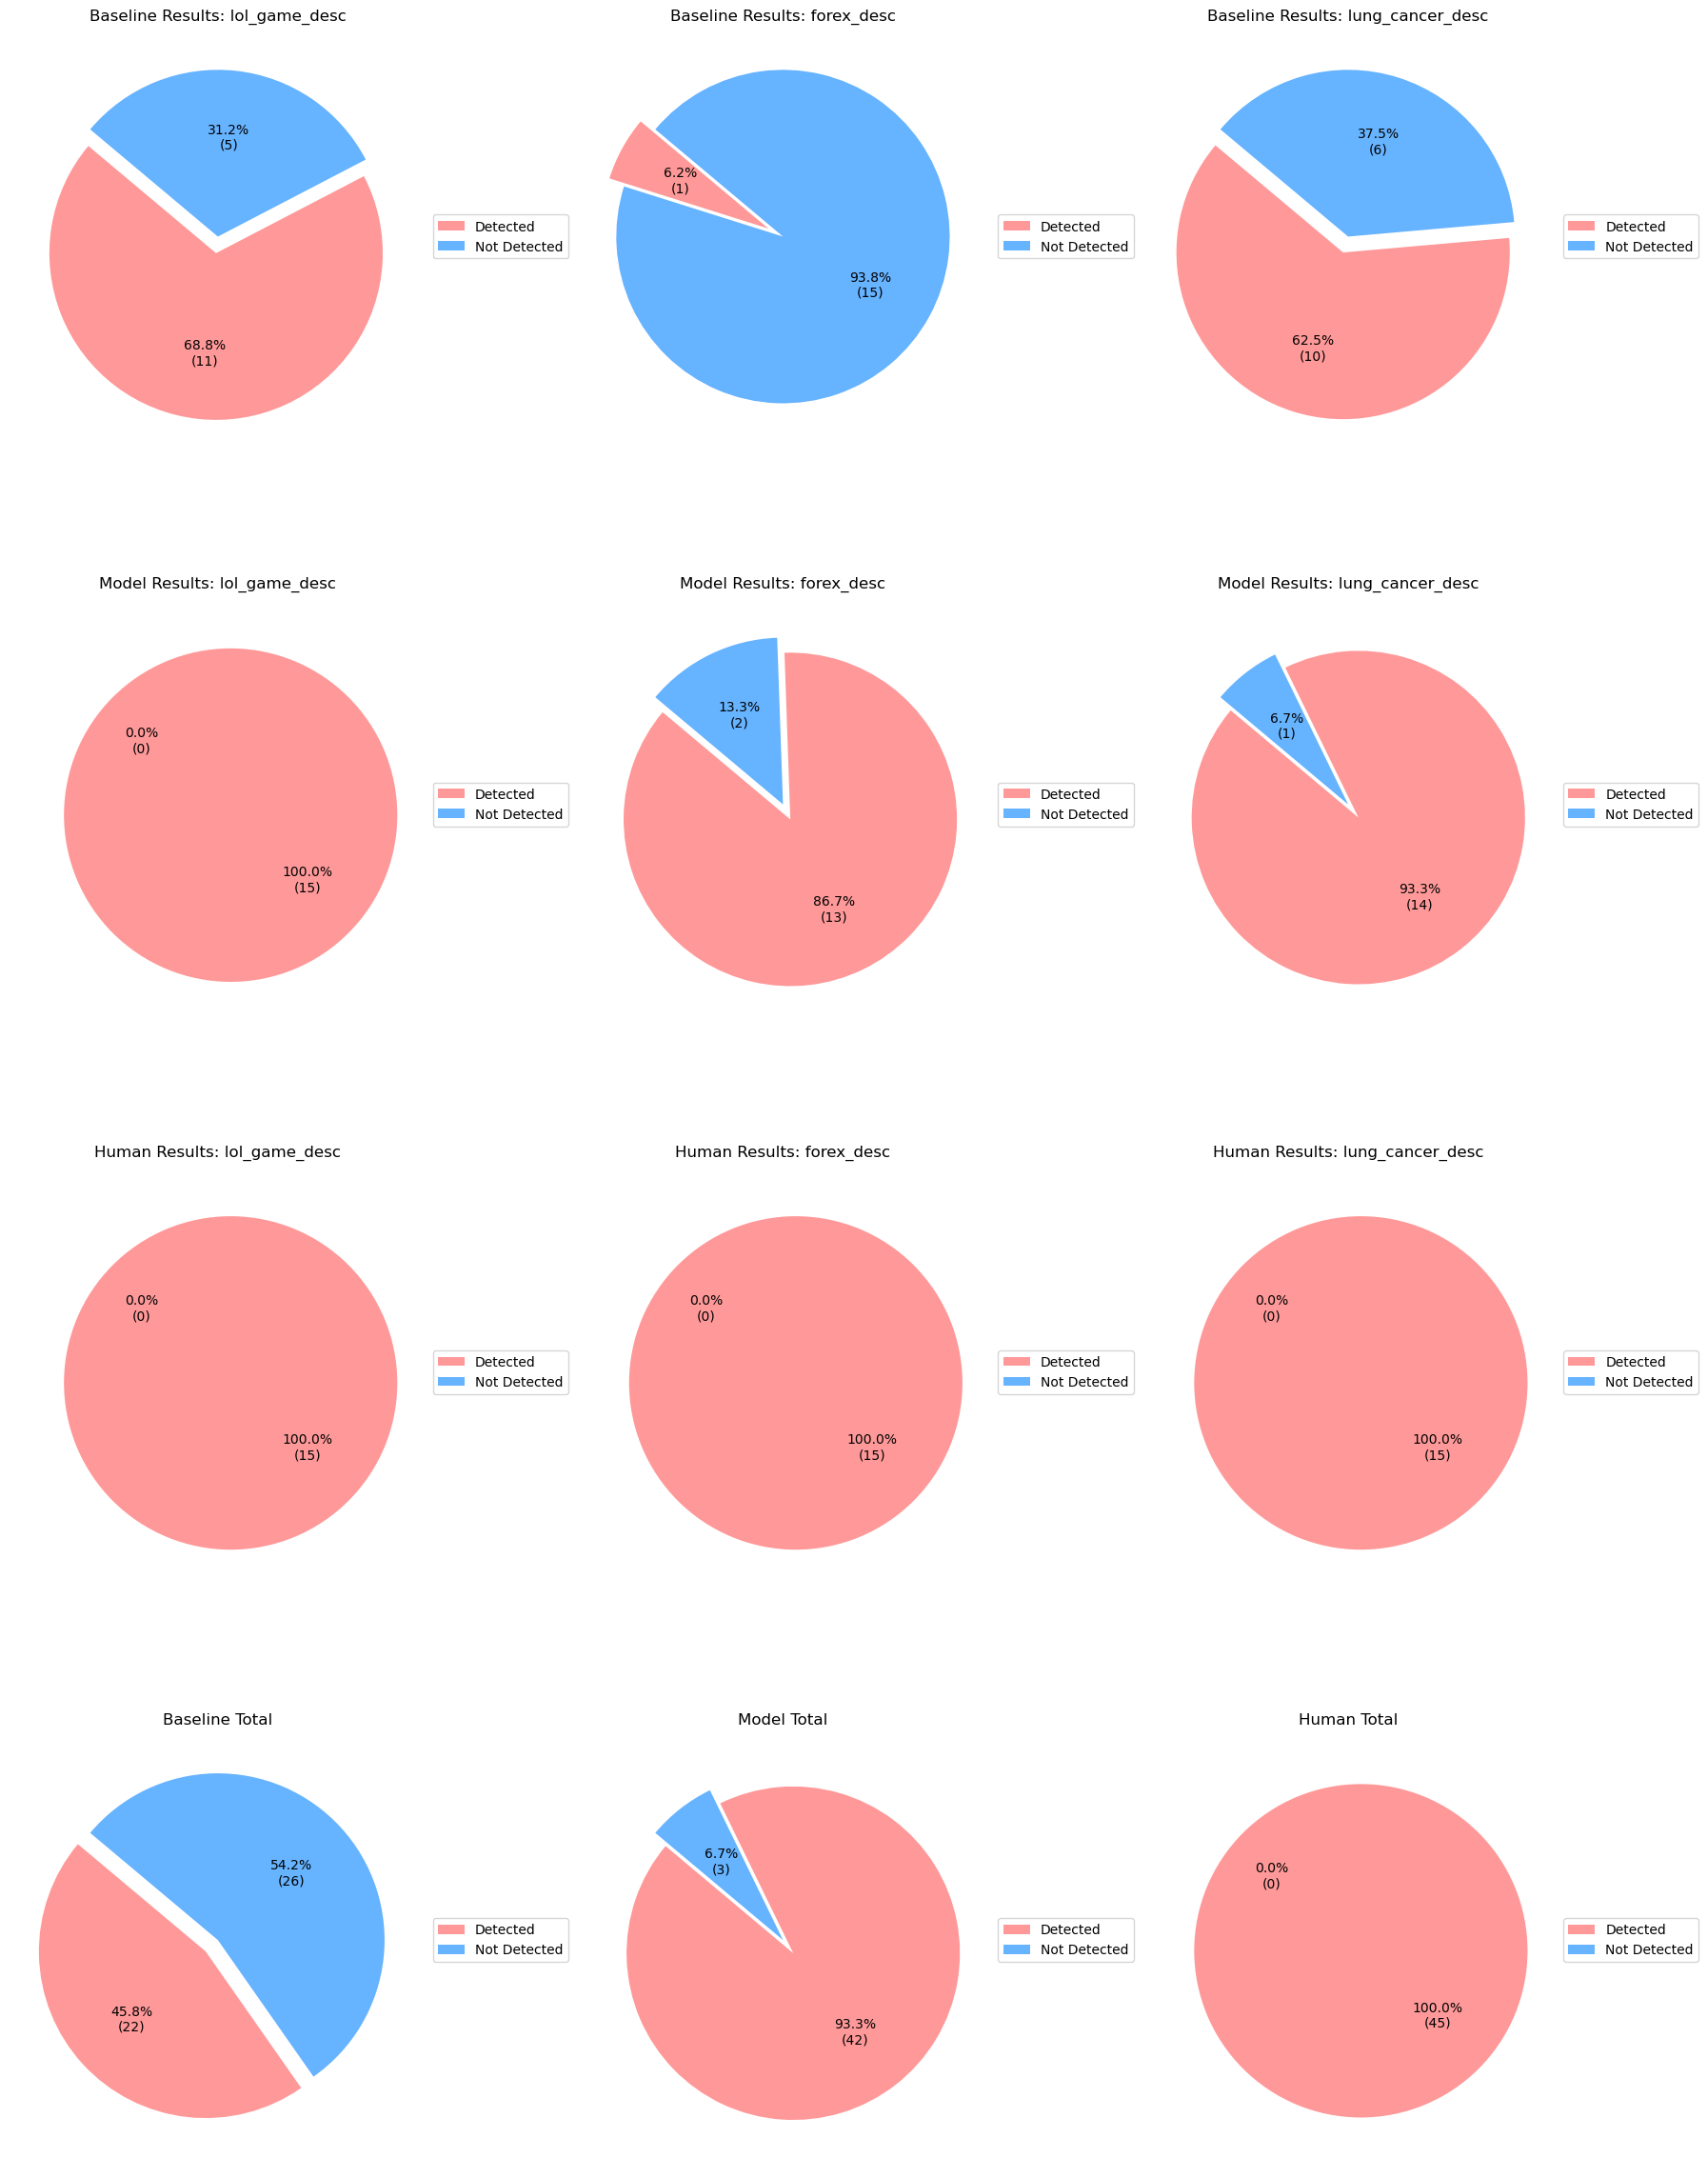

In [15]:
def plot_pie_charts_with_totals(baseline_results, model_results, human_results):
    # Calculate accumulated totals for each result set
    def calculate_totals(results_dict):
        total_detected = sum(result['detected'] for result in results_dict.values())
        total_not_detected = sum(result['not_detected'] for result in results_dict.values())
        return {'detected': total_detected, 'not_detected': total_not_detected}
    
    baseline_totals = calculate_totals(baseline_results)
    model_totals = calculate_totals(model_results)
    human_totals = calculate_totals(human_results)

    # Data for plotting
    pie_data = [
        (baseline_results, "Baseline Results"),
        (model_results, "Model Results"),
        (human_results, "Human Results")
    ]
    
    # Include totals
    total_data = [
        ({'Total': baseline_totals}, "Baseline Total"),
        ({'Total': model_totals}, "Model Total"),
        ({'Total': human_totals}, "Human Total"),
    ]

    # Set up the subplot grid
    fig, axs = plt.subplots(4, 3, figsize=(18, 24))  # 4 rows, 3 columns

    # Define labels, colors, and legend
    labels = ['Detected', 'Not Detected']
    colors = ['#ff9999', '#66b3ff']

    # Function to format the autopct to show both percentage and absolute number
    def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            absolute = int(round(pct / 100. * total))
            return f"{pct:.1f}%\n({absolute:d})"
        return my_format

    # Plot the detection results
    for i, (results_dict, title_prefix) in enumerate(pie_data):
        for j, (desc, result) in enumerate(results_dict.items()):
            ax = axs[i, j]
            
            sizes = [result['detected'], result['not_detected']]
            explode = (0.1, 0)  # explode the first slice (Detected)

            wedges, texts, autotexts = ax.pie(sizes, colors=colors, autopct=autopct_format(sizes), startangle=140, explode=explode)
            ax.set_title(f'{title_prefix}: {desc}')

            # Add legend to each pie chart
            ax.legend(wedges, labels, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

    # Plot the accumulated totals
    for j, (total_dict, title) in enumerate(total_data):
        ax = axs[3, j]
        result = total_dict['Total']
        
        sizes = [result['detected'], result['not_detected']]
        explode = (0.1, 0)  # explode the first slice (Detected)

        wedges, texts, autotexts = ax.pie(sizes, colors=colors, autopct=autopct_format(sizes), startangle=140, explode=explode)
        ax.set_title(title)

        # Add legend to each pie chart
        ax.legend(wedges, labels, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
    
    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()

# Plotting the pie charts
plot_pie_charts_with_totals(baseline_results, model_results, human_results)


# Average relevance score per tag, per set of tags for a document and overall + distribution per tag, per set of tags and overall

In [16]:
def analyze_tags(df, 
                 relevance_columns_list, 
                 spec_columns_list, 
                 coverage_columns_list, 
                 suggested_columns_list, 
                 common_tags_columns_1, 
                 common_tags_true_tags_1, 
                 common_tags_coverage_1,
                 common_tags_columns_2, 
                 common_tags_true_tags_2,
                 common_tags_coverage_2):
    
    # Lists to hold aggregated data across all documents
    all_relevance_data = []
    all_spec_data = []
    all_coverage_data = []

    # Iterate over each set of document columns
    for i, (relevance_columns, spec_columns, coverage_columns, suggested_columns) in enumerate(zip(relevance_columns_list, spec_columns_list, coverage_columns_list, suggested_columns_list)):
        print(f"\n--- Analyzing Document {i+1} ---")
        
        # Preprocess numerical columns to turn e.g. 3 - Moderately well into 3
        columns_to_preprocess = relevance_columns + spec_columns
        df = preprocess_numerical_columns(df, columns_to_preprocess)
        
        # Calculate and display distribution statistics
        def calculate_distribution(df, columns):
            return df[columns].agg(['std', 'min', 'max', 'mean'])

        # Document statistics
        document_dist_relevance = calculate_distribution(df, relevance_columns)
        document_dist_spec = calculate_distribution(df, spec_columns)
        
        print(f"Document {i+1} Relevance Distribution:")
        print(document_dist_relevance)
        print(f"Document {i+1} Specificity Distribution:")
        print(document_dist_spec)
        
        # Visualize distributions
        plot_scores_with_mean_std_ci_grid(df, relevance_columns, f'Document {i+1} - Raw Relevance Scores')
        plot_scores_with_mean_std_ci_grid(df, spec_columns, f'Document {i+1} - Raw Specificity Scores')
        plot_coverage_with_mean_std_grid(df, coverage_columns, f'Document {i+1} - Tag Coverage')

        # Calculate and visualize correlations
        calculate_and_plot_correlations(df, relevance_columns, spec_columns, coverage_columns)
        
        # Aggregate data for overall analysis
        all_relevance_data.extend(df[relevance_columns].values.flatten())
        all_spec_data.extend(df[spec_columns].values.flatten())
        all_coverage_data.extend(df[coverage_columns].values.flatten())

    # Convert aggregated data to NumPy arrays for easier processing
    all_relevance_data = np.array(all_relevance_data)
    all_spec_data = np.array(all_spec_data)
    all_coverage_data = np.array(all_coverage_data)
    
    # Plot aggregated relevance, specificity, and coverage scores
    plot_aggregated_scores(
        all_relevance_data, 
        all_spec_data, 
        all_coverage_data, 
        'Aggregated Scores Across All Documents'
    )
    
    # Plot ICC
    relevance_columns = relevance_columns_list[0] + relevance_columns_list[1] + relevance_columns_list[2]
    spec_columns = spec_columns_list[0] + spec_columns_list[1] + spec_columns_list[2]
    coverage_columns = coverage_columns_list[0] + coverage_columns_list[1] + coverage_columns_list[2]
    shared_coverage_columns = common_tags_coverage_1 + common_tags_coverage_2
    plot_icc(df, relevance_columns, spec_columns, coverage_columns, shared_coverage_columns)
             
    # First pair common tags coverage
    plot_common_tags_coverage_with_stats(df, common_tags_coverage_1, 'First Pair Common Tags Coverage')

    # Second pair common tags coverage
    plot_common_tags_coverage_with_stats(df, common_tags_coverage_2, 'Second Pair Common Tags Coverage')

    # Compare common tags with true tags across all documents
    # First pair of common tags
    first_pair_common_tags = df[common_tags_columns_1].apply(lambda x: ', '.join(x.dropna()), axis=1)
    
    # Second pair of common tags
    second_pair_common_tags = df[common_tags_columns_2].apply(lambda x: ', '.join(x.dropna()), axis=1)
    
    # Calculate confusion matrix for the first pair using the first document's relevance columns
    first_pair_confusion_matrix = calculate_confusion_matrix(first_pair_common_tags, common_tags_true_tags_1, relevance_columns_list[0])
    
    # Calculate confusion matrix for the second pair using the second document's relevance columns
    second_pair_confusion_matrix = calculate_confusion_matrix(second_pair_common_tags, common_tags_true_tags_2, relevance_columns_list[1])
    
    # Calculate metrics for the first pair
    accuracy_1, precision_1, recall_1, f1_score_1 = calculate_metrics(first_pair_confusion_matrix)
    
    # Calculate metrics for the second pair
    accuracy_2, precision_2, recall_2, f1_score_2 = calculate_metrics(second_pair_confusion_matrix)
    
    # Print the metrics for the first pair
    print_metrics("First Pair Common Tags", accuracy_1, precision_1, recall_1, f1_score_1)
    
    # Print the metrics for the second pair
    print_metrics("Second Pair Common Tags", accuracy_2, precision_2, recall_2, f1_score_2)
    
    # Visualize the confusion matrix for first and second pairs
    plot_confusion_matrix(first_pair_confusion_matrix, "First Pair Common Tags")
    plot_confusion_matrix(second_pair_confusion_matrix, "Second Pair Common Tags")


# Utility Functions

def preprocess_numerical_columns(df, columns):
    df = df.copy()
    for col in columns:
        if df[col].dtype == 'object':
            df[col] = df[col].str.extract('(\d+)', expand=False).astype(float)
    return df

def plot_scores_with_mean_std_ci_grid(df, columns, title_prefix, n_cols=3, confidence_level=0.95):
    num_columns = len(columns) + 1  # +1 to include the aggregated histogram
    n_rows = (num_columns + n_cols - 1) // n_cols  # Calculate the number of rows needed
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 5 * n_rows))
    
    # Flatten the axs array if it's multi-dimensional for easy iteration
    axs = axs.flatten()

    # Collect all data for the aggregate histogram
    aggregated_data = []

    for i, col in enumerate(columns):
        data = df[col].dropna()  # Drop NaN values for accurate calculation
        nan_count = df[col].isna().sum()  # Count NaN values
        mean = data.mean()
        std = data.std()
        n = len(data)
        
        # Add data to the aggregated list
        aggregated_data.extend(data)
        
        # Calculate the margin of error for the confidence interval
        t_stat = t.ppf((1 + confidence_level) / 2., n - 1)  # t-statistic for confidence interval
        margin_of_error = t_stat * (std / np.sqrt(n))
        ci_lower = mean - margin_of_error
        ci_upper = mean + margin_of_error
        
        axs[i].hist(data, bins=10, color='lightblue', edgecolor='black', alpha=0.7)
        axs[i].set_title(f'{title_prefix} - {col}')
        axs[i].set_xlabel('Score')
        axs[i].set_ylabel('Frequency')
        axs[i].grid(True)
        
        # Plot mean line
        axs[i].axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')
        
        # Plot ±1 standard deviation lines
        axs[i].axvline(mean - std, color='green', linestyle='dashed', linewidth=2, label=f'-1 Std: {mean - std:.2f}')
        axs[i].axvline(mean + std, color='green', linestyle='dashed', linewidth=2, label=f'+1 Std: {mean + std:.2f}')
        
        # Plot confidence interval lines
        axs[i].axvline(ci_lower, color='blue', linestyle='dotted', linewidth=2, label=f'CI Lower: {ci_lower:.2f}')
        axs[i].axvline(ci_upper, color='blue', linestyle='dotted', linewidth=2, label=f'CI Upper: {ci_upper:.2f}')
        
        # Add NaN count to the legend only if NaN count > 0
        if nan_count > 0:
            axs[i].legend(title=f'Not Applicable: {nan_count}')
        else:
            axs[i].legend()

    # Now plot the aggregated histogram
    aggregated_data = np.array(aggregated_data)
    mean_agg = aggregated_data.mean()
    std_agg = aggregated_data.std()
    n_agg = len(aggregated_data)
    nan_count_agg = df[columns].isna().sum().sum()  # Total NaN count across all columns
    
    # Calculate the margin of error for the confidence interval for aggregated data
    t_stat_agg = t.ppf((1 + confidence_level) / 2., n_agg - 1)
    margin_of_error_agg = t_stat_agg * (std_agg / np.sqrt(n_agg))
    ci_lower_agg = mean_agg - margin_of_error_agg
    ci_upper_agg = mean_agg + margin_of_error_agg
    
    axs[-1].hist(aggregated_data, bins=10, color='lightcoral', edgecolor='black', alpha=0.7)
    axs[-1].set_title(f'{title_prefix} - Aggregated')
    axs[-1].set_xlabel('Score')
    axs[-1].set_ylabel('Frequency')
    axs[-1].grid(True)
    
    # Plot mean line
    axs[-1].axvline(mean_agg, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_agg:.2f}')
    
    # Plot ±1 standard deviation lines
    axs[-1].axvline(mean_agg - std_agg, color='green', linestyle='dashed', linewidth=2, label=f'-1 Std: {mean_agg - std_agg:.2f}')
    axs[-1].axvline(mean_agg + std_agg, color='green', linestyle='dashed', linewidth=2, label=f'+1 Std: {mean_agg + std_agg:.2f}')
    
    # Plot confidence interval lines
    axs[-1].axvline(ci_lower_agg, color='blue', linestyle='dotted', linewidth=2, label=f'CI Lower: {ci_lower_agg:.2f}')
    axs[-1].axvline(ci_upper_agg, color='blue', linestyle='dotted', linewidth=2, label=f'CI Upper: {ci_upper_agg:.2f}')
    
    # Add NaN count to the legend for aggregated data only if NaN count > 0
    if nan_count_agg > 0:
        axs[-1].legend(title=f'Not Applicable: {nan_count_agg}')
    else:
        axs[-1].legend()

    # Turn off any unused subplots (if any)
    for j in range(len(columns), len(axs) - 1):
        fig.delaxes(axs[j])

    plt.tight_layout()
    plt.show()

def plot_coverage_with_mean_std_grid(df, coverage_columns, title_prefix, n_cols=3):
    num_columns = len(coverage_columns)  # No accumulated histogram needed
    n_rows = (num_columns + n_cols - 1) // n_cols  # Calculate the number of rows needed
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 5 * n_rows))
    
    # Flatten the axs array if it's multi-dimensional for easy iteration
    axs = axs.flatten()

    for i, col in enumerate(coverage_columns):
        data = df[col]  # No need to drop NaN values since there are none
        mean = data.mean()
        std = data.std()
        
        axs[i].hist(data, bins=10, color='lightblue', edgecolor='black', alpha=0.7)
        axs[i].set_title(f'{title_prefix} - {col}')
        axs[i].set_xlabel('Coverage')
        axs[i].set_ylabel('Frequency')
        axs[i].grid(True)
        
        # Plot mean line
        axs[i].axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')
        
        # Plot ±1 standard deviation lines
        axs[i].axvline(mean - std, color='green', linestyle='dashed', linewidth=2, label=f'-1 Std: {mean - std:.2f}')
        axs[i].axvline(mean + std, color='green', linestyle='dashed', linewidth=2, label=f'+1 Std: {mean + std:.2f}')
        
        # Add legend
        axs[i].legend()

    # Turn off any unused subplots (if any)
    for j in range(len(coverage_columns), len(axs)):
        fig.delaxes(axs[j])

    plt.tight_layout()
    plt.show()

def calculate_and_plot_correlations(df, relevance_columns, generality_columns, coverage_columns):
    correlations = {}
    
    # Ensure that the coverage_columns is a list and take the first element
    coverage_column = coverage_columns[0]
    
    # Calculate correlations per tag
    for relevance_col, generality_col in zip(relevance_columns, generality_columns):
        tag = relevance_col.split('_')[1]  # Assuming the tag identifier is part of the column name
        
        # Correlation between relevance and generality for this tag
        corr_relevance_generality = df[relevance_col].corr(df[generality_col], method='spearman')
        
        # Correlation between relevance and the single coverage column for this tag
        corr_relevance_coverage = df[relevance_col].corr(df[coverage_column], method='spearman')
        
        # Correlation between generality and the single coverage column for this tag
        corr_generality_coverage = df[generality_col].corr(df[coverage_column], method='spearman')
        
        correlations[tag] = {
            'Relevance vs Generality': corr_relevance_generality,
            'Relevance vs Coverage': corr_relevance_coverage,
            'Generality vs Coverage': corr_generality_coverage
        }
    
    # Convert the correlations dictionary to a DataFrame for easier display
    correlations_df = pd.DataFrame(correlations).T
    
    # Overall correlations across all tags
    relevance_data = df[relevance_columns].mean(axis=1)
    generality_data = df[generality_columns].mean(axis=1)
    coverage_data = df[coverage_column]
    
    overall_corr_relevance_generality = relevance_data.corr(generality_data, method='spearman')
    overall_corr_relevance_coverage = relevance_data.corr(coverage_data, method='spearman')
    overall_corr_generality_coverage = generality_data.corr(coverage_data, method='spearman')
    
    overall_correlations = pd.DataFrame({
        'Relevance vs Generality': [overall_corr_relevance_generality],
        'Relevance vs Coverage': [overall_corr_relevance_coverage],
        'Generality vs Coverage': [overall_corr_generality_coverage]
    }, index=['Overall'])

    # Display the tag-wise correlation table
    print("Correlation per Tag:")
    print(correlations_df)
    
    # Display the overall correlations
    print("\nOverall Correlations:")
    print(overall_correlations)
    
    # Heatmap for per-tag correlations
    plt.figure(figsize=(10, 6))
    sns.heatmap(correlations_df, annot=True, cmap='coolwarm', center=0, linewidths=.5)
    plt.title('Per-Tag Correlations')
    plt.show()

    # Heatmap for overall correlations
    plt.figure(figsize=(8, 2))
    sns.heatmap(overall_correlations, annot=True, cmap='coolwarm', center=0, linewidths=.5)
    plt.title('Overall Correlations')
    plt.show()

def plot_aggregated_scores(all_relevance_data, all_spec_data, all_coverage_data, title_prefix, confidence_level=0.95):
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))
    
    # Relevance Scores
    plot_distribution_with_stats(axs[0], all_relevance_data, f'{title_prefix} - Relevance Scores', 'Relevance Score', confidence_level)
    
    # Specificity Scores (with NaN count handling)
    nan_count_spec = np.isnan(all_spec_data).sum()
    plot_distribution_with_stats(axs[1], all_spec_data, f'{title_prefix} - Specificity Scores', 'Specificity Score', confidence_level, nan_count=nan_count_spec)
    
    # Coverage Scores
    plot_distribution_with_stats(axs[2], all_coverage_data, f'{title_prefix} - Coverage Scores', 'Coverage Score', confidence_level)
    
    plt.tight_layout()
    plt.show()

def plot_distribution_with_stats(ax, data, title, xlabel, confidence_level=0.95, nan_count=None):
    data = np.array(data)
    data = data[~np.isnan(data)]  # Remove NaN values for calculations
    
    mean = data.mean()
    std = data.std()
    n = len(data)
    
    # Calculate the margin of error for the confidence interval
    t_stat = t.ppf((1 + confidence_level) / 2., n - 1)
    margin_of_error = t_stat * (std / np.sqrt(n))
    ci_lower = mean - margin_of_error
    ci_upper = mean + margin_of_error
    
    ax.hist(data, bins=10, color='lightblue', edgecolor='black', alpha=0.7)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Frequency')
    ax.grid(True)
    
    # Plot mean line
    ax.axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')
    
    # Plot ±1 standard deviation lines
    ax.axvline(mean - std, color='green', linestyle='dashed', linewidth=2, label=f'-1 Std: {mean - std:.2f}')
    ax.axvline(mean + std, color='green', linestyle='dashed', linewidth=2, label=f'+1 Std: {mean + std:.2f}')
    
    # Plot confidence interval lines
    ax.axvline(ci_lower, color='blue', linestyle='dotted', linewidth=2, label=f'CI Lower: {ci_lower:.2f}')
    ax.axvline(ci_upper, color='blue', linestyle='dotted', linewidth=2, label=f'CI Upper: {ci_upper:.2f}')
    
    # Add NaN count to the legend only if NaN count > 0
    if nan_count is not None and nan_count > 0:
        ax.legend(title=f'Not Applicable: {nan_count}')
    else:
        ax.legend()

def calculate_and_plot_aggregated_correlations(all_relevance_data, all_spec_data, all_coverage_data):
    # Convert the lists into a DataFrame, where each column represents one type of data
    data = {
        'Relevance': pd.Series(all_relevance_data, dtype=np.float64),
        'Specificity': pd.Series(all_spec_data, dtype=np.float64),
        'Coverage': pd.Series(all_coverage_data, dtype=np.float64)
    }
    
    # Create a DataFrame from the data dictionary
    df_agg = pd.DataFrame(data)
    
    # Calculate the correlation matrix, which will automatically handle NaN values by ignoring them
    overall_correlations = df_agg.corr(method='spearman')

    # Display the overall correlations
    print("\nAggregated Overall Correlations (pandas):")
    print(overall_correlations)
    
    # Heatmap for overall correlations
    plt.figure(figsize=(6, 4))
    sns.heatmap(overall_correlations, annot=True, cmap='coolwarm', center=0, linewidths=.5)
    plt.title('Aggregated Overall Correlations')
    plt.show()

def prepare_ratings_data(df, columns, name):
    """
    Convert the given DataFrame into the desired format:
    ['Document', 'Rater', 'Column']
    
    Each row will represent a single rater's ratings for a document.
    """
    # Convert Likert scale columns to numeric values for relevance, specificity, and coverage
    df = df.copy()
    df = preprocess_numerical_columns(df, columns)[columns]

    df_combined = {
        'Document': [],
        'Rater': [],
        name: []
    }
    
    for id in columns:
        for i in range(len(df)):
            df_combined['Document'].append(id)
            df_combined['Rater'].append(f'Rater{i+1}')
            df_combined[name].append(df.loc[i, id])
    
    return pd.DataFrame(df_combined)

def calculate_fleiss_kappa(df, rating_column):
    # Pivot the data to get a contingency table for Fleiss' Kappa
    df_pivot = df.pivot_table(index='Document', columns='Rater', values=rating_column, aggfunc=lambda x: x)
    # Remove any NaNs (assuming missing ratings)
    df_pivot = df_pivot.dropna()
    # Fleiss' Kappa requires categorical data, so we convert to integer categories
    df_pivot_discrete = df_pivot.astype(int)
    
    # Create a matrix where each row is a document and each column is the count of ratings in each category
    n_categories = df_pivot_discrete.max().max() + 1  # Assuming ratings are 0-indexed categories
    ratings_matrix = pd.get_dummies(df_pivot_discrete.stack()).groupby(level=0).sum().reindex(range(n_categories), axis=1, fill_value=0)
    
    # Calculate Fleiss' Kappa
    return fleiss_kappa(ratings_matrix.values)

def plot_icc(df, relevance_columns, generality_columns, coverage_columns, shared_coverage_columns):
    df_relevance = prepare_ratings_data(df, relevance_columns, 'Relevance')
    df_generality = prepare_ratings_data(df, generality_columns, 'Generality')
    df_coverage = prepare_ratings_data(df, coverage_columns, 'Coverage')
    df_shared_coverage = prepare_ratings_data(df, shared_coverage_columns, 'Shared Coverage')
    
    icc_relevance = pg.intraclass_corr(data=df_relevance, targets='Document', raters='Rater', ratings='Relevance')
    icc_generality = pg.intraclass_corr(data=df_generality, targets='Document', raters='Rater', ratings='Generality', nan_policy='omit')
    icc_coverage = pg.intraclass_corr(data=df_coverage, targets='Document', raters='Rater', ratings='Coverage')
    icc_shared_coverage = pg.intraclass_corr(data=df_shared_coverage, targets='Document', raters='Rater', ratings='Shared Coverage')
    
    print("ICC for Relevance:")
    display(icc_relevance)
    print("\nICC for Generality:")
    display(icc_generality)
    print("\nICC for Coverage:")
    display(icc_coverage)
    print("\nICC for Shared Coverage:")
    display(icc_shared_coverage)
    
    # Fleiss' Kappa (for multiple raters)
    kappa_fleiss_relevance = calculate_fleiss_kappa(df_relevance, 'Relevance')
    kappa_fleiss_generality = calculate_fleiss_kappa(df_generality, 'Generality')
    kappa_fleiss_coverage = calculate_fleiss_kappa(df_coverage, 'Coverage')
    kappa_fleiss_shared_coverage = calculate_fleiss_kappa(df_shared_coverage, 'Shared Coverage')

    print(f"\nFleiss' Kappa for Relevance: {kappa_fleiss_relevance:.4f}")
    print(f"Fleiss' Kappa for Generality: {kappa_fleiss_generality:.4f}")
    print(f"Fleiss' Kappa for Coverage: {kappa_fleiss_coverage:.4f}")
    print(f"Fleiss' Kappa for Shared Coverage: {kappa_fleiss_shared_coverage:.4f}")

def plot_common_tags_coverage_with_stats(df, coverage_columns, title_prefix, n_cols=3, confidence_level=0.95):
    """
    This function plots the coverage scores for common tags with mean, standard deviation, and confidence intervals.
    """
    num_columns = len(coverage_columns)  # Number of columns to plot
    n_rows = (num_columns + n_cols - 1) // n_cols  # Calculate the number of rows needed
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 5 * n_rows))
    
    # Flatten the axs array if it's multi-dimensional for easy iteration
    axs = axs.flatten()

    for i, col in enumerate(coverage_columns):
        data = df[col].dropna()  # Drop NaN values for accurate calculation
        nan_count = df[col].isna().sum()  # Count NaN values
        mean = data.mean()
        std = data.std()
        n = len(data)
        
        # Calculate the margin of error for the confidence interval
        if n > 1:  # Ensure there are enough data points
            t_stat = t.ppf((1 + confidence_level) / 2., n - 1)  # t-statistic for confidence interval
            margin_of_error = t_stat * (std / np.sqrt(n))
            ci_lower = mean - margin_of_error
            ci_upper = mean + margin_of_error
        else:
            ci_lower, ci_upper = mean, mean  # If not enough data, CI is the mean itself
        
        # Plot histogram
        axs[i].hist(data, bins=10, color='lightblue', edgecolor='black', alpha=0.7)
        axs[i].set_title(f'{title_prefix} - {col}')
        axs[i].set_xlabel('Coverage Score')
        axs[i].set_ylabel('Frequency')
        axs[i].grid(True)
        
        # Plot mean line
        axs[i].axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')
        
        # Plot ±1 standard deviation lines
        axs[i].axvline(mean - std, color='green', linestyle='dashed', linewidth=2, label=f'-1 Std: {mean - std:.2f}')
        axs[i].axvline(mean + std, color='green', linestyle='dashed', linewidth=2, label=f'+1 Std: {mean + std:.2f}')
        
        # Plot confidence interval lines
        axs[i].axvline(ci_lower, color='blue', linestyle='dotted', linewidth=2, label=f'CI Lower: {ci_lower:.2f}')
        axs[i].axvline(ci_upper, color='blue', linestyle='dotted', linewidth=2, label=f'CI Upper: {ci_upper:.2f}')
        
        # Add NaN count to the legend only if NaN count > 0
        if nan_count > 0:
            axs[i].legend(title=f'Not Applicable: {nan_count}')
        else:
            axs[i].legend()

    # Turn off any unused subplots (if any)
    for j in range(len(coverage_columns), len(axs)):
        fig.delaxes(axs[j])

    plt.tight_layout()
    plt.show()

# Function to calculate confusion matrix (TP, FP, FN, TN)
def calculate_confusion_matrix(common_tags_series, true_tags, relevance_columns):
    confusion_matrices = []
    
    for common_tags in common_tags_series:
        common_tags_set = set(common_tags.split(', '))
        true_tags_set = set(true_tags)

        # Calculate True Positives (TP)
        TP = len(common_tags_set & true_tags_set)

        # Calculate False Positives (FP)
        FP = len(common_tags_set - true_tags_set)

        # Calculate False Negatives (FN)
        FN = len(true_tags_set - common_tags_set)

        # Calculate True Negatives (TN)
        all_possible_tags = set(relevance_columns)  # Use relevance columns as the set of possible tags
        TN = len(all_possible_tags - (common_tags_set | true_tags_set))

        confusion_matrices.append([TP, FP, FN, TN])
    
    return confusion_matrices

# Function to plot the confusion matrix using seaborn
def plot_confusion_matrix(confusion_matrix, title):
    # Sum the confusion matrix across all documents to get an overall matrix
    cm_array = np.array(confusion_matrix).sum(axis=0).reshape(2, 2)

    # Create a heatmap
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm_array, annot=True, fmt="d", cmap='Blues', 
                xticklabels=["Positive", "Negative"], 
                yticklabels=["Positive", "Negative"])

    plt.title(f"Confusion Matrix: {title}")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Function to calculate metrics (Accuracy, Precision, Recall, F1-Score)
def calculate_metrics(confusion_matrix):
    TP, FP, FN, TN = np.sum(confusion_matrix, axis=0)  # Sum across all documents

    # Calculate metrics
    accuracy = (TP + TN) / (TP + FP + FN + TN)
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return accuracy, precision, recall, f1_score

# Function to print metrics
def print_metrics(title, accuracy, precision, recall, f1_score):
    print(f"\nMetrics for {title}:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1_score:.2f}")

In [17]:
df_baseline_generated.columns

Index(['timestamp', 'age_range', 'gender', 'education', 'english_prof',
       'lol_game_desc', 'tag_turret', 'tag_lost', 'tag_destroyed',
       'tag_impressions', 'tag_clicking', 'tag_cost', 'tag_advertisement',
       'spec_turret', 'spec_lost', 'spec_destroyed', 'spec_advertisement',
       'spec_impressions', 'spec_clicking', 'spec_cost', 'tags_coverage_lol',
       'suggested_tags_lol', 'forex_desc', 'tag_thyrotropin', 'tag_minute',
       'tag_usd', 'tag_releasing', 'tag_high', 'tag_bid', 'tag_ask',
       'spec_thyrotropin', 'spec_minute', 'spec_usd', 'spec_releasing',
       'spec_high', 'spec_bid', 'spec_ask', 'tags_coverage_forex',
       'suggested_tags_forex', 'lung_cancer_desc', 'tag_cancer',
       'tag_microarray', 'tag_prostate', 'tag_ovarian', 'tag_gliomas',
       'tag_lung', 'tag_genes', 'spec_cancer', 'spec_microarray',
       'spec_prostate', 'spec_ovarian', 'spec_gliomas', 'spec_lung',
       'spec_genes', 'tags_coverage_lung', 'suggested_tags_lung',
       'coll

In [18]:
baseline_first_document_relevance_columns = ['tag_turret', 'tag_lost', 'tag_destroyed', 'tag_impressions', 'tag_clicking', 'tag_cost', 'tag_advertisement']
baseline_first_document_spec_columns = ['spec_turret', 'spec_lost', 'spec_destroyed', 'spec_impressions', 'spec_clicking', 'spec_cost', 'spec_advertisement']
baseline_first_document_coverage_columns = ['tags_coverage_lol']
baseline_first_document_suggested_columns = ['suggested_tags_lol']

baseline_second_document_relevance_columns = ['tag_thyrotropin', 'tag_minute', 'tag_usd', 'tag_releasing', 'tag_high', 'tag_bid', 'tag_ask']
baseline_second_document_spec_columns = ['spec_thyrotropin', 'spec_minute', 'spec_usd', 'spec_releasing', 'spec_high', 'spec_bid', 'spec_ask']
baseline_second_document_coverage_columns = ['tags_coverage_forex']
baseline_second_document_suggested_columns = ['suggested_tags_forex']

baseline_third_document_relevance_columns = ['tag_cancer', 'tag_microarray', 'tag_prostate', 'tag_ovarian', 'tag_gliomas', 'tag_lung', 'tag_genes']
baseline_third_document_spec_columns = ['spec_cancer', 'spec_microarray', 'spec_prostate', 'spec_ovarian', 'spec_gliomas', 'spec_lung', 'spec_genes']
baseline_third_document_coverage_columns = ['tags_coverage_lung']
baseline_third_document_suggested_columns = ['suggested_tags_lung']

baseline_first_pair_common_tags_columns = ['common_tags1']
baseline_first_pair_common_tags_true_tags = ["Cases", "Deaths", "Coronavirus"]
baseline_first_pair_coverage_columns = ['common_tags_coverage1']

baseline_second_pair_common_tags_columns = ['common_tags2']
baseline_second_pair_common_tags_true_tags = ["Movies", "IMDb", "Weekend", "Office", "Earnings", "Streaming", "TMDB", "Gross", "Audience"]
baseline_second_pair_coverage_columns = ['common_tags_coverage2']



--- Analyzing Document 1 ---
Document 1 Relevance Distribution:
      tag_turret  tag_lost  tag_destroyed  tag_impressions  tag_clicking  \
std     1.204159  1.064581       1.238278           0.7932      0.981071   
min     1.000000  1.000000       1.000000           1.0000      1.000000   
max     5.000000  5.000000       5.000000           4.0000      4.000000   
mean    2.375000  2.250000       2.250000           1.3125      1.812500   

      tag_cost  tag_advertisement  
std   1.078193           0.704154  
min   1.000000           1.000000  
max   4.000000           3.000000  
mean  1.687500           1.312500  
Document 1 Specificity Distribution:
      spec_turret  spec_lost  spec_destroyed  spec_impressions  spec_clicking  \
std      1.352467   1.204159          1.2500          1.125992       1.288057   
min      1.000000   1.000000          1.0000          2.000000       2.000000   
max      5.000000   5.000000          5.0000          5.000000       5.000000   
mean     2.68

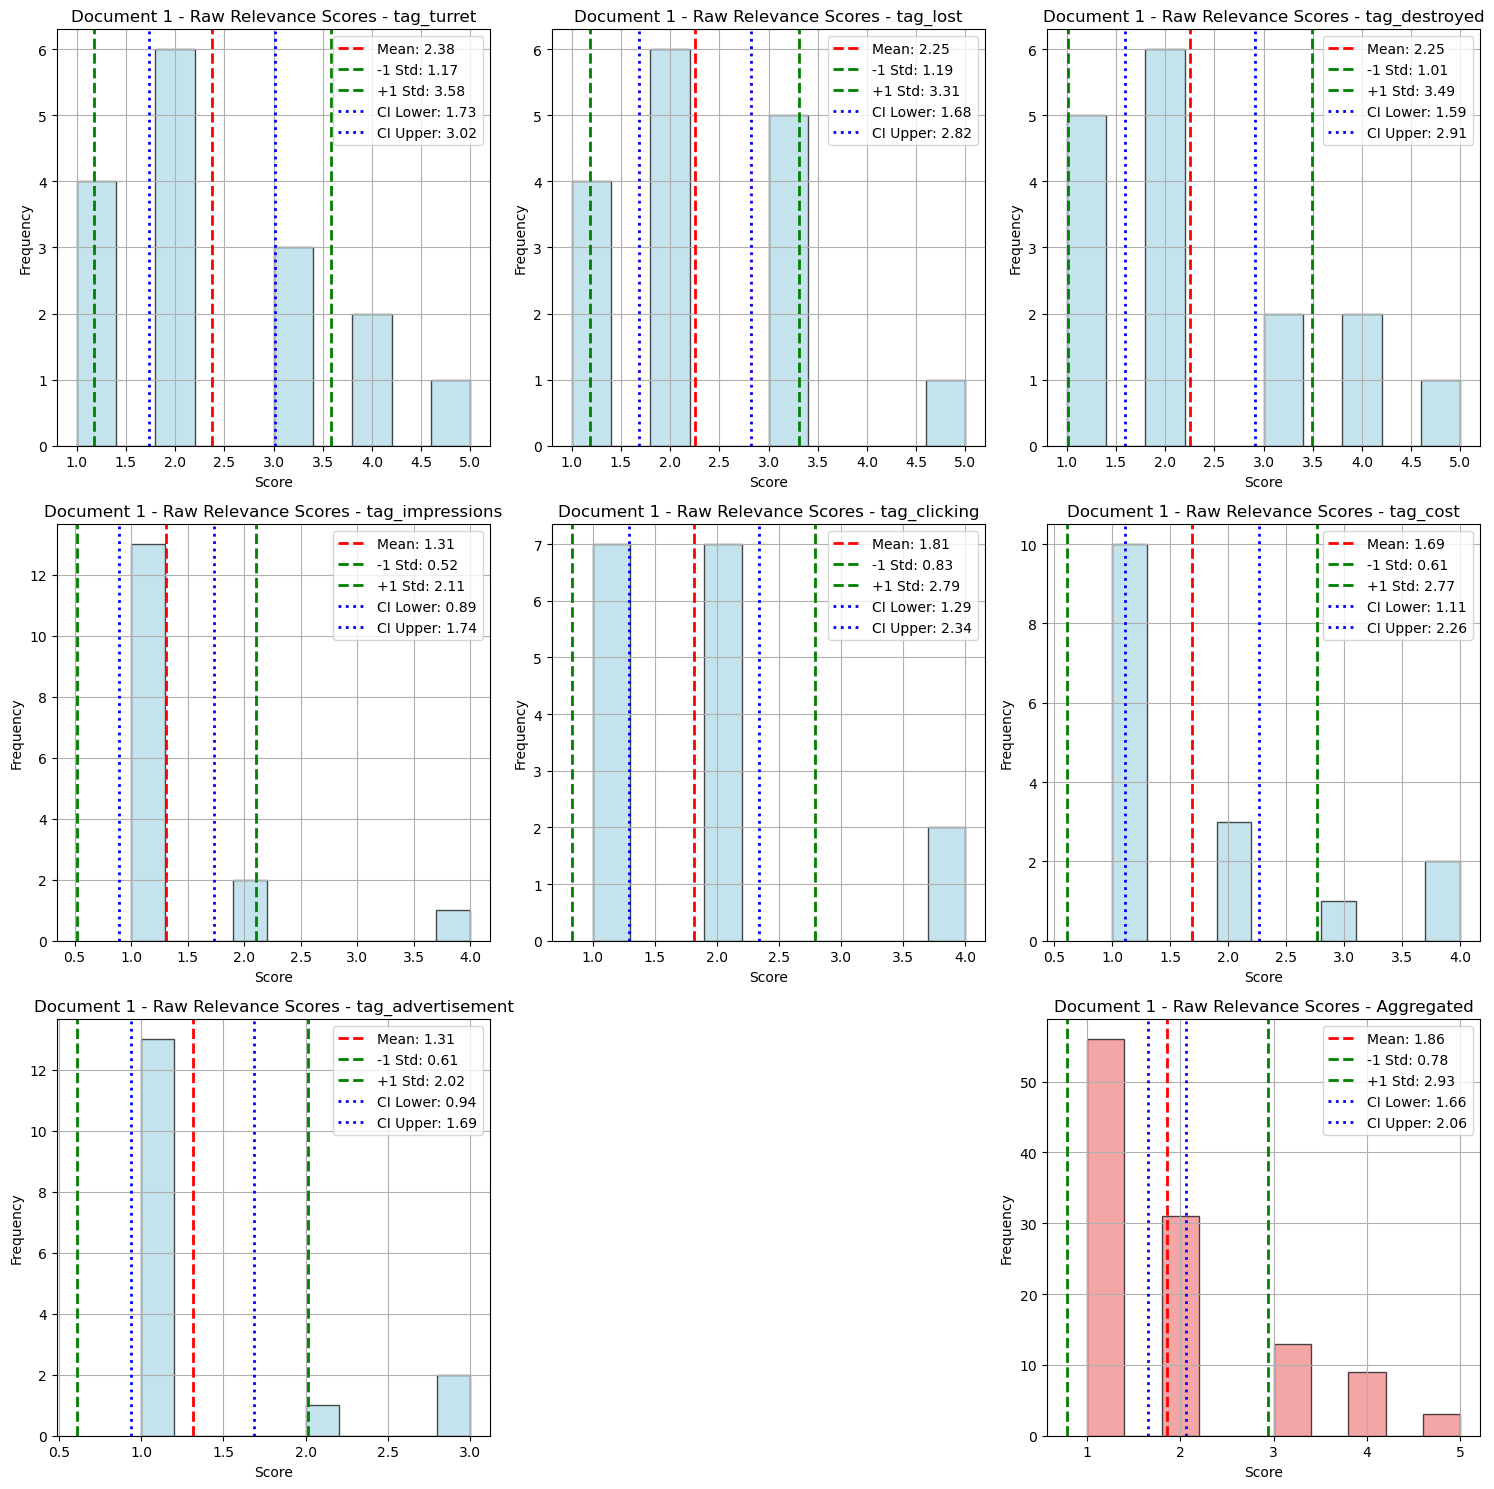

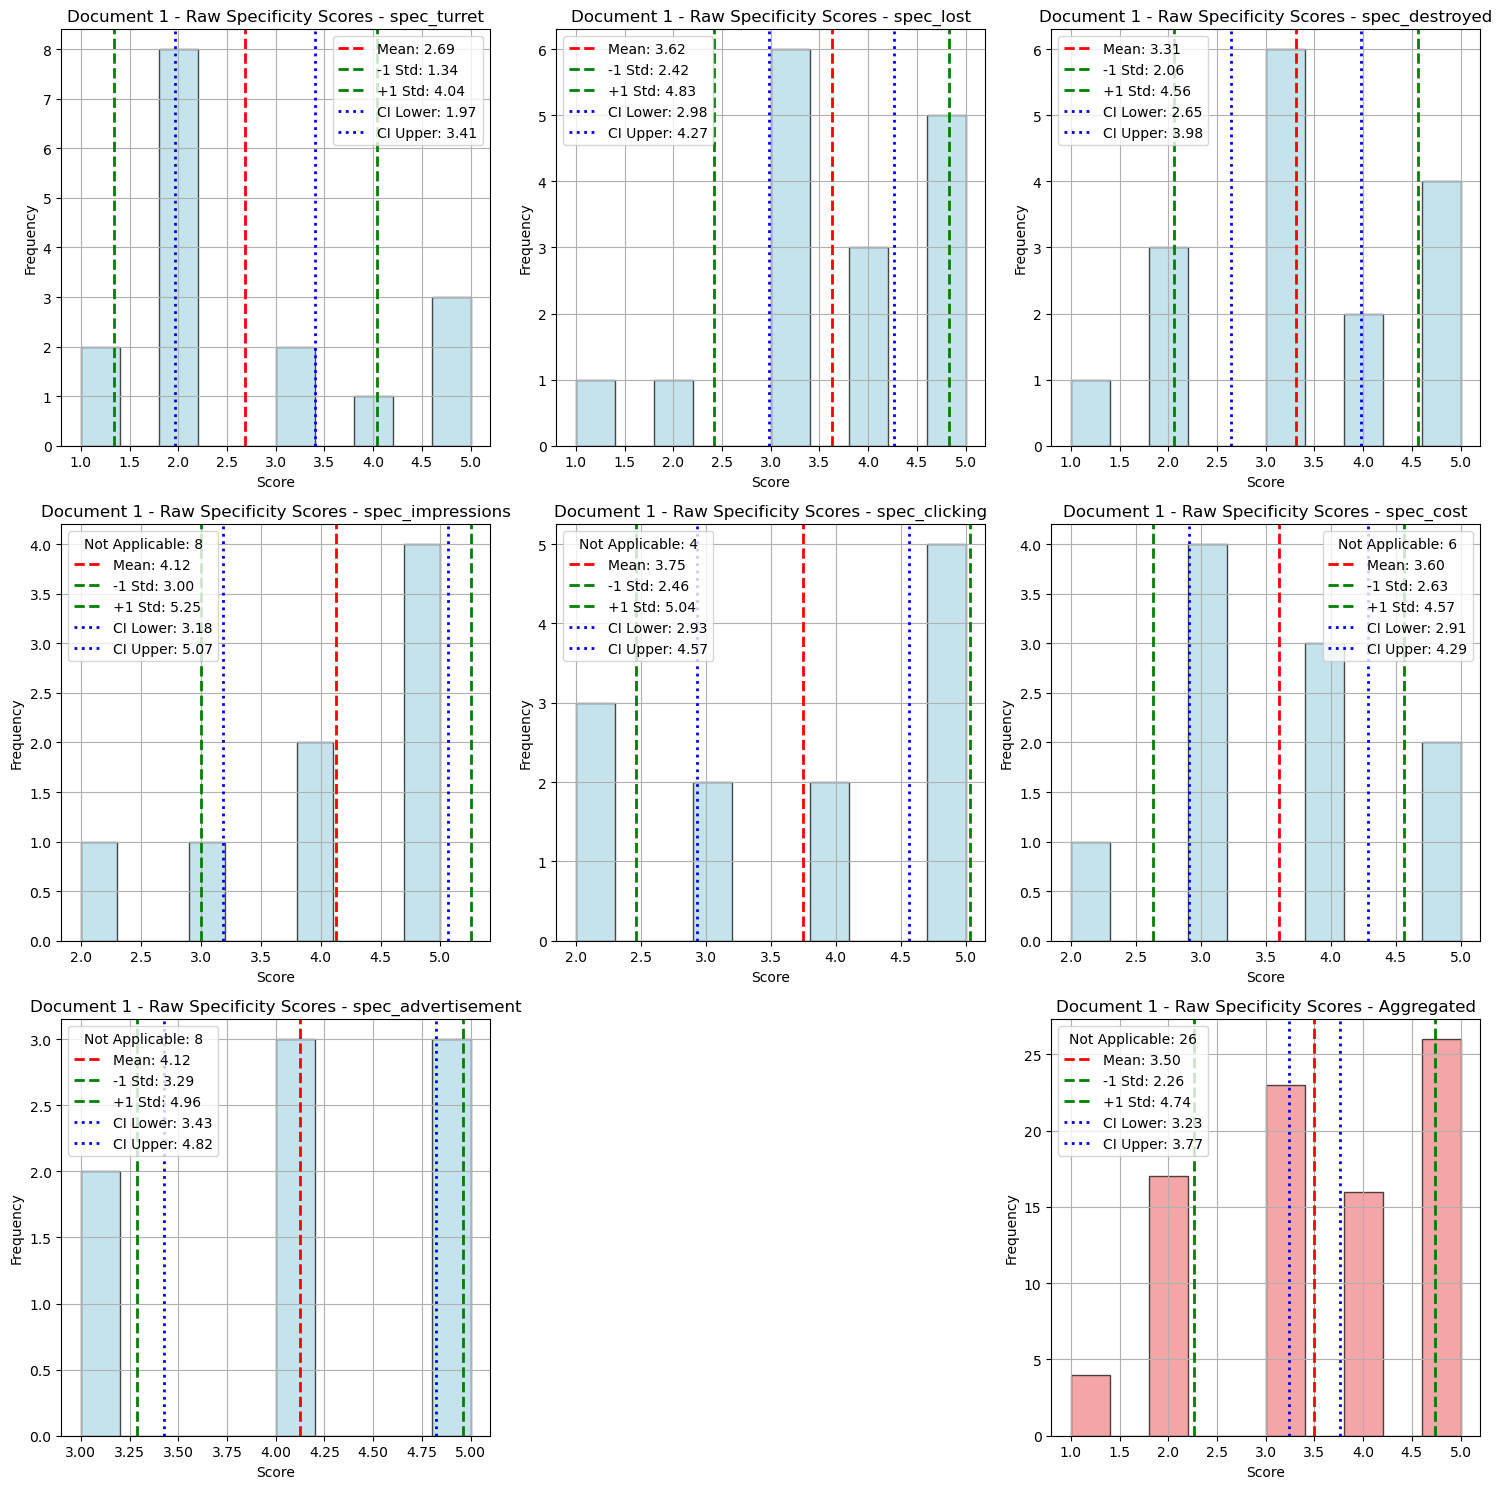

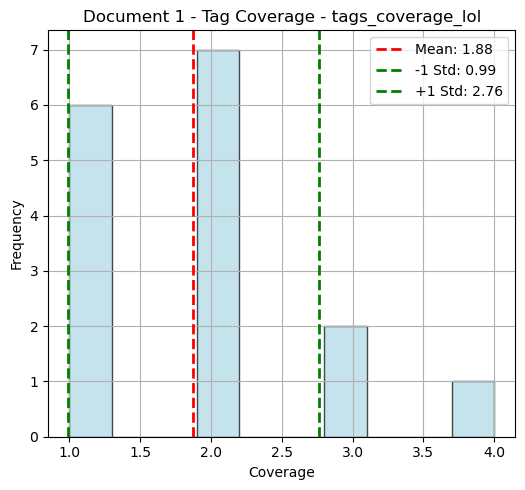

Correlation per Tag:
               Relevance vs Generality  Relevance vs Coverage  \
turret                       -0.223891               0.243987   
lost                         -0.244339               0.619441   
destroyed                    -0.517965               0.522927   
impressions                  -0.619324               0.348536   
clicking                     -0.374171               0.477135   
cost                         -0.665719               0.384396   
advertisement                -0.501901               0.728440   

               Generality vs Coverage  
turret                      -0.586588  
lost                        -0.157213  
destroyed                   -0.649812  
impressions                 -0.732877  
clicking                    -0.721078  
cost                        -0.515711  
advertisement               -0.706018  

Overall Correlations:
         Relevance vs Generality  Relevance vs Coverage  \
Overall                -0.483301               0.644474 

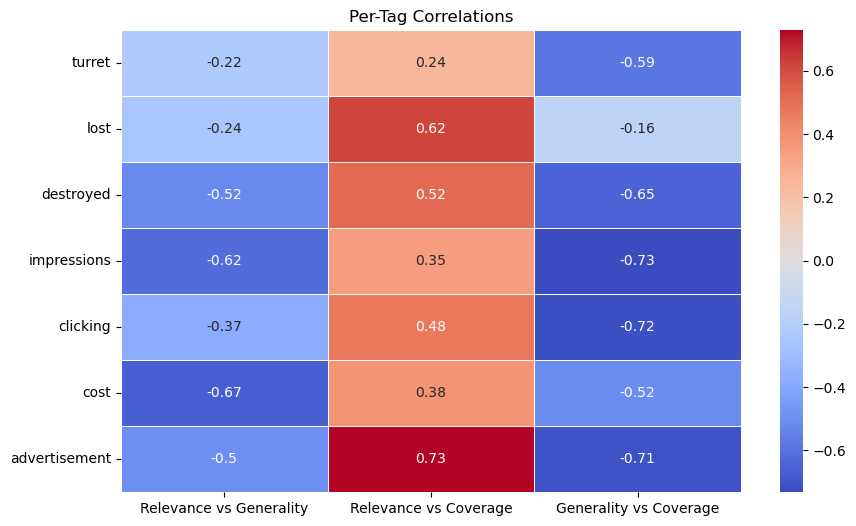

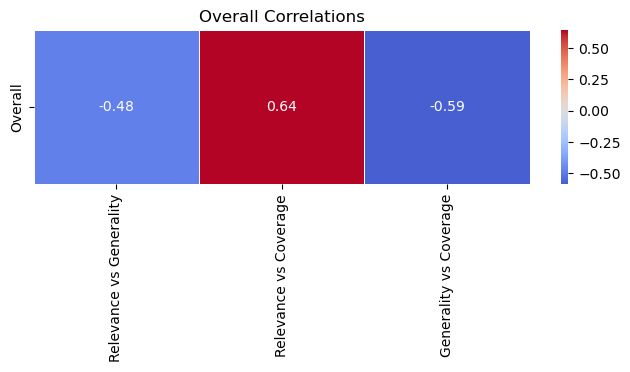


--- Analyzing Document 2 ---
Document 2 Relevance Distribution:
      tag_thyrotropin  tag_minute   tag_usd  tag_releasing  tag_high  \
std           0.57735    0.853913  1.147461       0.885061  1.238278   
min           1.00000    2.000000  2.000000       1.000000  1.000000   
max           3.00000    5.000000  5.000000       4.000000  5.000000   
mean          1.25000    3.062500  3.625000       1.625000  2.250000   

       tag_bid   tag_ask  
std   0.873212  0.981071  
min   2.000000  1.000000  
max   5.000000  4.000000  
mean  2.687500  2.187500  
Document 2 Specificity Distribution:
      spec_thyrotropin  spec_minute  spec_usd  spec_releasing  spec_high  \
std                2.0      1.48324  1.341641        1.494434   1.320173   
min                1.0      1.00000  1.000000        2.000000   1.000000   
max                5.0      5.00000  5.000000        5.000000   5.000000   
mean               3.0      3.25000  2.750000        3.700000   3.800000   

      spec_bid  spec_

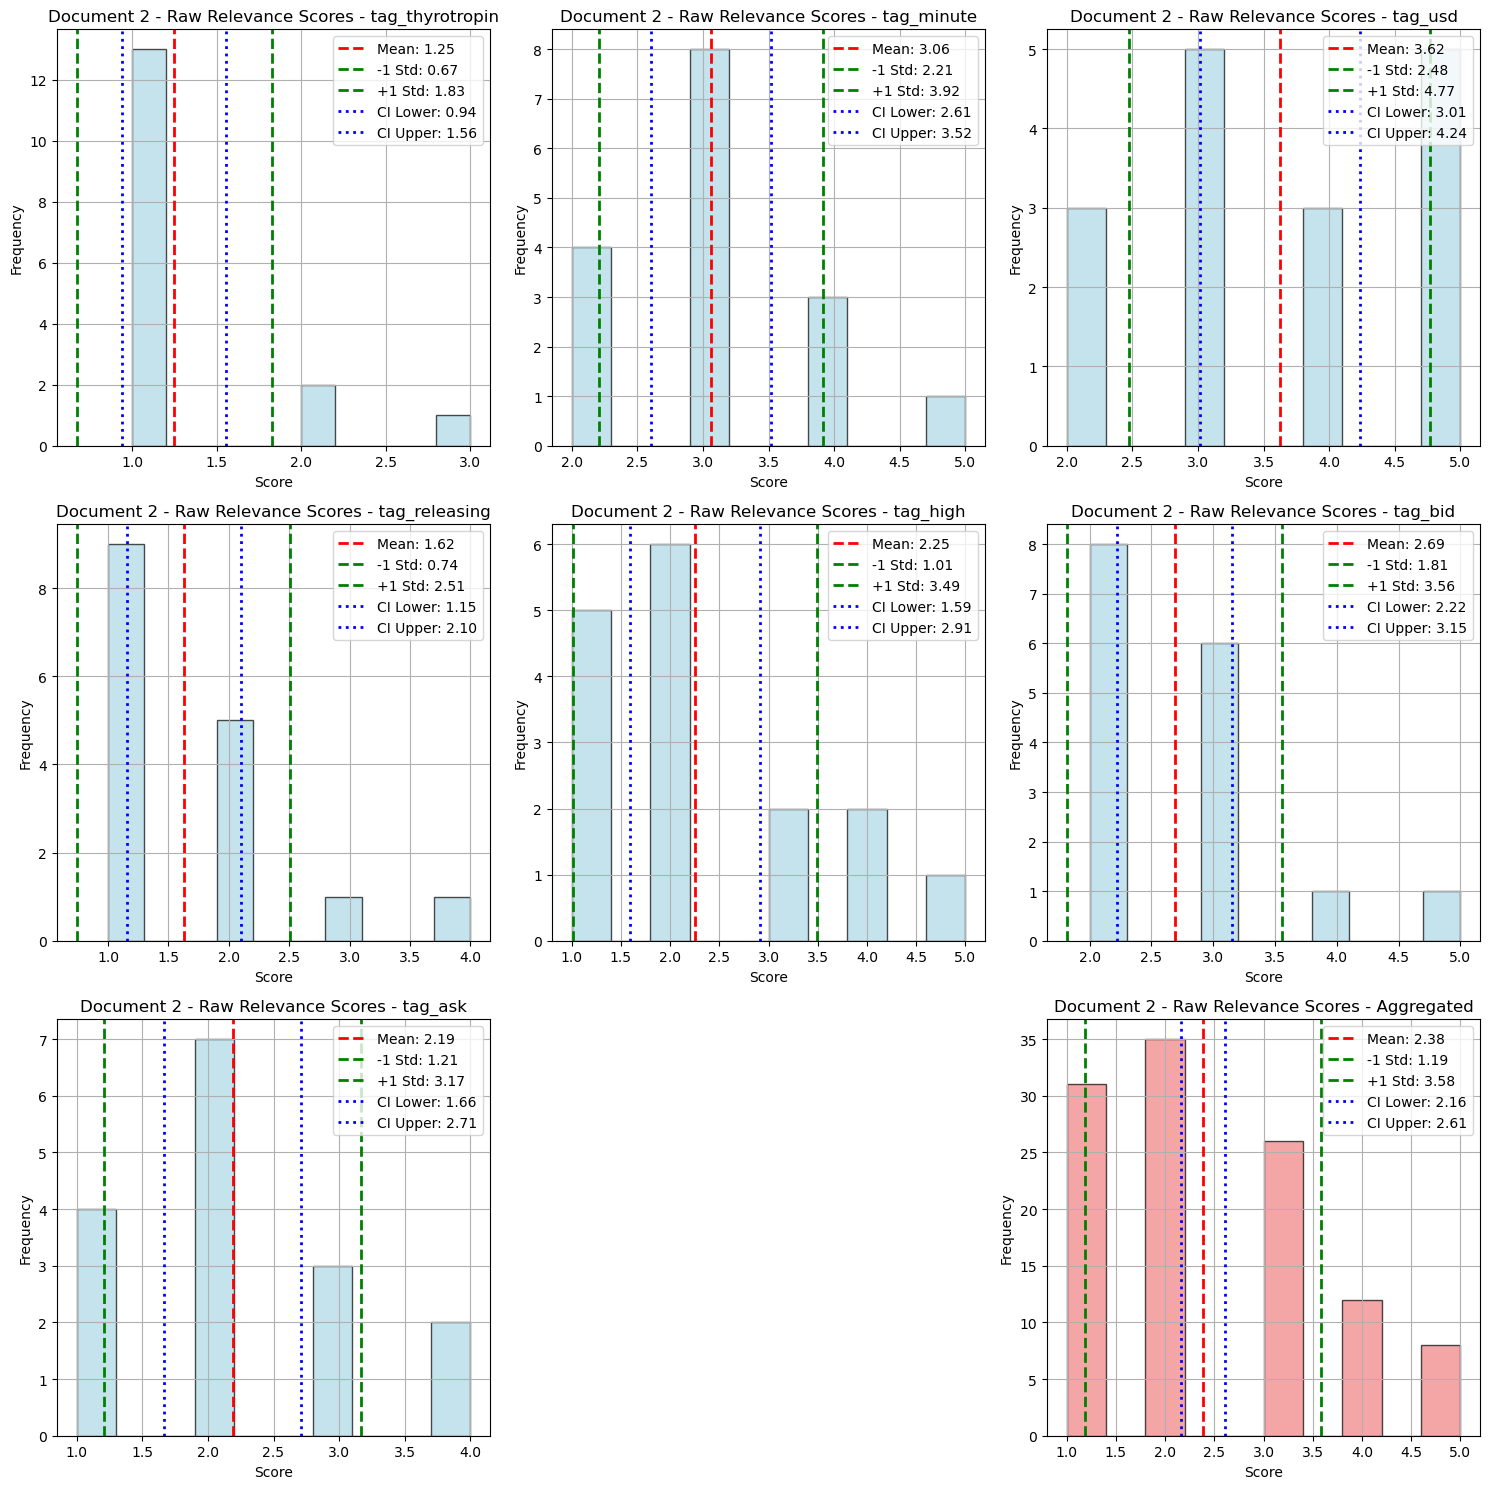

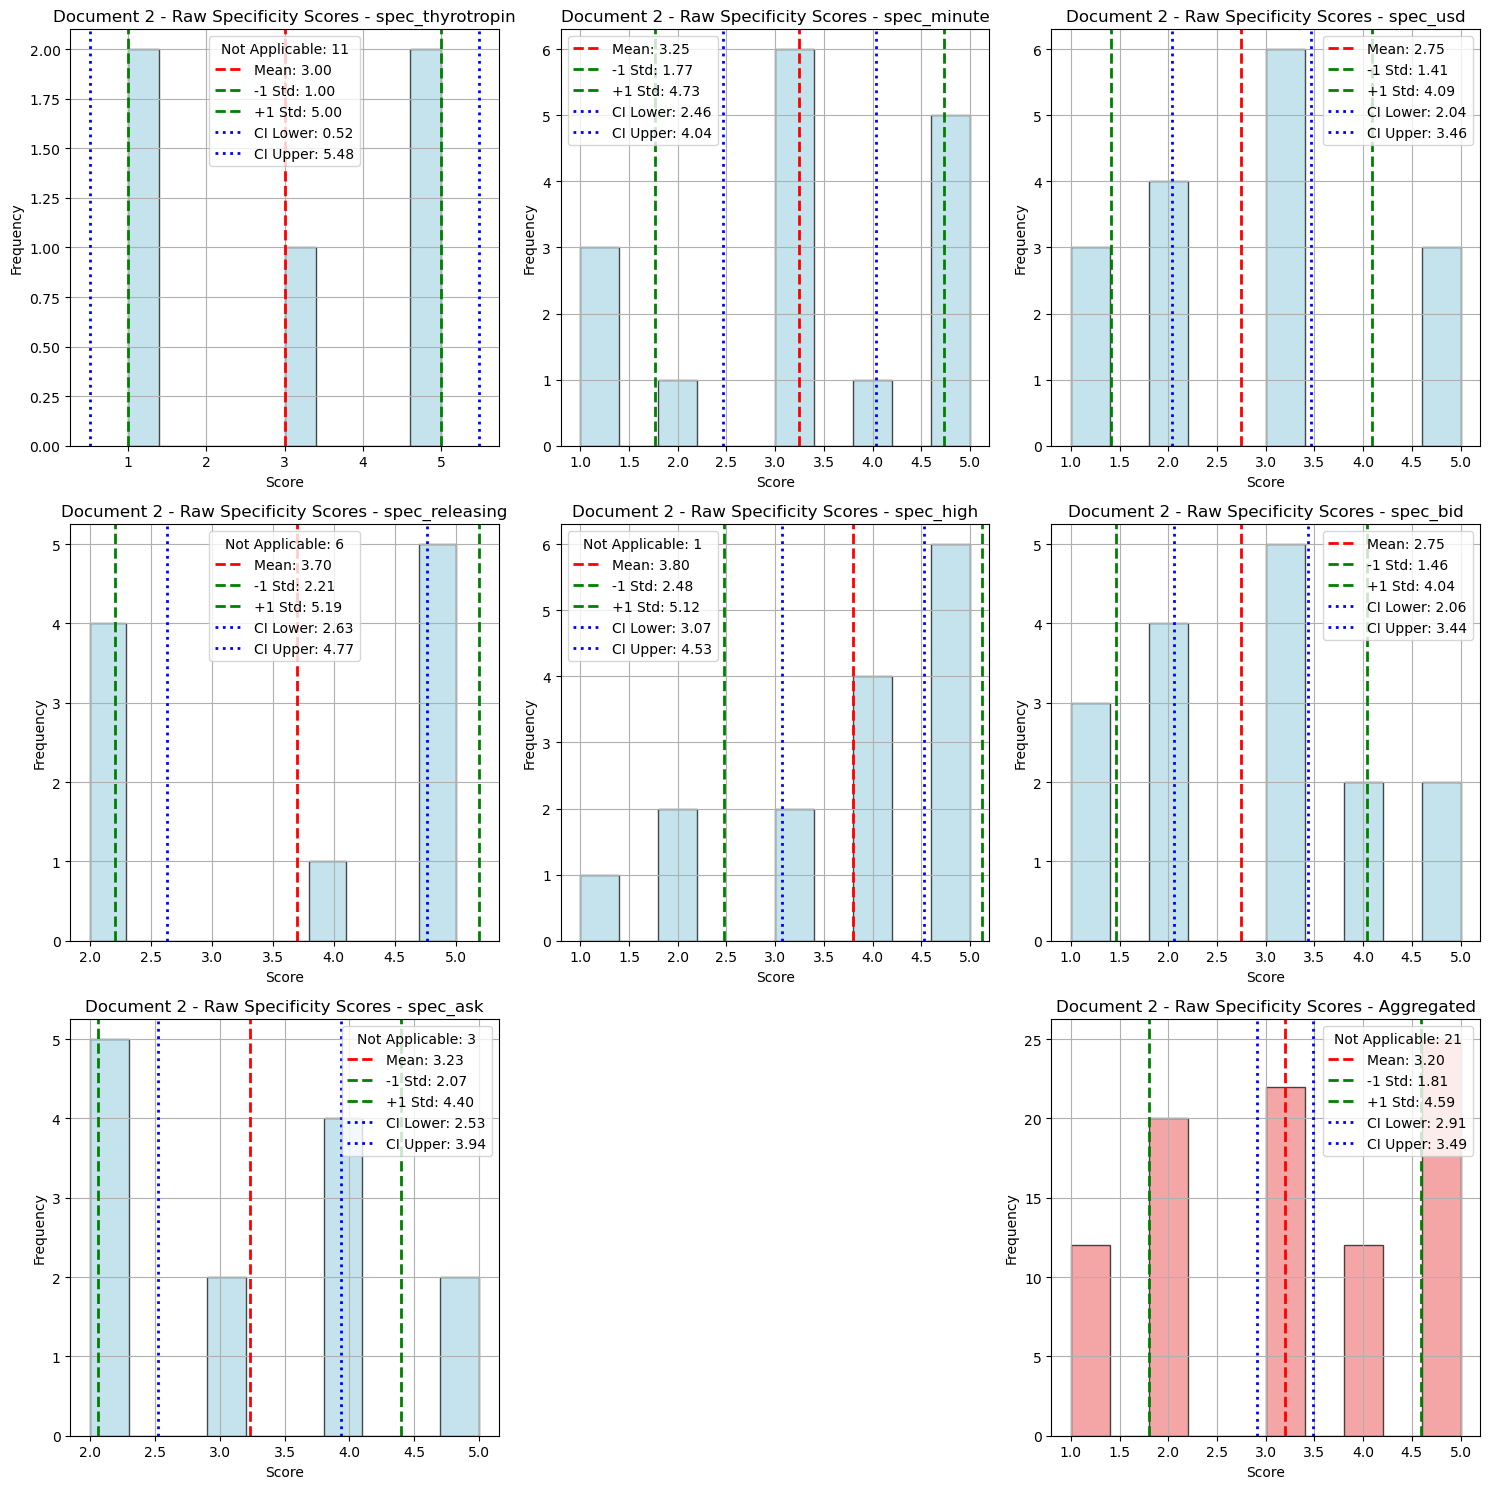

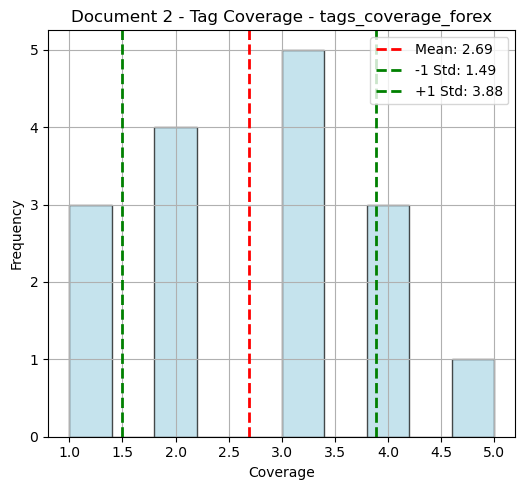

Correlation per Tag:
             Relevance vs Generality  Relevance vs Coverage  \
thyrotropin                 0.000000               0.180120   
minute                     -0.427490               0.105519   
usd                        -0.432092               0.238626   
releasing                  -0.565351               0.305709   
high                       -0.605245               0.381861   
bid                        -0.580632               0.251610   
ask                        -0.614815               0.179919   

             Generality vs Coverage  
thyrotropin               -0.486664  
minute                    -0.749906  
usd                       -0.513038  
releasing                 -0.709754  
high                      -0.559136  
bid                       -0.635304  
ask                       -0.379686  

Overall Correlations:
         Relevance vs Generality  Relevance vs Coverage  \
Overall                -0.553931               0.506241   

         Generality vs Cover

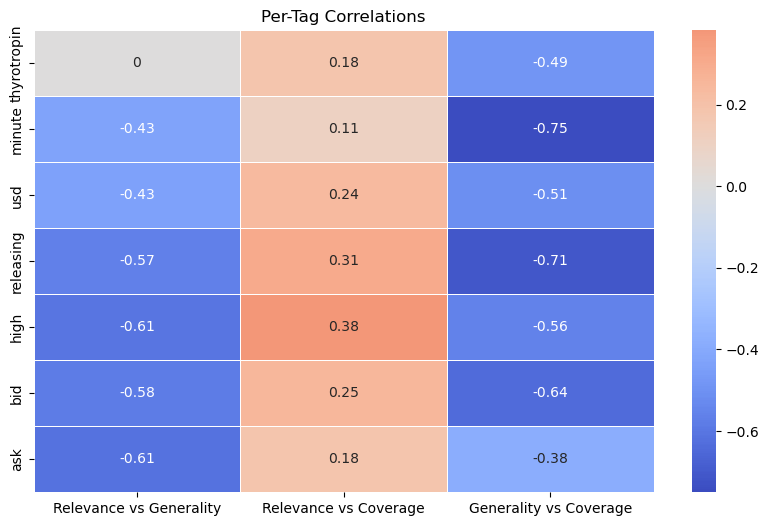

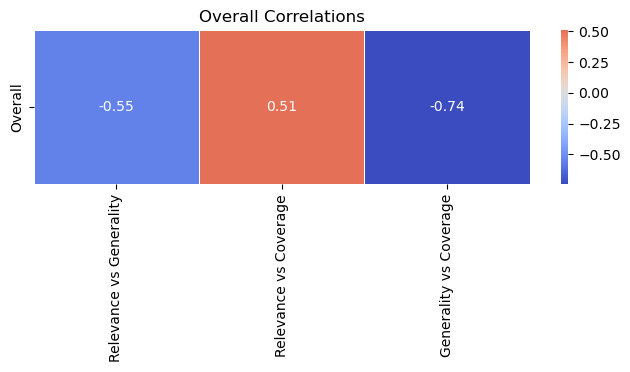


--- Analyzing Document 3 ---
Document 3 Relevance Distribution:
      tag_cancer  tag_microarray  tag_prostate  tag_ovarian  tag_gliomas  \
std       0.7932        1.454877      1.014479     0.813941     0.873212   
min       3.0000        1.000000      1.000000     1.000000     1.000000   
max       5.0000        5.000000      4.000000     4.000000     4.000000   
mean      4.3125        3.625000      1.687500     1.562500     1.687500   

      tag_lung  tag_genes  
std   0.894427   1.032796  
min   2.000000   1.000000  
max   5.000000   5.000000  
mean  4.000000   3.500000  
Document 3 Specificity Distribution:
      spec_cancer  spec_microarray  spec_prostate  spec_ovarian  spec_gliomas  \
std      1.611159         1.187234       0.755929      0.755929      1.173788   
min      1.000000         1.000000       2.000000      2.000000      1.000000   
max      5.000000         4.000000       4.000000      4.000000      5.000000   
mean     2.937500         2.466667       2.714286    

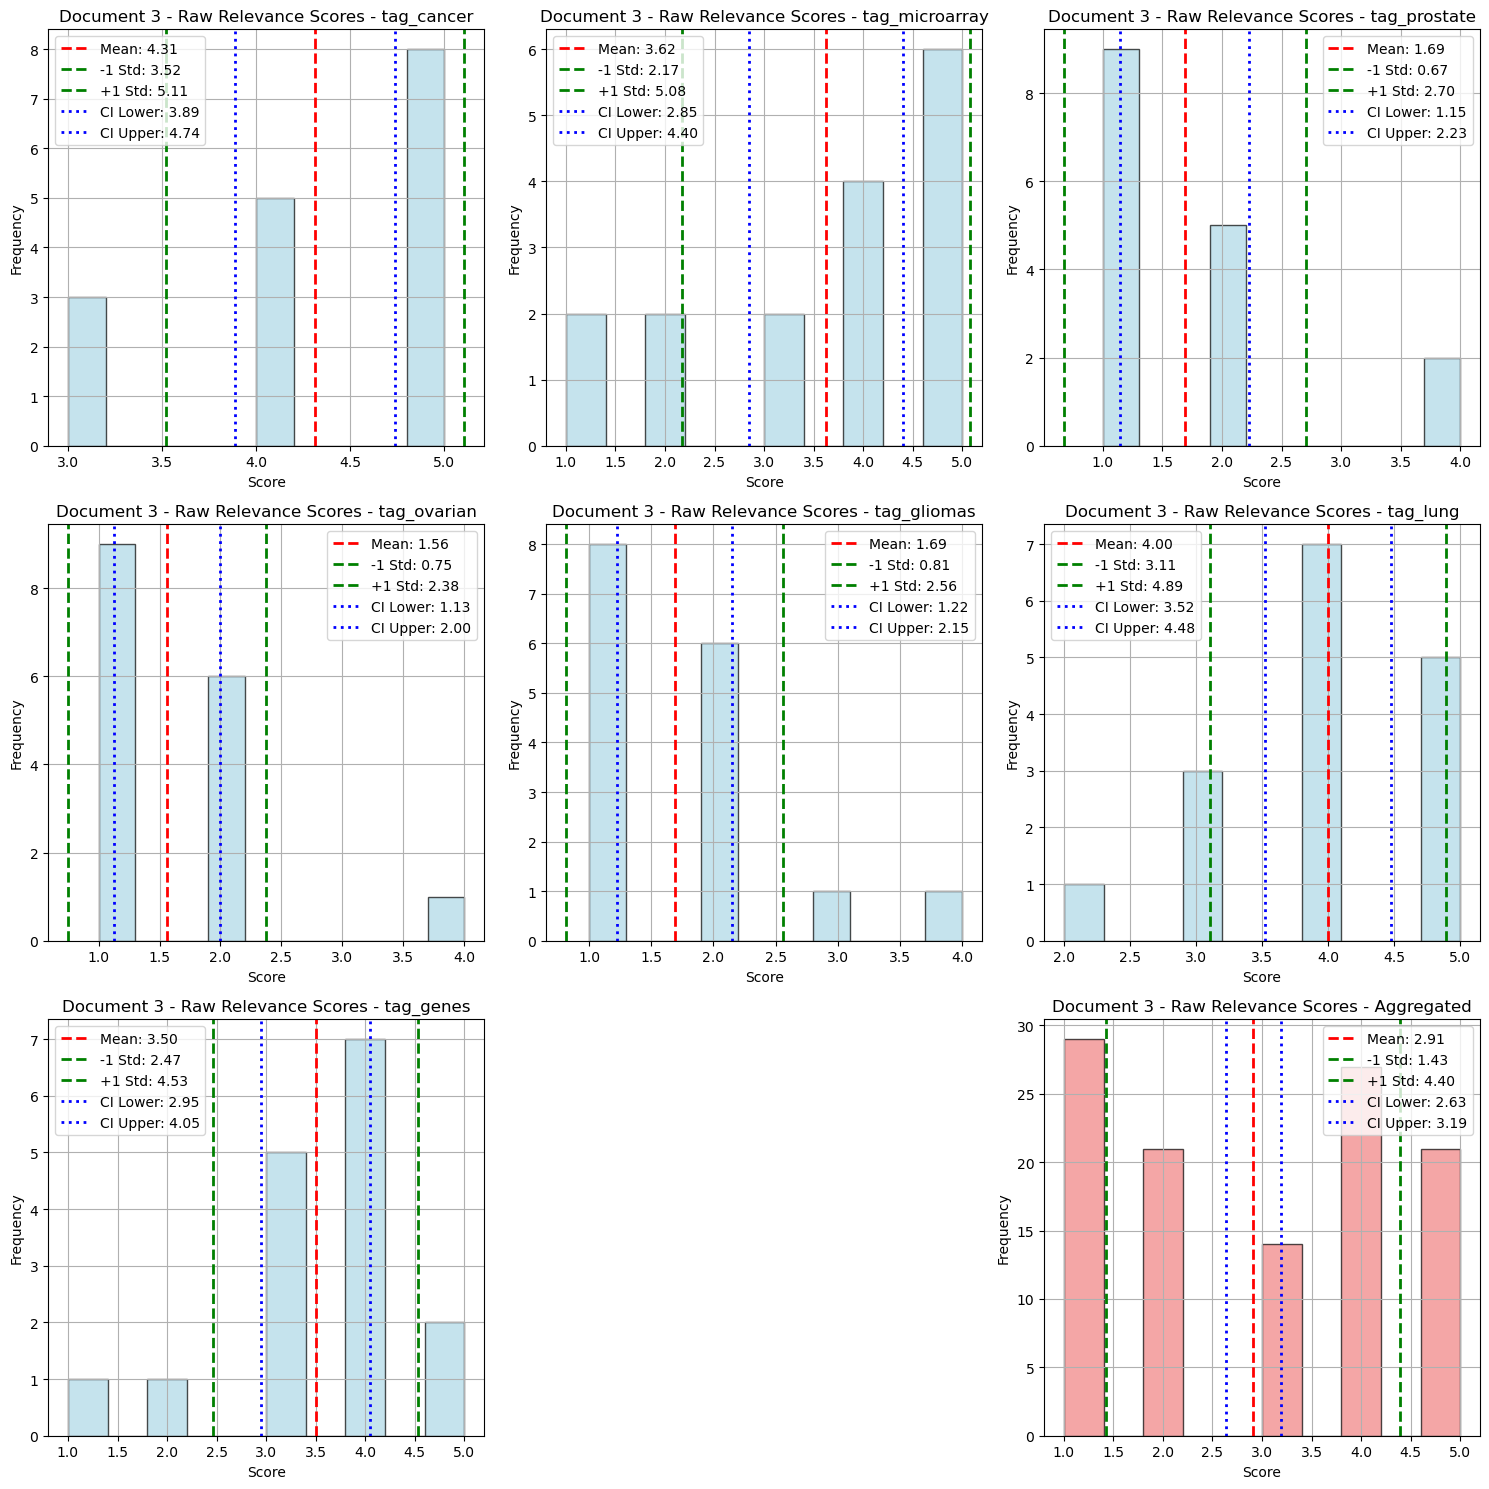

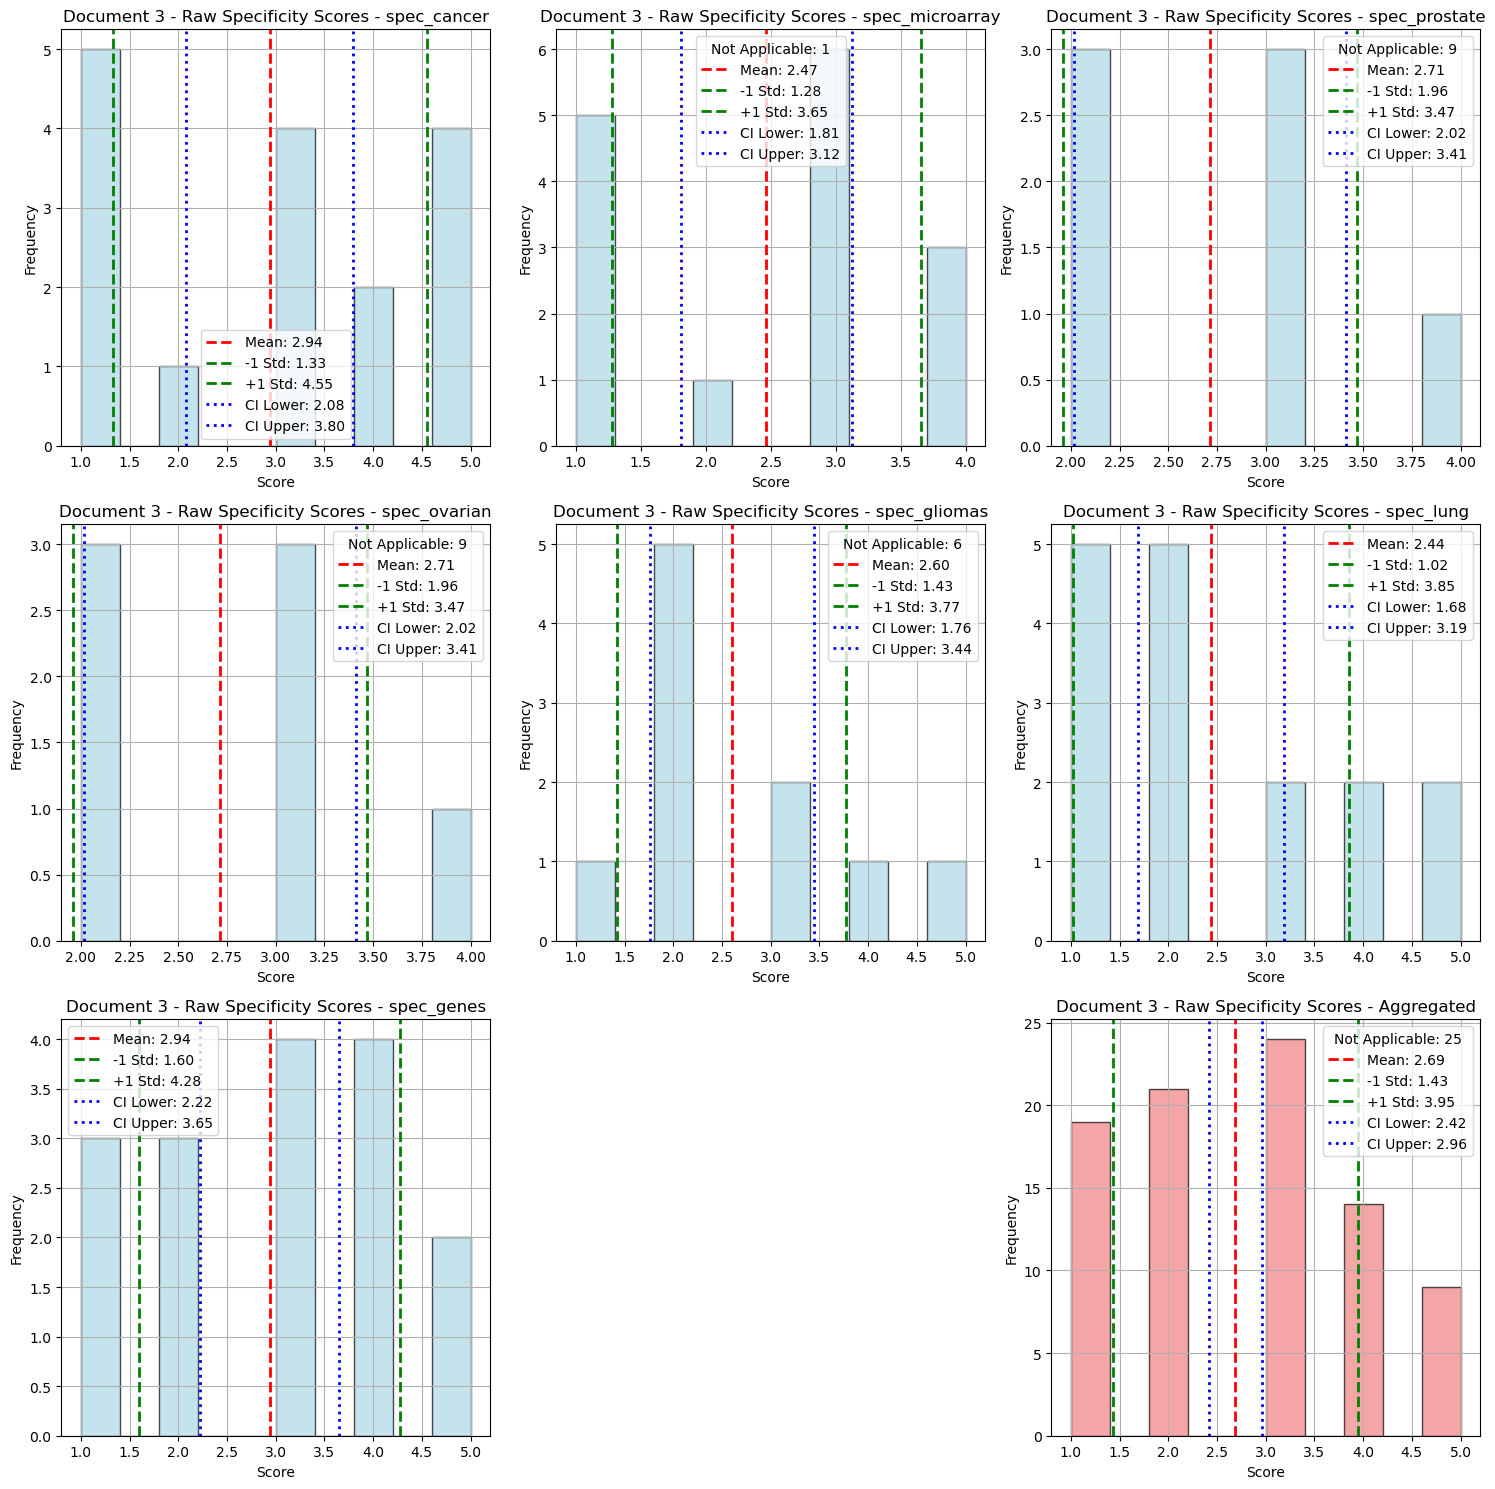

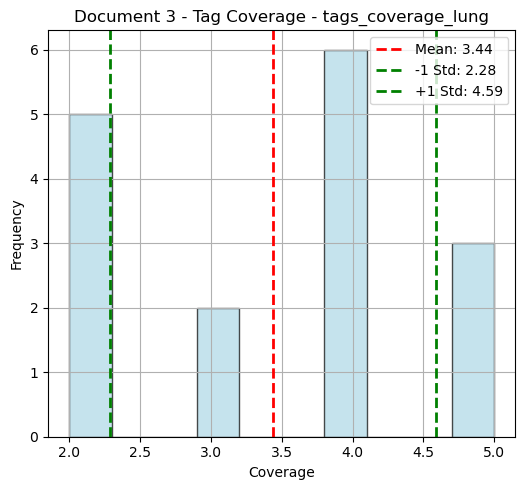

Correlation per Tag:
            Relevance vs Generality  Relevance vs Coverage  \
cancer                     0.000827               0.333324   
microarray                -0.467488               0.343466   
prostate                  -0.683130               0.381433   
ovarian                   -0.440959               0.382103   
gliomas                   -0.506259               0.550221   
lung                      -0.315420               0.170515   
genes                     -0.558623               0.702439   

            Generality vs Coverage  
cancer                   -0.540173  
microarray               -0.641964  
prostate                 -0.545705  
ovarian                  -0.545705  
gliomas                  -0.384434  
lung                     -0.693779  
genes                    -0.707528  

Overall Correlations:
         Relevance vs Generality  Relevance vs Coverage  \
Overall                -0.421829                0.58036   

         Generality vs Coverage  
Overall   

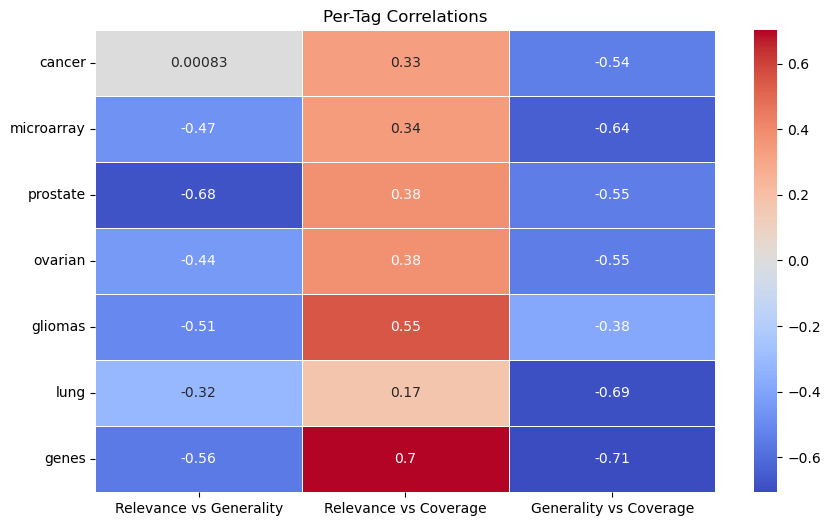

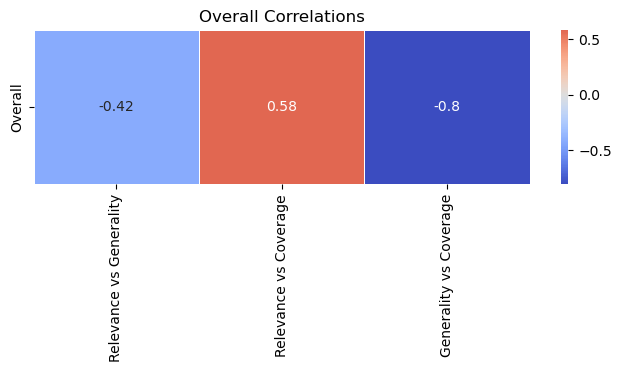

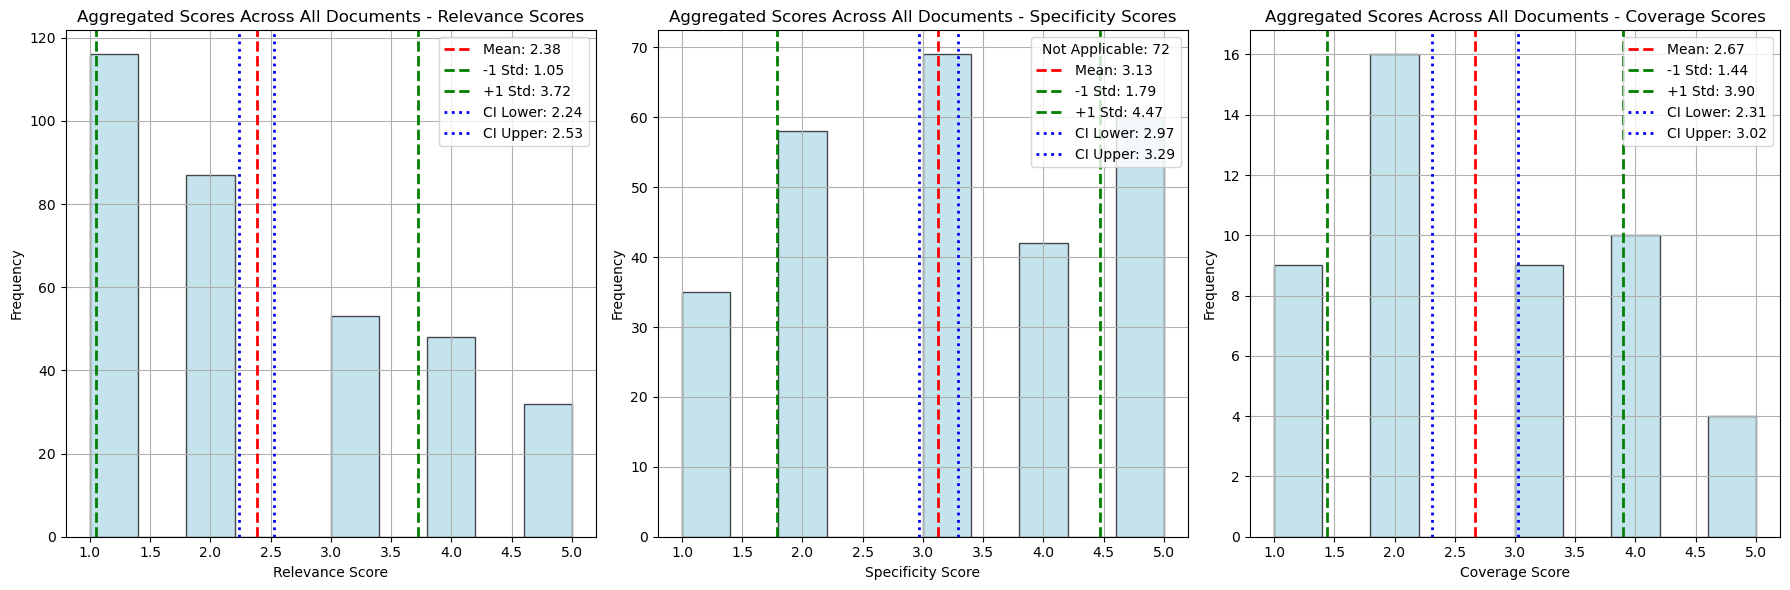

ICC for Relevance:


Type              Description       ICC          F  df1  df2  \
0   ICC1   Single raters absolute  0.456397  14.433267   20  315   
1   ICC2     Single random raters  0.463110  22.836437   20  300   
2   ICC3      Single fixed raters  0.577127  22.836437   20  300   
3  ICC1k  Average raters absolute  0.930716  14.433267   20  315   
4  ICC2k    Average random raters  0.932438  22.836437   20  300   
5  ICC3k     Average fixed raters  0.956210  22.836437   20  300   

           pval         CI95%  
0  9.769596e-34  [0.31, 0.65]  
1  8.386064e-49  [0.31, 0.66]  
2  8.386064e-49  [0.43, 0.75]  
3  9.769596e-34  [0.88, 0.97]  
4  8.386064e-49  [0.88, 0.97]  
5  8.386064e-49  [0.92, 0.98]


ICC for Generality:


Type              Description       ICC         F  df1  df2      pval  \
0   ICC1   Single raters absolute  0.009768  1.157830    8  135  0.329350   
1   ICC2     Single random raters  0.031642  1.823301    8  120  0.079087   
2   ICC3      Single fixed raters  0.048938  1.823301    8  120  0.079087   
3  ICC1k  Average raters absolute  0.136315  1.157830    8  135  0.329350   
4  ICC2k    Average random raters  0.343320  1.823301    8  120  0.079087   
5  ICC3k     Average fixed raters  0.451544  1.823301    8  120  0.079087   

           CI95%  
0  [-0.03, 0.17]  
1  [-0.01, 0.19]  
2  [-0.01, 0.27]  
3  [-0.98, 0.77]  
4  [-0.15, 0.79]  
5  [-0.26, 0.85]


ICC for Coverage:


Type              Description       ICC          F  df1  df2      pval  \
0   ICC1   Single raters absolute  0.312611   8.276471    2   45  0.000869   
1   ICC2     Single random raters  0.328063  17.810127    2   30  0.000008   
2   ICC3      Single fixed raters  0.512346  17.810127    2   30  0.000008   
3  ICC1k  Average raters absolute  0.879176   8.276471    2   45  0.000869   
4  ICC2k    Average random raters  0.886515  17.810127    2   30  0.000008   
5  ICC3k     Average fixed raters  0.943852  17.810127    2   30  0.000008   

          CI95%  
0  [0.06, 0.95]  
1  [0.09, 0.95]  
2  [0.17, 0.98]  
3   [0.52, 1.0]  
4    [0.6, 1.0]  
5   [0.77, 1.0]


ICC for Shared Coverage:


Type              Description       ICC         F  df1  df2      pval  \
0   ICC1   Single raters absolute  0.002647  1.042471    1   30  0.315411   
1   ICC2     Single random raters  0.033582  2.142857    1   15  0.163876   
2   ICC3      Single fixed raters  0.066667  2.142857    1   15  0.163876   
3  ICC1k  Average raters absolute  0.040741  1.042471    1   30  0.315411   
4  ICC2k    Average random raters  0.357320  2.142857    1   15  0.163876   
5  ICC3k     Average fixed raters  0.533333  2.142857    1   15  0.163876   

           CI95%  
0  [-0.05, 0.98]  
1  [-0.02, 0.98]  
2  [-0.04, 0.99]  
3   [-4.34, 1.0]  
4   [-0.43, 1.0]  
5   [-1.89, 1.0]


Fleiss' Kappa for Relevance: 0.1503
Fleiss' Kappa for Generality: -0.0054
Fleiss' Kappa for Coverage: 0.0165
Fleiss' Kappa for Shared Coverage: 0.0110


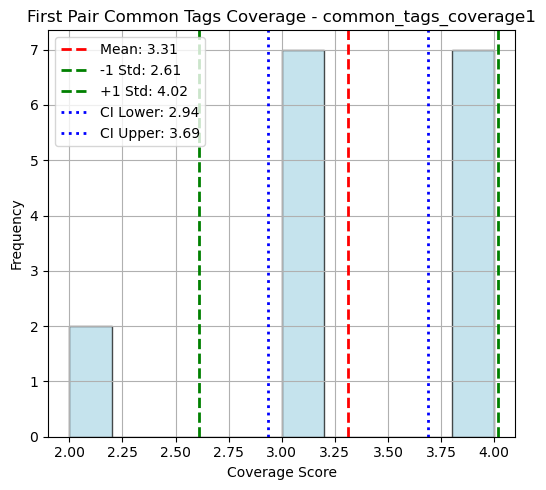

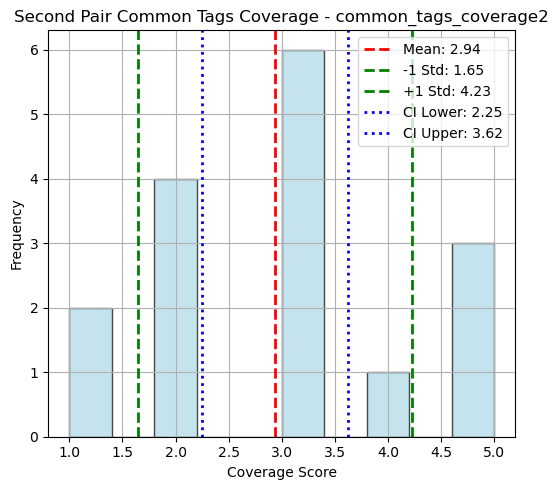


Metrics for First Pair Common Tags:
Accuracy: 0.70
Precision: 0.40
Recall: 0.48
F1-Score: 0.44

Metrics for Second Pair Common Tags:
Accuracy: 0.59
Precision: 1.00
Recall: 0.28
F1-Score: 0.43


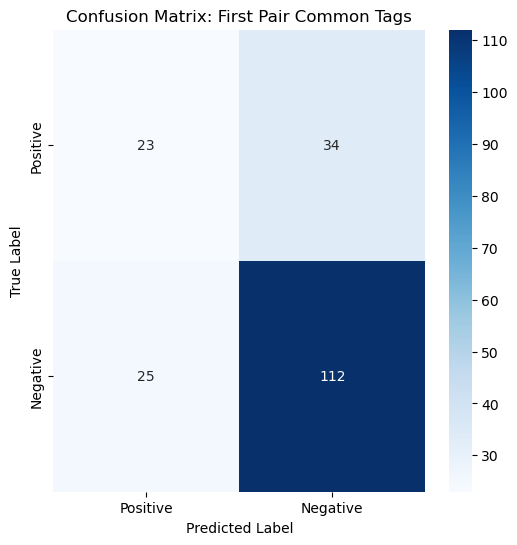

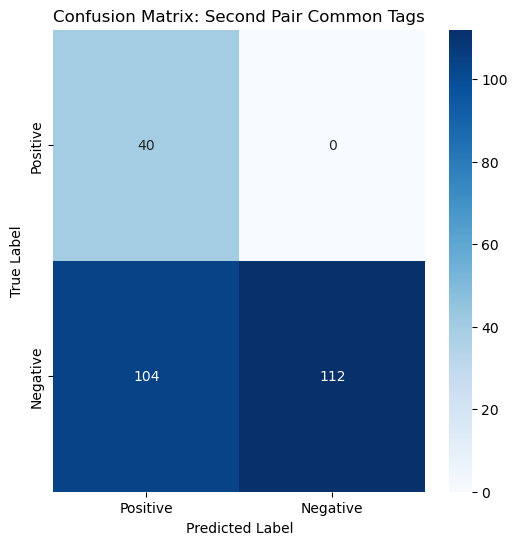

In [19]:
analyze_tags(
    df_baseline_generated,
    relevance_columns_list=[
        baseline_first_document_relevance_columns, 
        baseline_second_document_relevance_columns,
        baseline_third_document_relevance_columns
    ],
    spec_columns_list=[
        baseline_first_document_spec_columns, 
        baseline_second_document_spec_columns,
        baseline_third_document_spec_columns
    ],
    coverage_columns_list=[
        baseline_first_document_coverage_columns, 
        baseline_second_document_coverage_columns,
        baseline_third_document_coverage_columns
    ],
    suggested_columns_list=[
        baseline_first_document_suggested_columns,
        baseline_second_document_suggested_columns,
        baseline_third_document_suggested_columns
    ],
    common_tags_columns_1=baseline_first_pair_common_tags_columns,
    common_tags_true_tags_1=baseline_first_pair_common_tags_true_tags,
    common_tags_coverage_1=baseline_first_pair_coverage_columns,
    common_tags_columns_2=baseline_second_pair_common_tags_columns,
    common_tags_true_tags_2=baseline_second_pair_common_tags_true_tags,
    common_tags_coverage_2=baseline_second_pair_coverage_columns
)

In [20]:
df_human_generated.columns

Index(['timestamp', 'age_range', 'gender', 'education', 'english_prof',
       'lol_game_desc', 'tag_lol', 'tag_video_games', 'tag_multiplayer',
       'tag_game_data', 'tag_riot_api', 'tag_battle_arena', 'spec_lol',
       'spec_video_games', 'spec_multiplayer', 'spec_game_data',
       'spec_riot_api', 'spec_battle_arena', 'tags_coverage_lol',
       'suggested_tags_lol', 'forex_desc', 'tag_hist_price', 'tag_forex',
       'tag_usd_jpy', 'tag_currency_pairs', 'tag_yearly_data', 'tag_finance',
       'tag_minute_high', 'spec_hist_price', 'spec_forex', 'spec_usd_jpy',
       'spec_currency_pairs', 'spec_yearly_data', 'spec_finance',
       'spec_minute_high', 'tags_coverage_forex', 'suggested_tags_forex',
       'lung_cancer_desc', 'tag_lung_cancer', 'tag_cancer', 'tag_oncology',
       'tag_mrna_prof', 'tag_biology', 'tag_carcinomas', 'tag_gene_expr',
       'spec_lung_cancer', 'spec_cancer', 'spec_oncology', 'spec_mrna_prof',
       'spec_biology', 'spec_carcinomas', 'spec_gene_expr'

In [21]:
# Helper function to calculate and return mean, std, and confidence interval
def calculate_stats(data, confidence_level=0.95):
    data = np.array(data)
    data = data[~np.isnan(data)]  # Remove NaN values for accurate calculation
    mean = data.mean()
    std = data.std()
    n = len(data)
    
    # Calculate the margin of error for the confidence interval
    if n > 1:  # Ensure there are enough data points
        t_stat = t.ppf((1 + confidence_level) / 2., n - 1)
        margin_of_error = t_stat * (std / np.sqrt(n))
        ci_lower = mean - margin_of_error
        ci_upper = mean + margin_of_error
    else:
        ci_lower, ci_upper = mean, mean  # If not enough data, CI is the mean itself
    
    return mean, std, ci_lower, ci_upper

# Function to plot relevance and specificity for regular vs overarching tags for multiple documents
def plot_relevance_specificity_multiple_documents(df, doc_relevance_columns_list, doc_spec_columns_list, doc_tag_types_list, document_names):
    """
    This function plots relevance and specificity by tag type (regular and overarching) for multiple documents.
    It also accumulates data for all documents and plots the cumulative result at the end.
    """
    
    # Cumulative data for all documents
    cumulative_data = {
        'regular_relevance': [],
        'overarching_relevance': [],
        'regular_spec': [],
        'overarching_spec': []
    }
    
    # Iterate over each document's data
    for i, (relevance_columns, spec_columns, tag_types, document_name) in enumerate(zip(doc_relevance_columns_list, doc_spec_columns_list, doc_tag_types_list, document_names)):
        
        # Preprocess numerical columns
        columns_to_preprocess = relevance_columns + spec_columns
        df = preprocess_numerical_columns(df, columns_to_preprocess)
        
        # Extract the tag type columns
        regular_relevance_cols = tag_types['regular']
        overarching_relevance_cols = tag_types['overarching']

        # Get corresponding specificity columns
        regular_spec_cols = [spec_columns[relevance_columns.index(col)] for col in regular_relevance_cols]
        overarching_spec_cols = [spec_columns[relevance_columns.index(col)] for col in overarching_relevance_cols]

        # Calculate statistics for relevance and specificity
        regular_relevance = df[regular_relevance_cols].values.flatten()
        overarching_relevance = df[overarching_relevance_cols].values.flatten()

        regular_spec = df[regular_spec_cols].values.flatten()
        overarching_spec = df[overarching_spec_cols].values.flatten()

        # Add data to cumulative results
        cumulative_data['regular_relevance'].extend(regular_relevance)
        cumulative_data['overarching_relevance'].extend(overarching_relevance)
        cumulative_data['regular_spec'].extend(regular_spec)
        cumulative_data['overarching_spec'].extend(overarching_spec)

        # Calculate stats for relevance
        reg_mean_rel, reg_std_rel, reg_ci_lower_rel, reg_ci_upper_rel = calculate_stats(regular_relevance)
        over_mean_rel, over_std_rel, over_ci_lower_rel, over_ci_upper_rel = calculate_stats(overarching_relevance)

        # Calculate stats for specificity
        reg_mean_spec, reg_std_spec, reg_ci_lower_spec, reg_ci_upper_spec = calculate_stats(regular_spec)
        over_mean_spec, over_std_spec, over_ci_lower_spec, over_ci_upper_spec = calculate_stats(overarching_spec)

        # Plotting Relevance
        fig, axs = plt.subplots(1, 2, figsize=(14, 6))
        
        # Relevance Plot
        axs[0].hist(regular_relevance, bins=10, color='lightblue', edgecolor='black', alpha=0.7, label='Regular Tags')
        axs[0].hist(overarching_relevance, bins=10, color='lightcoral', edgecolor='black', alpha=0.7, label='Overarching Tags')
        axs[0].set_title(f'{document_name} - Relevance Scores by Tag Type')
        axs[0].set_xlabel('Relevance Score')
        axs[0].set_ylabel('Frequency')
        axs[0].legend()

        # Plot mean and CI for Relevance
        axs[0].axvline(reg_mean_rel, color='blue', linestyle='dashed', linewidth=2, label=f'Regular Mean: {reg_mean_rel:.2f}')
        axs[0].axvline(over_mean_rel, color='red', linestyle='dashed', linewidth=2, label=f'Overarching Mean: {over_mean_rel:.2f}')
        # Plot confidence intervals
        axs[0].axvline(reg_ci_lower_rel, color='blue', linestyle='dotted', linewidth=2, label=f'Regular CI Lower: {reg_ci_lower_rel:.2f}')
        axs[0].axvline(reg_ci_upper_rel, color='blue', linestyle='dotted', linewidth=2, label=f'Regular CI Upper: {reg_ci_upper_rel:.2f}')
        axs[0].axvline(over_ci_lower_rel, color='red', linestyle='dotted', linewidth=2, label=f'Overarching CI Lower: {over_ci_lower_rel:.2f}')
        axs[0].axvline(over_ci_upper_rel, color='red', linestyle='dotted', linewidth=2, label=f'Overarching CI Upper: {over_ci_upper_rel:.2f}')
        
        axs[0].legend()

        # Specificity Plot
        axs[1].hist(regular_spec, bins=10, color='lightblue', edgecolor='black', alpha=0.7, label='Regular Tags')
        axs[1].hist(overarching_spec, bins=10, color='lightcoral', edgecolor='black', alpha=0.7, label='Overarching Tags')
        axs[1].set_title(f'{document_name} - Specificity Scores by Tag Type')
        axs[1].set_xlabel('Specificity Score')
        axs[1].set_ylabel('Frequency')
        axs[1].legend()

        # Plot mean and CI for Specificity
        axs[1].axvline(reg_mean_spec, color='blue', linestyle='dashed', linewidth=2, label=f'Regular Mean: {reg_mean_spec:.2f}')
        axs[1].axvline(over_mean_spec, color='red', linestyle='dashed', linewidth=2, label=f'Overarching Mean: {over_mean_spec:.2f}')
        # Plot confidence intervals
        axs[1].axvline(reg_ci_lower_spec, color='blue', linestyle='dotted', linewidth=2, label=f'Regular CI Lower: {reg_ci_lower_spec:.2f}')
        axs[1].axvline(reg_ci_upper_spec, color='blue', linestyle='dotted', linewidth=2, label=f'Regular CI Upper: {reg_ci_upper_spec:.2f}')
        axs[1].axvline(over_ci_lower_spec, color='red', linestyle='dotted', linewidth=2, label=f'Overarching CI Lower: {over_ci_lower_spec:.2f}')
        axs[1].axvline(over_ci_upper_spec, color='red', linestyle='dotted', linewidth=2, label=f'Overarching CI Upper: {over_ci_upper_spec:.2f}')
        
        axs[1].legend()

        plt.tight_layout()
        plt.show()

    # After processing all documents, plot the cumulative results
    plot_cumulative_relevance_specificity(cumulative_data)

# Function to plot cumulative relevance and specificity
def plot_cumulative_relevance_specificity(cumulative_data):
    """
    This function plots the cumulative relevance and specificity scores for all documents combined.
    """
    
    # Calculate cumulative stats for relevance
    reg_mean_rel, reg_std_rel, reg_ci_lower_rel, reg_ci_upper_rel = calculate_stats(cumulative_data['regular_relevance'])
    over_mean_rel, over_std_rel, over_ci_lower_rel, over_ci_upper_rel = calculate_stats(cumulative_data['overarching_relevance'])

    # Calculate cumulative stats for specificity
    reg_mean_spec, reg_std_spec, reg_ci_lower_spec, reg_ci_upper_spec = calculate_stats(cumulative_data['regular_spec'])
    over_mean_spec, over_std_spec, over_ci_lower_spec, over_ci_upper_spec = calculate_stats(cumulative_data['overarching_spec'])

    # Plotting cumulative Relevance and Specificity
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))
    
    # Cumulative Relevance Plot
    axs[0].hist(cumulative_data['regular_relevance'], bins=10, color='lightblue', edgecolor='black', alpha=0.7, label='Regular Tags')
    axs[0].hist(cumulative_data['overarching_relevance'], bins=10, color='lightcoral', edgecolor='black', alpha=0.7, label='Overarching Tags')
    axs[0].set_title(f'Cumulative - Relevance Scores by Tag Type')
    axs[0].set_xlabel('Relevance Score')
    axs[0].set_ylabel('Frequency')
    axs[0].legend()

    # Plot mean and CI for cumulative Relevance
    axs[0].axvline(reg_mean_rel, color='blue', linestyle='dashed', linewidth=2, label=f'Regular Mean: {reg_mean_rel:.2f}')
    axs[0].axvline(over_mean_rel, color='red', linestyle='dashed', linewidth=2, label=f'Overarching Mean: {over_mean_rel:.2f}')
    # Plot confidence intervals
    axs[0].axvline(reg_ci_lower_rel, color='blue', linestyle='dotted', linewidth=2, label=f'Regular CI Lower: {reg_ci_lower_rel:.2f}')
    axs[0].axvline(reg_ci_upper_rel, color='blue', linestyle='dotted', linewidth=2, label=f'Regular CI Upper: {reg_ci_upper_rel:.2f}')
    axs[0].axvline(over_ci_lower_rel, color='red', linestyle='dotted', linewidth=2, label=f'Overarching CI Lower: {over_ci_lower_rel:.2f}')
    axs[0].axvline(over_ci_upper_rel, color='red', linestyle='dotted', linewidth=2, label=f'Overarching CI Upper: {over_ci_upper_rel:.2f}')
    
    axs[0].legend()

    # Cumulative Specificity Plot
    axs[1].hist(cumulative_data['regular_spec'], bins=10, color='lightblue', edgecolor='black', alpha=0.7, label='Regular Tags')
    axs[1].hist(cumulative_data['overarching_spec'], bins=10, color='lightcoral', edgecolor='black', alpha=0.7, label='Overarching Tags')
    axs[1].set_title(f'Cumulative - Specificity Scores by Tag Type')
    axs[1].set_xlabel('Specificity Score')
    axs[1].set_ylabel('Frequency')
    axs[1].legend()

    # Plot mean and CI for cumulative Specificity
    axs[1].axvline(reg_mean_spec, color='blue', linestyle='dashed', linewidth=2, label=f'Regular Mean: {reg_mean_spec:.2f}')
    axs[1].axvline(over_mean_spec, color='red', linestyle='dashed', linewidth=2, label=f'Overarching Mean: {over_mean_spec:.2f}')
    # Plot confidence intervals
    axs[1].axvline(reg_ci_lower_spec, color='blue', linestyle='dotted', linewidth=2, label=f'Regular CI Lower: {reg_ci_lower_spec:.2f}')
    axs[1].axvline(reg_ci_upper_spec, color='blue', linestyle='dotted', linewidth=2, label=f'Regular CI Upper: {reg_ci_upper_spec:.2f}')
    axs[1].axvline(over_ci_lower_spec, color='red', linestyle='dotted', linewidth=2, label=f'Overarching CI Lower: {over_ci_lower_spec:.2f}')
    axs[1].axvline(over_ci_upper_spec, color='red', linestyle='dotted', linewidth=2, label=f'Overarching CI Upper: {over_ci_upper_spec:.2f}')
    
    axs[1].legend()

    plt.tight_layout()
    plt.show()

In [22]:
human_first_document_relevance_columns = ['tag_lol', 'tag_video_games', 'tag_multiplayer', 'tag_game_data', 'tag_riot_api', 'tag_battle_arena']
human_first_document_spec_columns = ['spec_lol', 'spec_video_games', 'spec_multiplayer', 'spec_game_data', 'spec_riot_api', 'spec_battle_arena']
human_first_document_coverage_columns = ['tags_coverage_lol']
human_first_document_suggested_columns = ['suggested_tags_lol']
human_first_document_tag_types = {
    'regular': ['tag_lol', 'tag_multiplayer', 'tag_game_data', 'tag_riot_api', 'tag_battle_arena'],
    'overarching': ['tag_video_games']
}

human_second_document_relevance_columns = ['tag_hist_price', 'tag_forex', 'tag_usd_jpy', 'tag_currency_pairs', 'tag_yearly_data', 'tag_finance', 'tag_minute_high']
human_second_document_spec_columns = ['spec_hist_price', 'spec_forex', 'spec_usd_jpy', 'spec_currency_pairs', 'spec_yearly_data', 'spec_finance', 'spec_minute_high']
human_second_document_coverage_columns = ['tags_coverage_forex']
human_second_document_suggested_columns = ['suggested_tags_forex']
human_second_document_tag_types = {
    'regular': ['tag_hist_price', 'tag_usd_jpy', 'tag_yearly_data', 'tag_minute_high'],
    'overarching': ['tag_forex', 'tag_currency_pairs', 'tag_finance']
}

human_third_document_relevance_columns = ['tag_lung_cancer', 'tag_cancer', 'tag_oncology', 'tag_mrna_prof', 'tag_biology', 'tag_carcinomas', 'tag_gene_expr']
human_third_document_spec_columns = ['spec_lung_cancer', 'spec_cancer', 'spec_oncology', 'spec_mrna_prof', 'spec_biology', 'spec_carcinomas', 'spec_gene_expr']
human_third_document_coverage_columns = ['tags_coverage_lung']
human_third_document_suggested_columns = ['suggested_tags_lung']
human_third_document_tag_types = {
    'regular': ['tag_lung_cancer', 'tag_mrna_prof', 'tag_carcinomas', 'tag_gene_expr'],
    'overarching': ['tag_cancer', 'tag_oncology', 'tag_biology']
}

human_first_pair_common_tags_columns = ['common_tags1']
human_first_pair_common_tags_true_tags = ["Coronavirus", "Covid-19", "Health", "Public Health", "Epidemiology"]
human_first_pair_coverage_columns = ['common_tags_coverage1']

human_second_pair_common_tags_columns = ['common_tags2']
human_second_pair_common_tags_true_tags = ["Movies", "IMDb", "Film Information"]
human_second_pair_coverage_columns = ['common_tags_coverage2']


--- Analyzing Document 1 ---
Document 1 Relevance Distribution:
       tag_lol  tag_video_games  tag_multiplayer  tag_game_data  tag_riot_api  \
std   0.736788         1.162919         1.014185       0.798809      1.069045   
min   3.000000         2.000000         2.000000       3.000000      2.000000   
max   5.000000         5.000000         5.000000       5.000000      5.000000   
mean  4.600000         3.933333         3.800000       4.266667      4.000000   

      tag_battle_arena  
std           1.125463  
min           1.000000  
max           5.000000  
mean          3.133333  
Document 1 Specificity Distribution:
      spec_lol  spec_video_games  spec_multiplayer  spec_game_data  \
std   0.833809          0.892582          0.974961        0.883715   
min   1.000000          3.000000          2.000000        2.000000   
max   3.000000          5.000000          5.000000        5.000000   
mean  1.533333          4.214286          3.785714        2.933333   

      spec_riot_

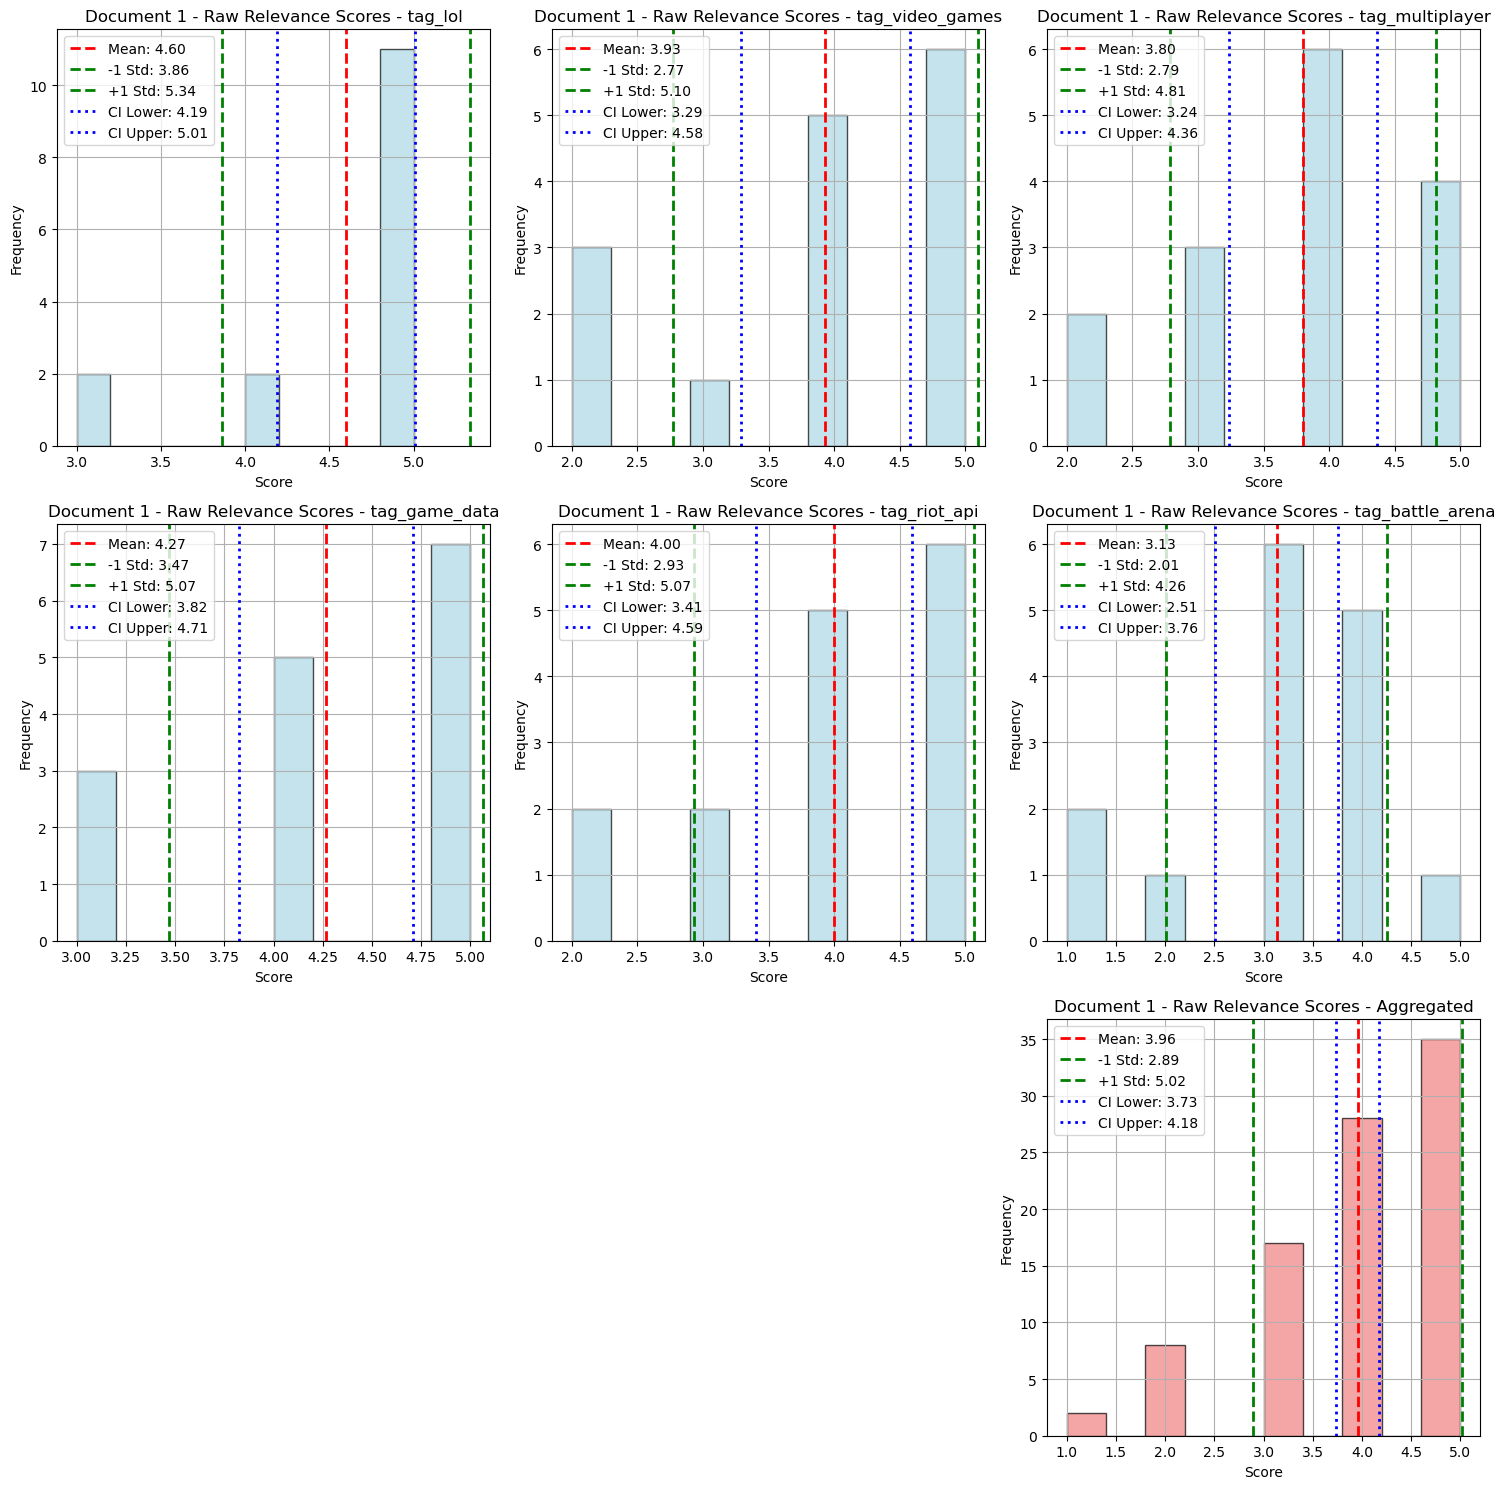

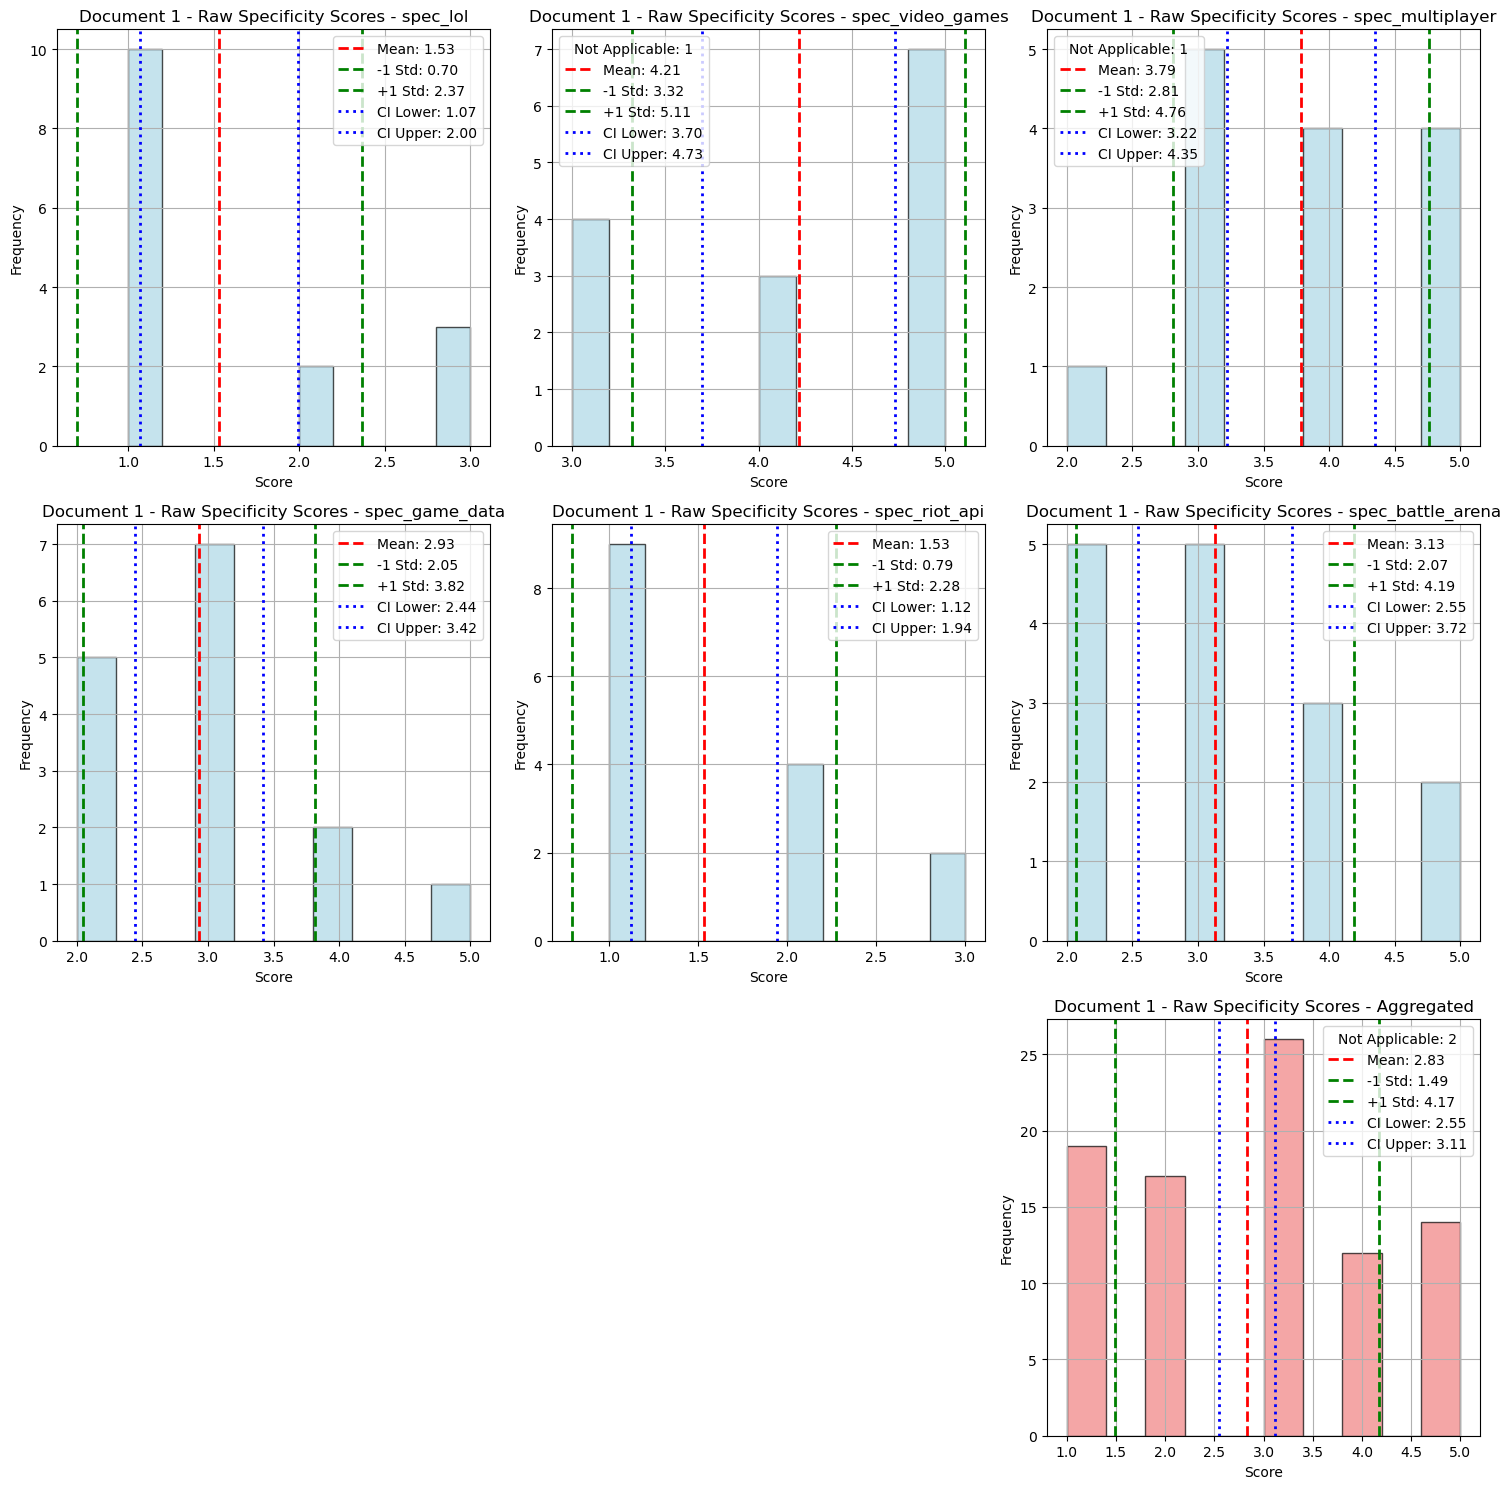

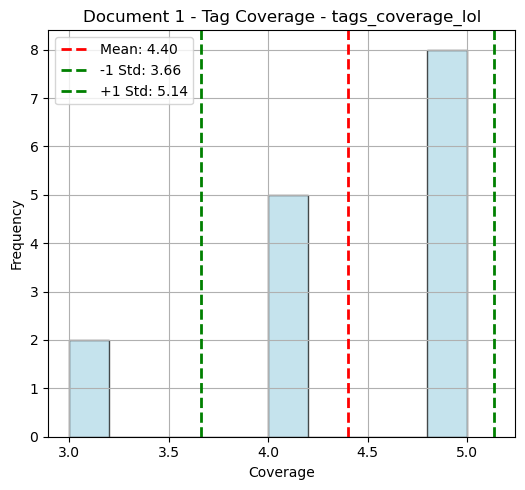

Correlation per Tag:
             Relevance vs Generality  Relevance vs Coverage  \
lol                         0.198309               0.293247   
video                       0.534524               0.347683   
multiplayer                -0.029234               0.374702   
game                        0.286606              -0.025678   
riot                       -0.100101              -0.159909   
battle                     -0.417100               0.082485   

             Generality vs Coverage  
lol                       -0.413058  
video                     -0.273980  
multiplayer               -0.302699  
game                      -0.326371  
riot                      -0.052059  
battle                    -0.339826  

Overall Correlations:
         Relevance vs Generality  Relevance vs Coverage  \
Overall                  0.33273              -0.045977   

         Generality vs Coverage  
Overall               -0.366817  


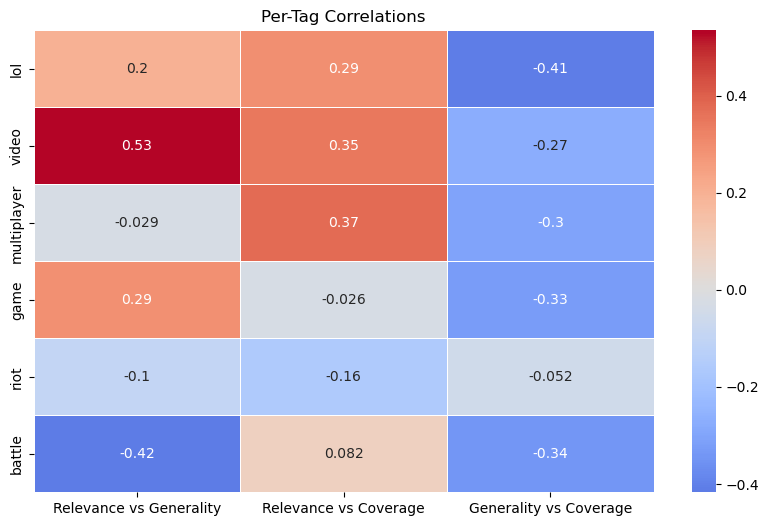

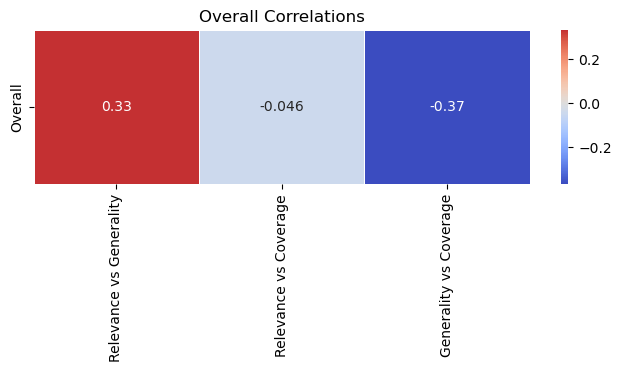


--- Analyzing Document 2 ---
Document 2 Relevance Distribution:
      tag_hist_price  tag_forex  tag_usd_jpy  tag_currency_pairs  \
std         0.990430   0.816497     1.222799            1.060099   
min         2.000000   3.000000     2.000000            2.000000   
max         5.000000   5.000000     5.000000            5.000000   
mean        4.133333   4.333333     3.933333            3.533333   

      tag_yearly_data  tag_finance  tag_minute_high  
std          0.828079     1.187234         1.505545  
min          2.000000     1.000000         1.000000  
max          5.000000     5.000000         5.000000  
mean         3.400000     3.466667         3.133333  
Document 2 Specificity Distribution:
      spec_hist_price  spec_forex  spec_usd_jpy  spec_currency_pairs  \
std          1.567528    1.125463      1.222799             1.207122   
min          1.000000    1.000000      1.000000             1.000000   
max          5.000000    4.000000      5.000000             5.000000   

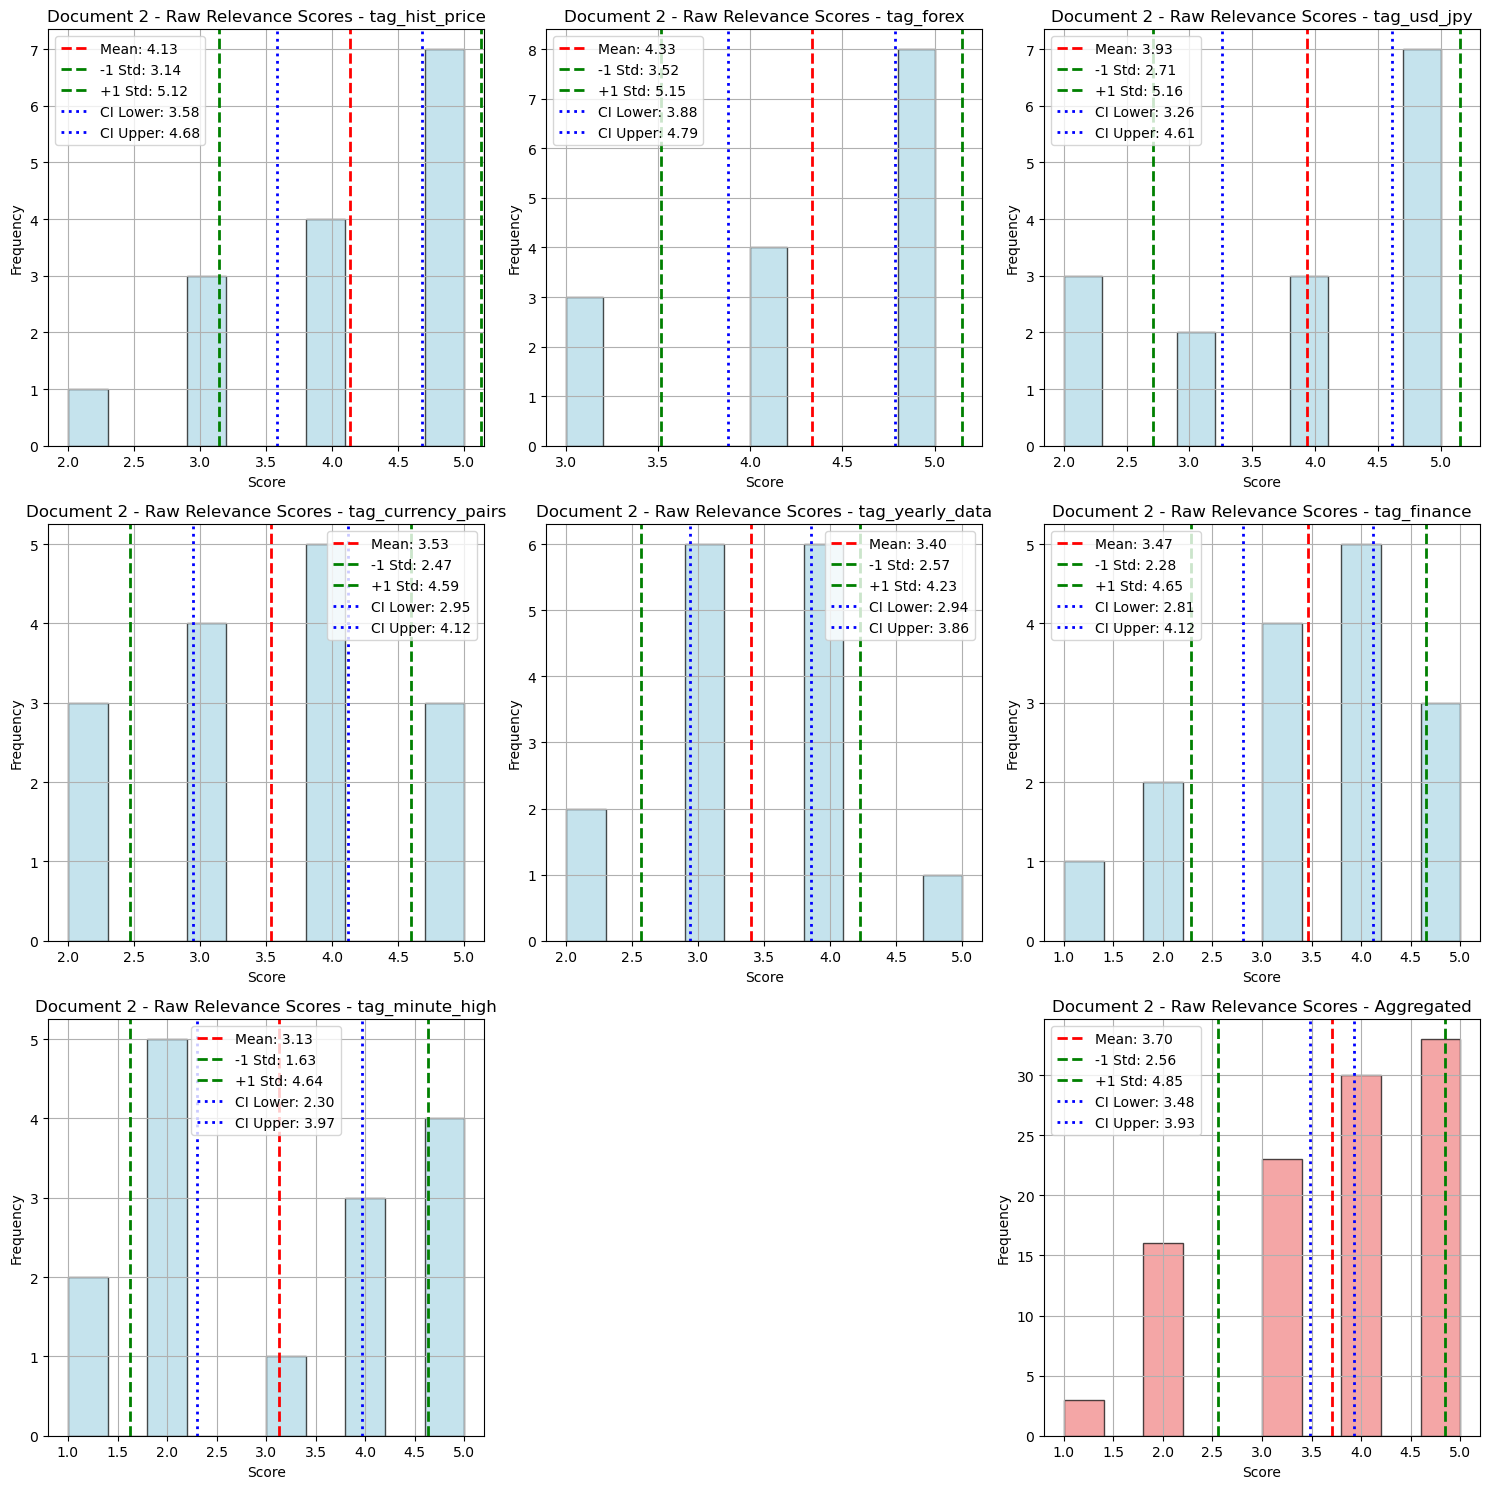

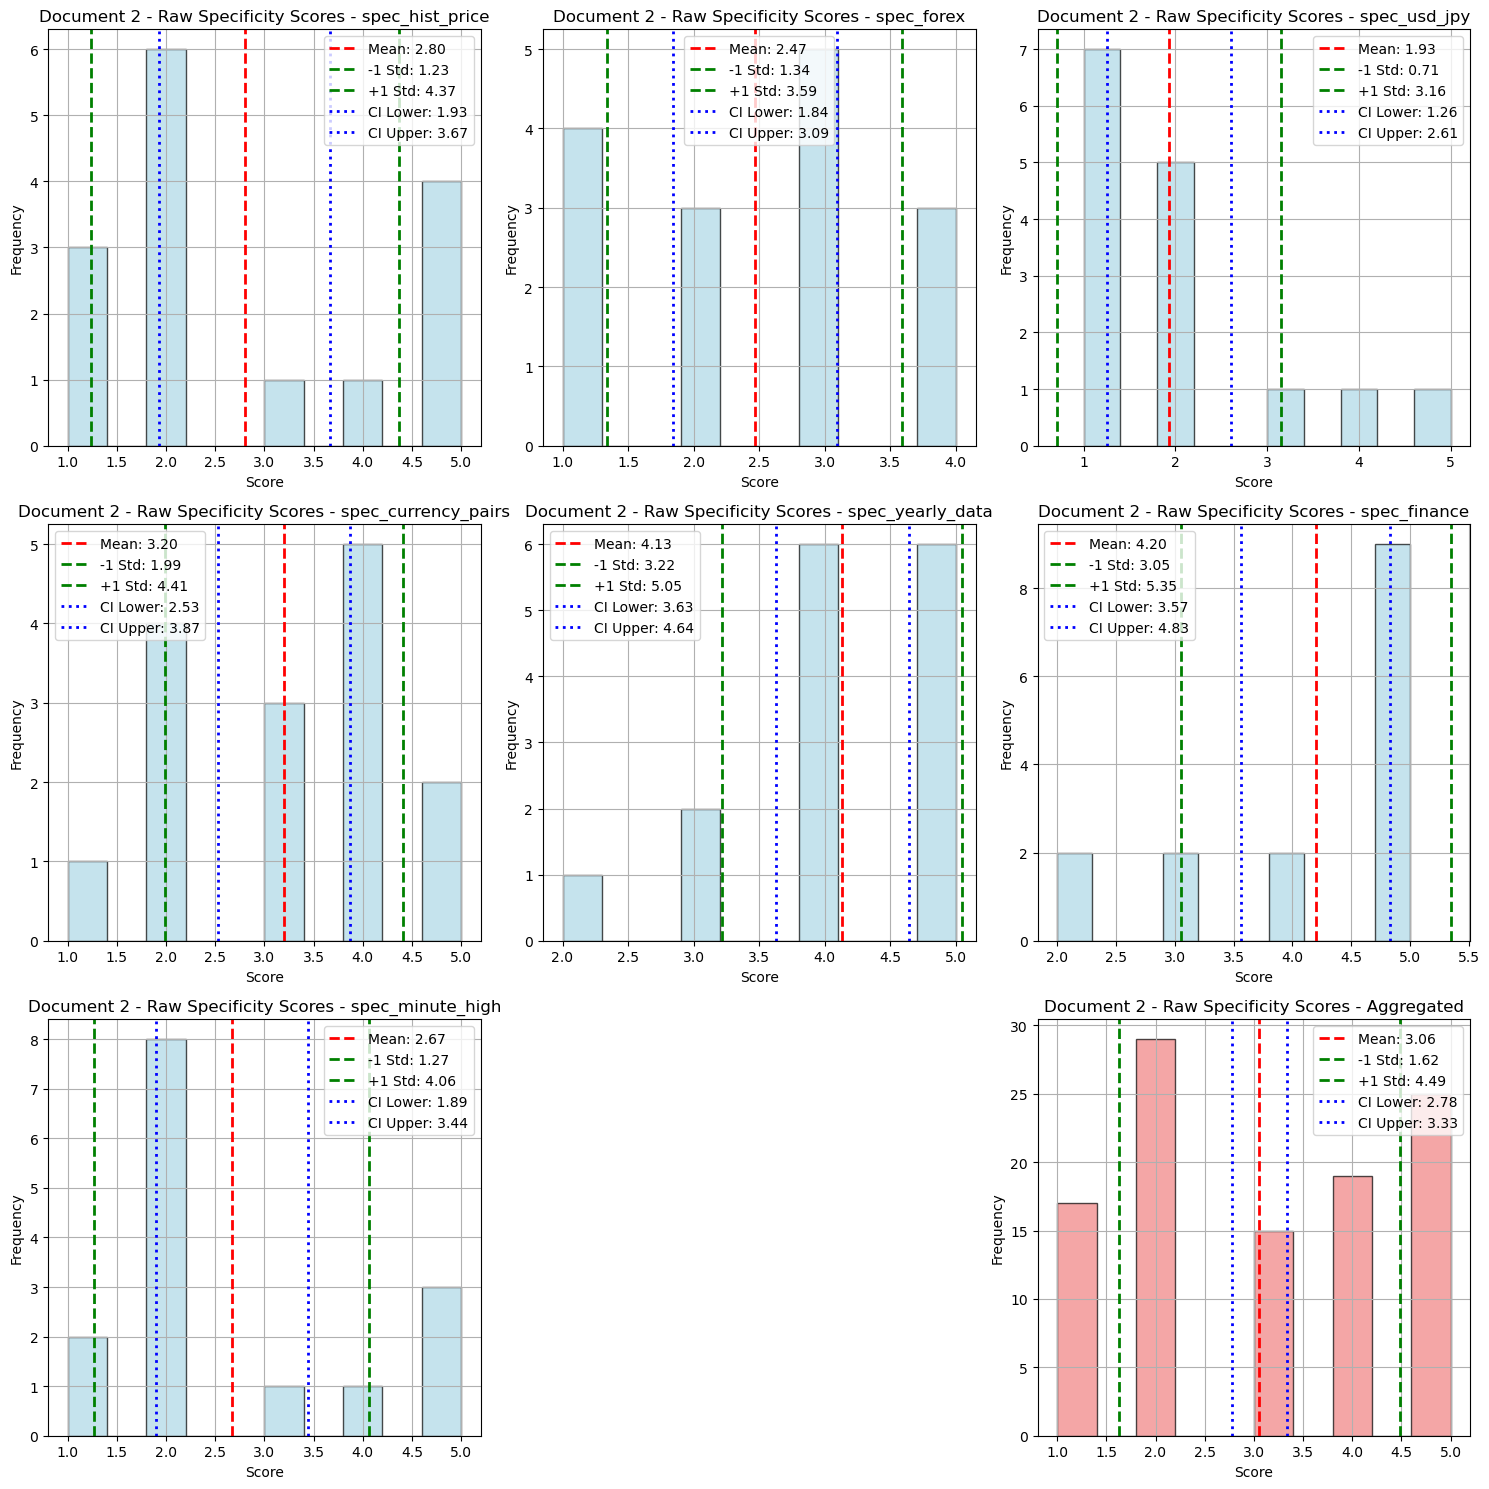

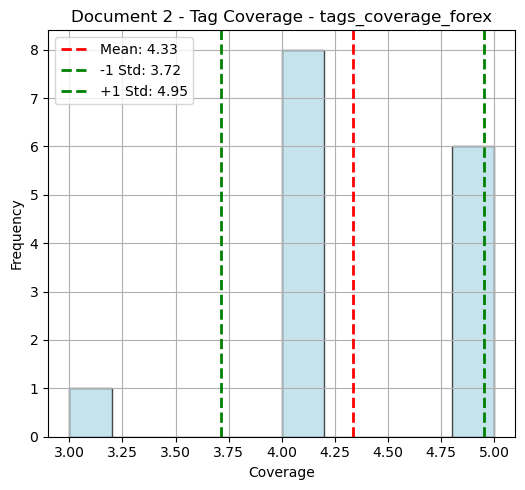

Correlation per Tag:
          Relevance vs Generality  Relevance vs Coverage  \
hist                    -0.375707               0.149509   
forex                    0.143560               0.220436   
usd                     -0.224733               0.235435   
currency                -0.083095               0.316803   
yearly                   0.223926               0.319781   
finance                 -0.158669               0.291996   
minute                   0.026143               0.216140   

          Generality vs Coverage  
hist                   -0.023172  
forex                  -0.268866  
usd                     0.017316  
currency                0.101835  
yearly                  0.194883  
finance                -0.205014  
minute                  0.066922  

Overall Correlations:
         Relevance vs Generality  Relevance vs Coverage  \
Overall                -0.104263                0.28682   

         Generality vs Coverage  
Overall                 0.03032  


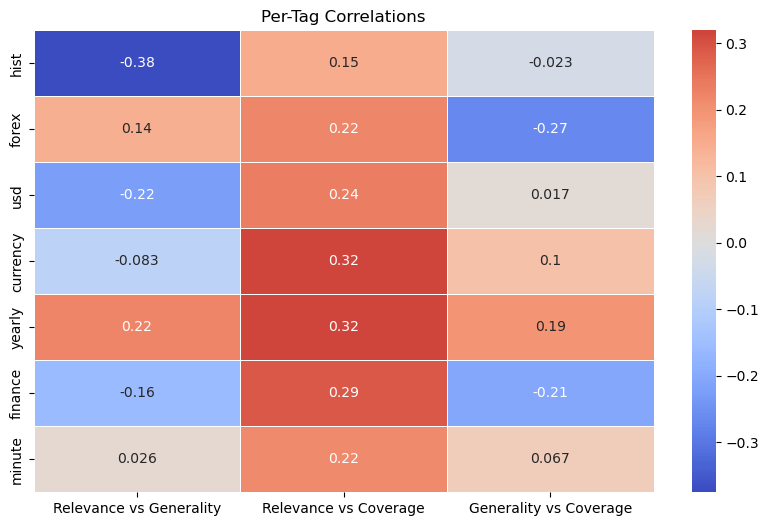

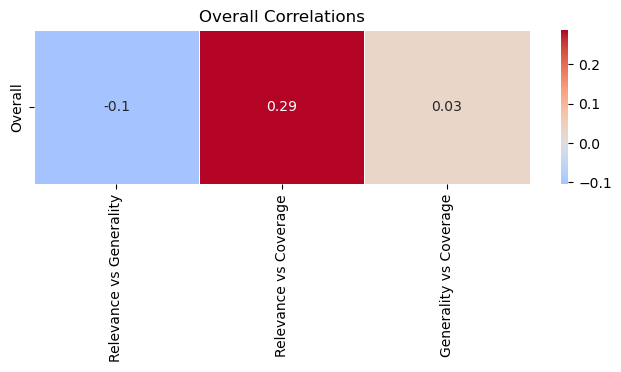


--- Analyzing Document 3 ---
Document 3 Relevance Distribution:
      tag_lung_cancer  tag_cancer  tag_oncology  tag_mrna_prof  tag_biology  \
std          0.632456    0.961150      1.264911       1.099784     0.883715   
min          3.000000    2.000000      1.000000       2.000000     1.000000   
max          5.000000    5.000000      5.000000       5.000000     4.000000   
mean         4.600000    3.933333      3.800000       4.066667     2.733333   

      tag_carcinomas  tag_gene_expr  
std         0.910259        0.92582  
min         2.000000        2.00000  
max         5.000000        5.00000  
mean        3.600000        4.00000  
Document 3 Specificity Distribution:
      spec_lung_cancer  spec_cancer  spec_oncology  spec_mrna_prof  \
std           0.961150     1.334523       1.302013        1.032796   
min           1.000000     1.000000       1.000000        1.000000   
max           4.000000     5.000000       5.000000        4.000000   
mean          1.933333     3.266

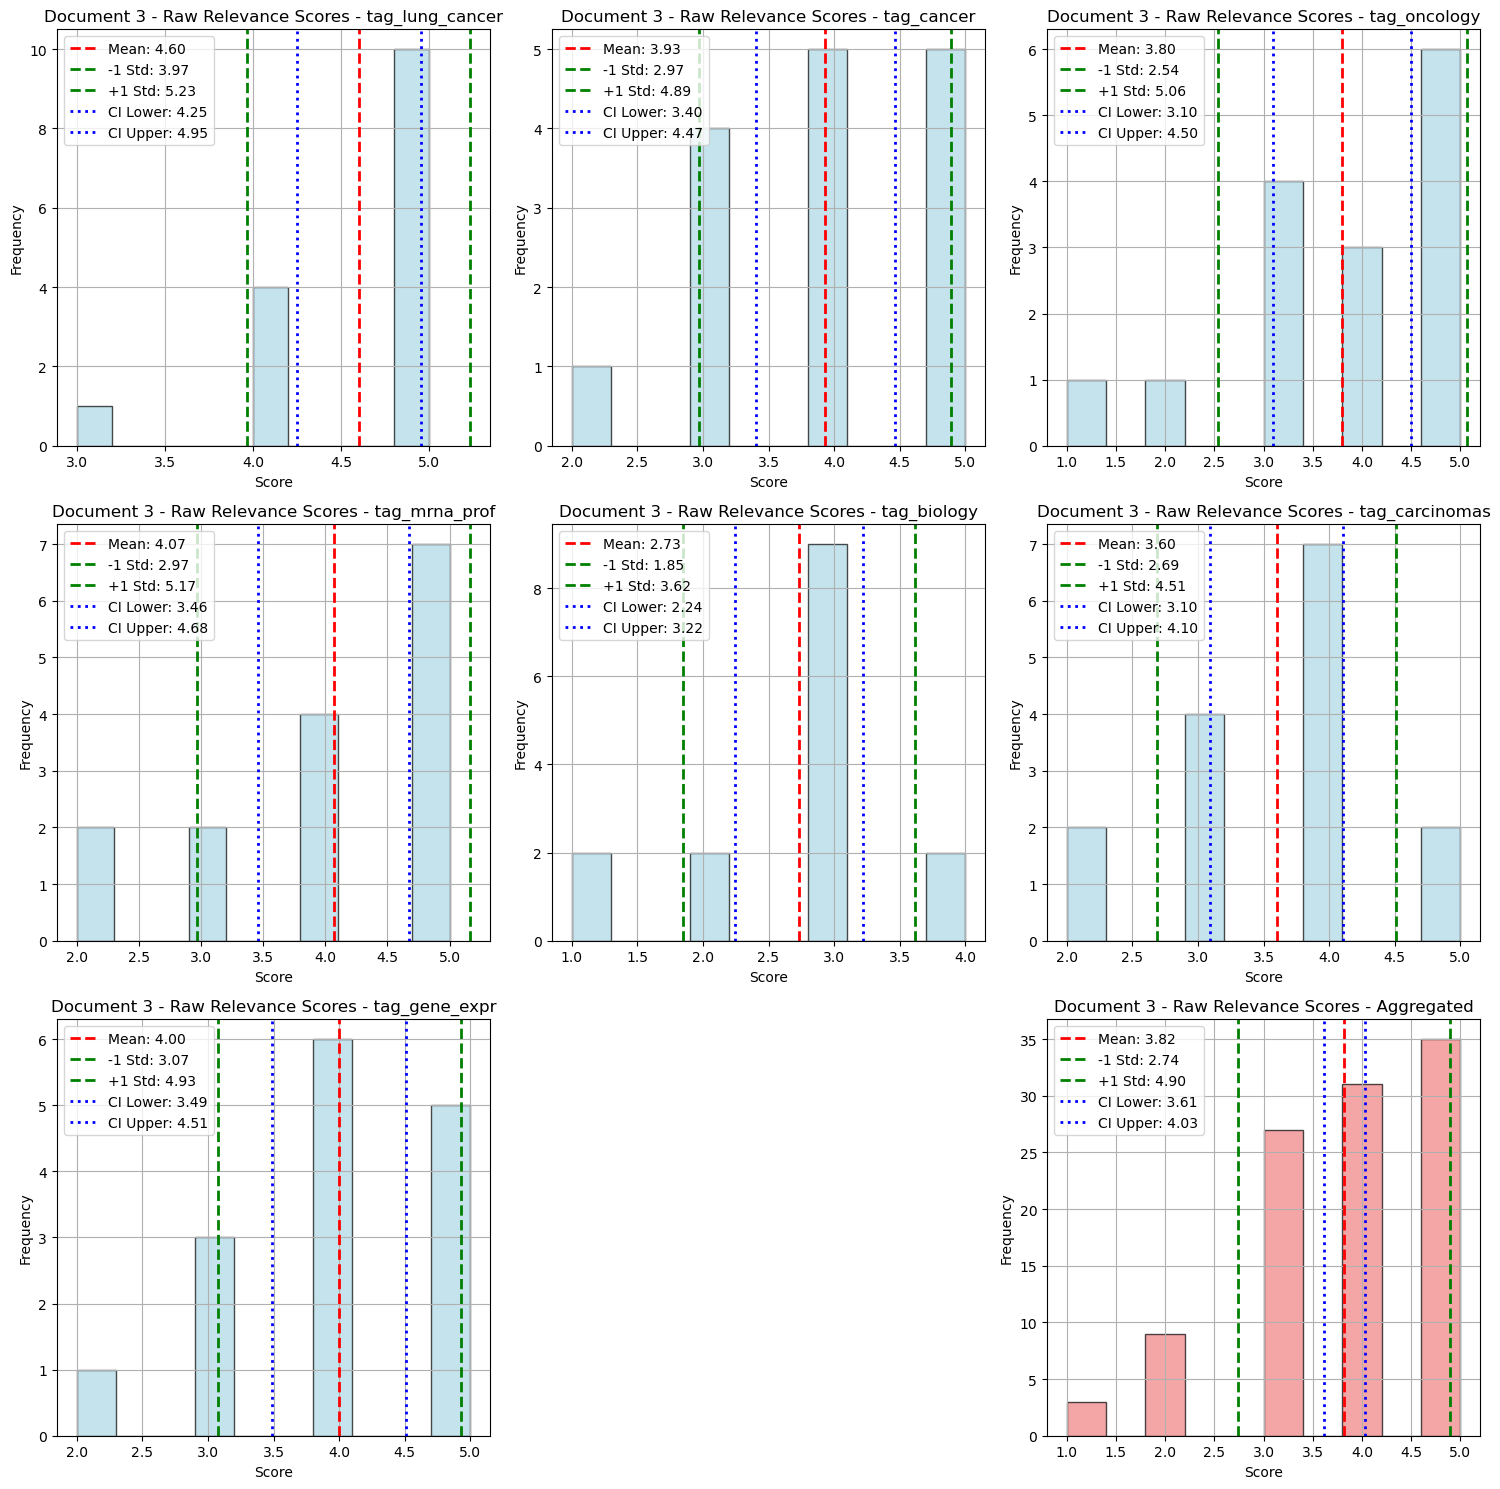

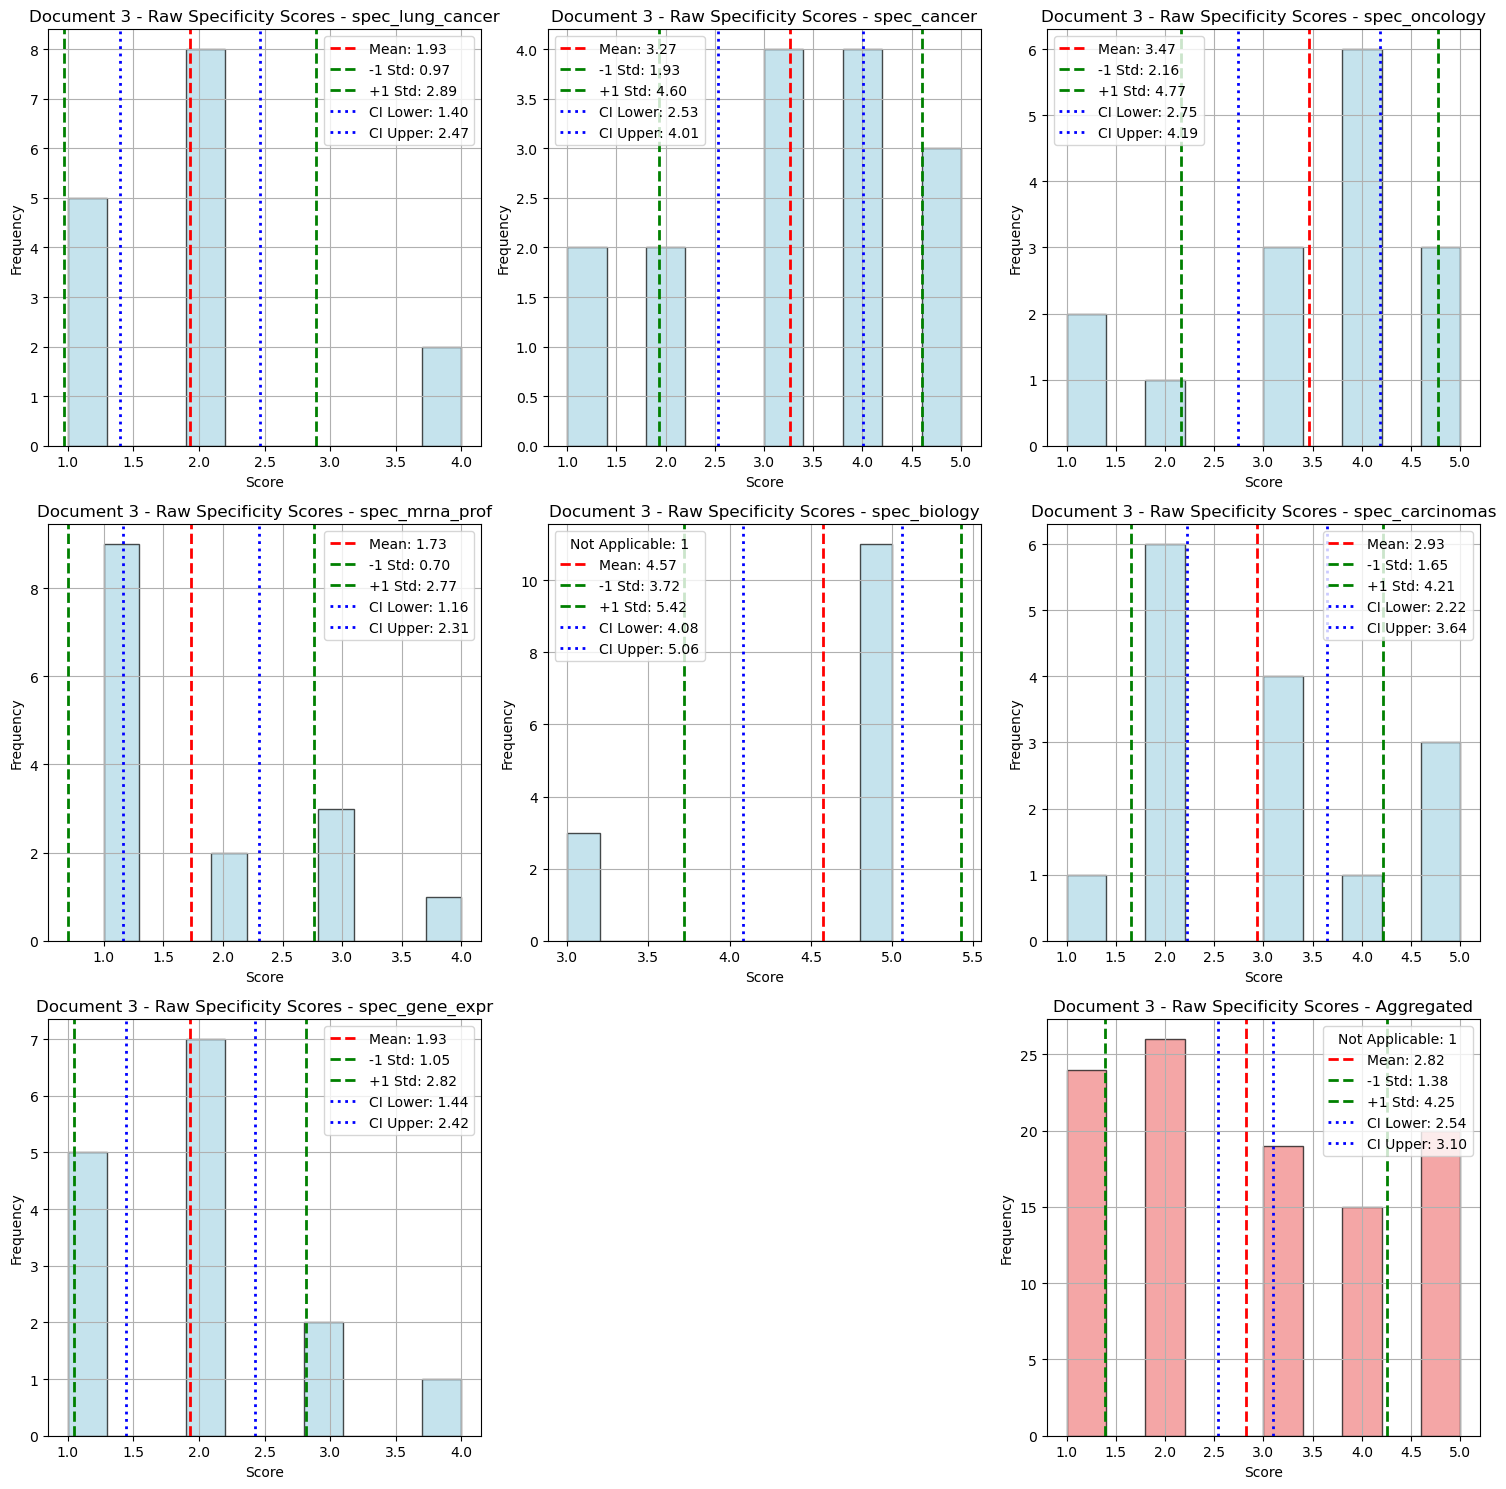

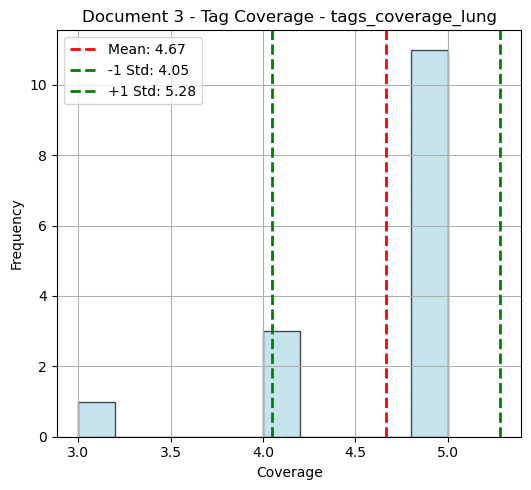

Correlation per Tag:
            Relevance vs Generality  Relevance vs Coverage  \
lung                       0.026282               0.205746   
cancer                    -0.164795               0.009663   
oncology                   0.193771              -0.033787   
mrna                      -0.582548               0.164787   
biology                    0.277628              -0.284457   
carcinomas                -0.657147               0.137732   
gene                      -0.500084              -0.302227   

            Generality vs Coverage  
lung                     -0.176471  
cancer                   -0.040134  
oncology                 -0.148901  
mrna                      0.177867  
biology                  -0.270973  
carcinomas               -0.132734  
gene                     -0.096810  

Overall Correlations:
         Relevance vs Generality  Relevance vs Coverage  \
Overall                -0.035971              -0.076418   

         Generality vs Coverage  
Overall   

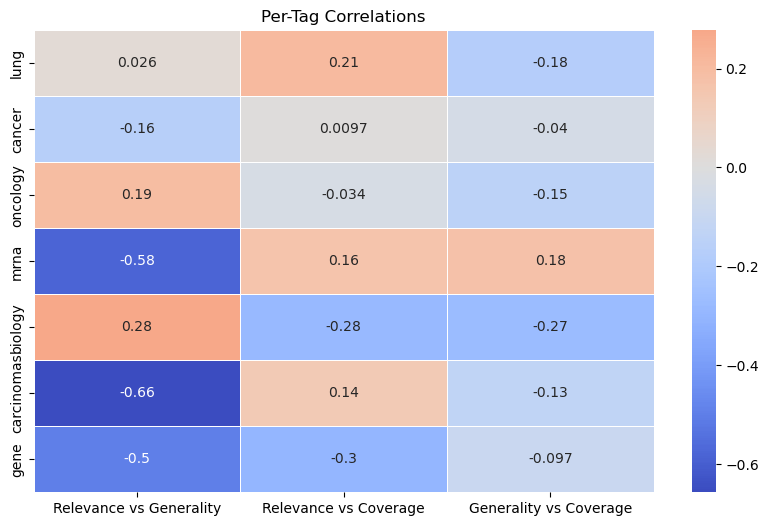

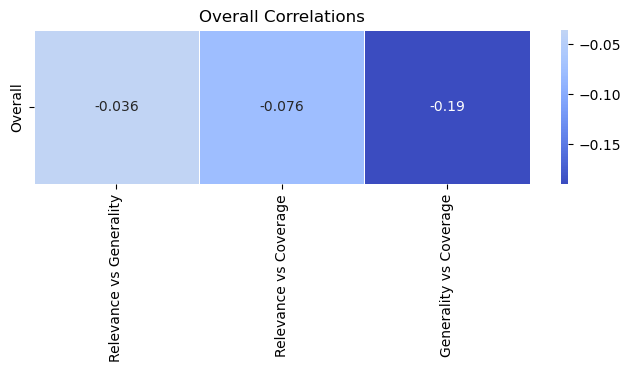

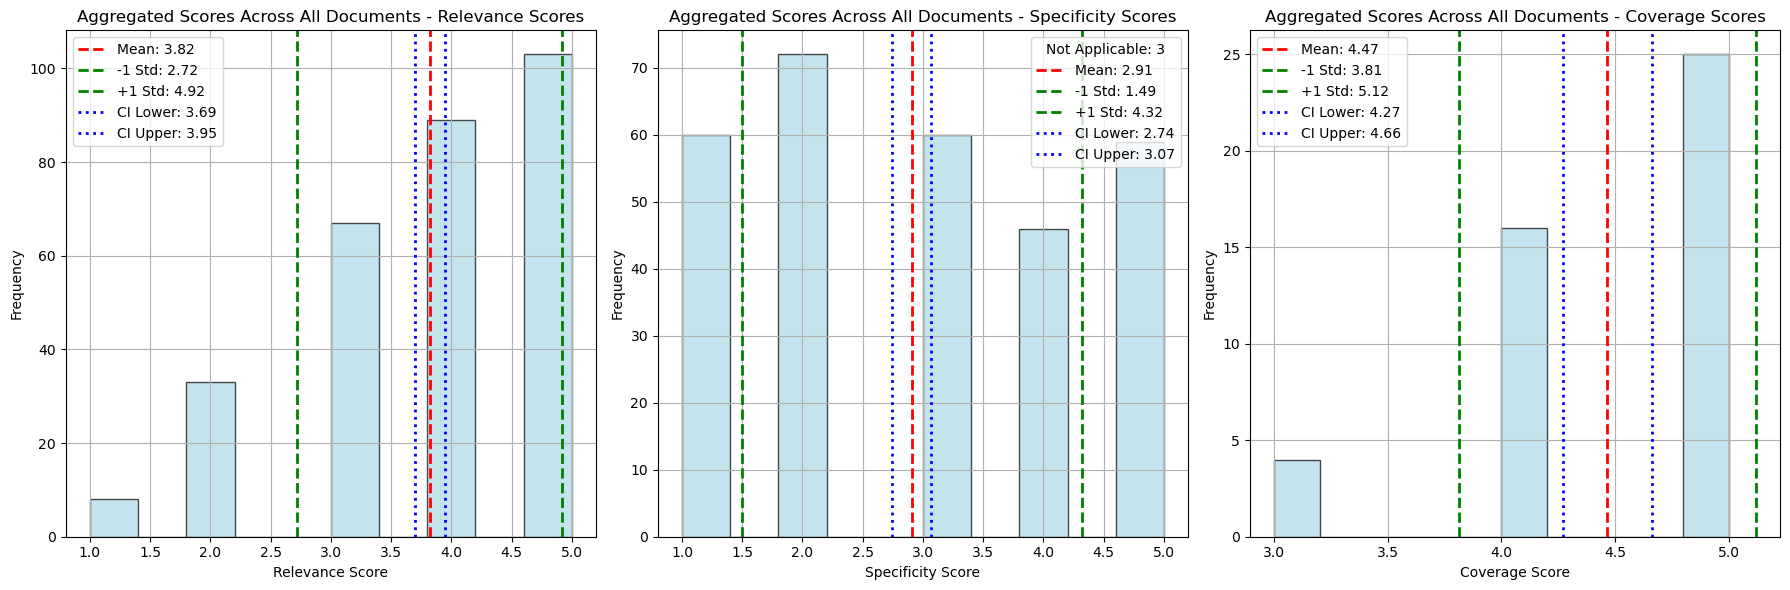

ICC for Relevance:


Type              Description       ICC         F  df1  df2          pval  \
0   ICC1   Single raters absolute  0.135474  3.350546   19  280  5.438522e-06   
1   ICC2     Single random raters  0.162329  7.550512   19  266  2.355528e-16   
2   ICC3      Single fixed raters  0.303961  7.550512   19  266  2.355528e-16   
3  ICC1k  Average raters absolute  0.701541  3.350546   19  280  5.438522e-06   
4  ICC2k    Average random raters  0.744036  7.550512   19  266  2.355528e-16   
5  ICC3k     Average fixed raters  0.867559  7.550512   19  266  2.355528e-16   

          CI95%  
0  [0.06, 0.29]  
1  [0.08, 0.32]  
2  [0.18, 0.51]  
3  [0.47, 0.86]  
4  [0.55, 0.88]  
5  [0.76, 0.94]


ICC for Generality:


Type              Description       ICC          F  df1  df2  \
0   ICC1   Single raters absolute  0.324743   8.213771   16  238   
1   ICC2     Single random raters  0.335653  12.930940   16  224   
2   ICC3      Single fixed raters  0.443020  12.930940   16  224   
3  ICC1k  Average raters absolute  0.878253   8.213771   16  238   
4  ICC2k    Average random raters  0.883430  12.930940   16  224   
5  ICC3k     Average fixed raters  0.922666  12.930940   16  224   

           pval         CI95%  
0  1.287637e-15  [0.19, 0.55]  
1  5.320657e-24  [0.19, 0.56]  
2  5.320657e-24  [0.28, 0.66]  
3  1.287637e-15  [0.77, 0.95]  
4  5.320657e-24  [0.78, 0.95]  
5  5.320657e-24  [0.86, 0.97]


ICC for Coverage:


Type              Description       ICC         F  df1  df2      pval  \
0   ICC1   Single raters absolute  0.004843  1.072993    2   42  0.351172   
1   ICC2     Single random raters  0.035211  2.041667    2   28  0.148696   
2   ICC3      Single fixed raters  0.064935  2.041667    2   28  0.148696   
3  ICC1k  Average raters absolute  0.068027  1.072993    2   42  0.351172   
4  ICC2k    Average random raters  0.353774  2.041667    2   28  0.148696   
5  ICC3k     Average fixed raters  0.510204  2.041667    2   28  0.148696   

           CI95%  
0  [-0.05, 0.73]  
1  [-0.02, 0.74]  
2  [-0.04, 0.84]  
3  [-2.76, 0.98]  
4  [-0.35, 0.98]  
5  [-1.07, 0.99]


ICC for Shared Coverage:


Type              Description       ICC         F  df1  df2      pval  \
0   ICC1   Single raters absolute  0.135945  3.360000    1   28  0.077451   
1   ICC2     Single random raters  0.147727  4.421053    1   14  0.054069   
2   ICC3      Single fixed raters  0.185714  4.421053    1   14  0.054069   
3  ICC1k  Average raters absolute  0.702381  3.360000    1   28  0.077451   
4  ICC2k    Average random raters  0.722222  4.421053    1   14  0.054069   
5  ICC3k     Average fixed raters  0.773810  4.421053    1   14  0.054069   

          CI95%  
0  [-0.03, 1.0]  
1  [-0.01, 1.0]  
2  [-0.02, 1.0]  
3  [-0.67, 1.0]  
4  [-0.19, 1.0]  
5  [-0.42, 1.0]


Fleiss' Kappa for Relevance: 0.0306
Fleiss' Kappa for Generality: 0.1005
Fleiss' Kappa for Coverage: 0.0027
Fleiss' Kappa for Shared Coverage: -0.0119


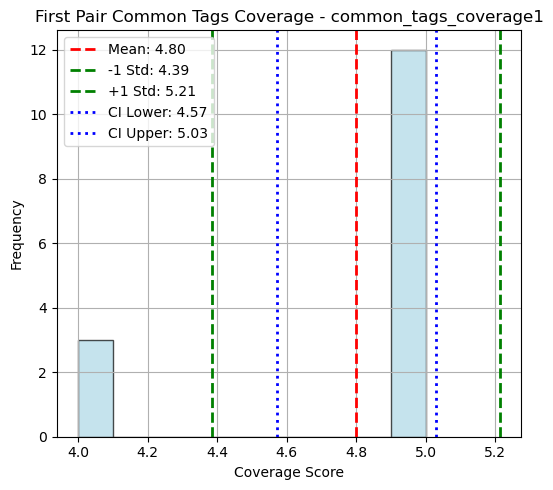

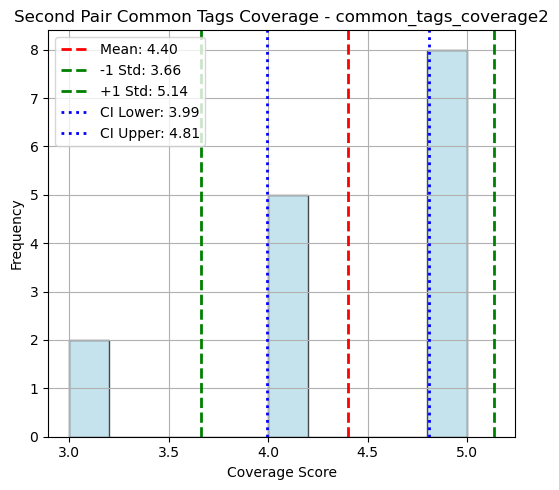


Metrics for First Pair Common Tags:
Accuracy: 0.83
Precision: 0.85
Recall: 0.73
F1-Score: 0.79

Metrics for Second Pair Common Tags:
Accuracy: 0.85
Precision: 0.69
Recall: 0.82
F1-Score: 0.75


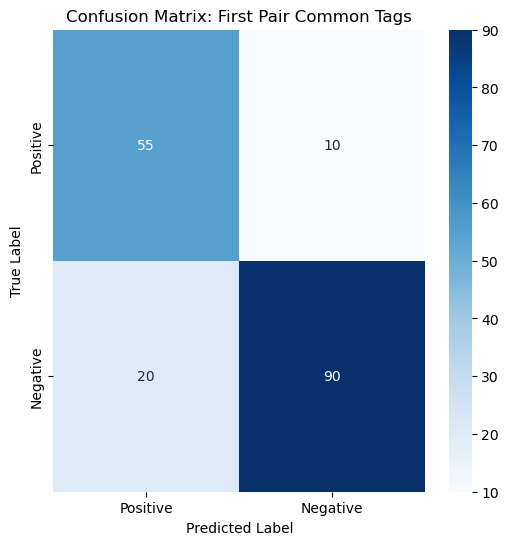

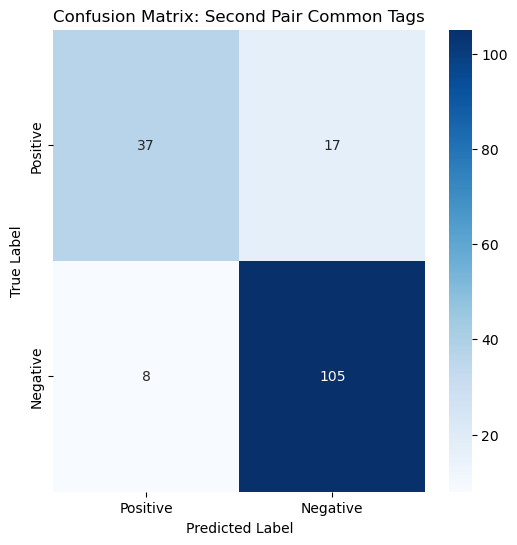

In [23]:
analyze_tags(
    df_human_generated,
    relevance_columns_list=[
        human_first_document_relevance_columns, 
        human_second_document_relevance_columns,
        human_third_document_relevance_columns
    ],
    spec_columns_list=[
        human_first_document_spec_columns, 
        human_second_document_spec_columns,
        human_third_document_spec_columns
    ],
    coverage_columns_list=[
        human_first_document_coverage_columns, 
        human_second_document_coverage_columns,
        human_third_document_coverage_columns
    ],
    suggested_columns_list=[
        human_first_document_suggested_columns,
        human_second_document_suggested_columns,
        human_third_document_suggested_columns
    ],
    common_tags_columns_1=human_first_pair_common_tags_columns,
    common_tags_true_tags_1=human_first_pair_common_tags_true_tags,
    common_tags_coverage_1=human_first_pair_coverage_columns,
    common_tags_columns_2=human_second_pair_common_tags_columns,
    common_tags_true_tags_2=human_second_pair_common_tags_true_tags,
    common_tags_coverage_2=human_second_pair_coverage_columns
)

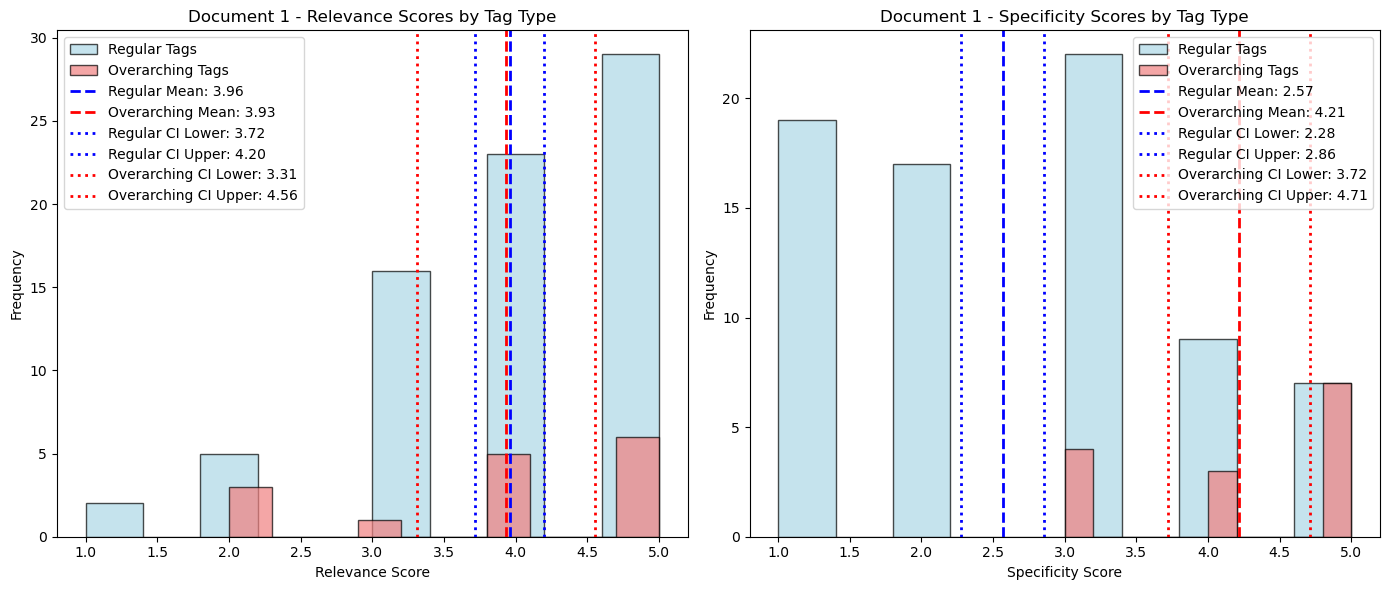

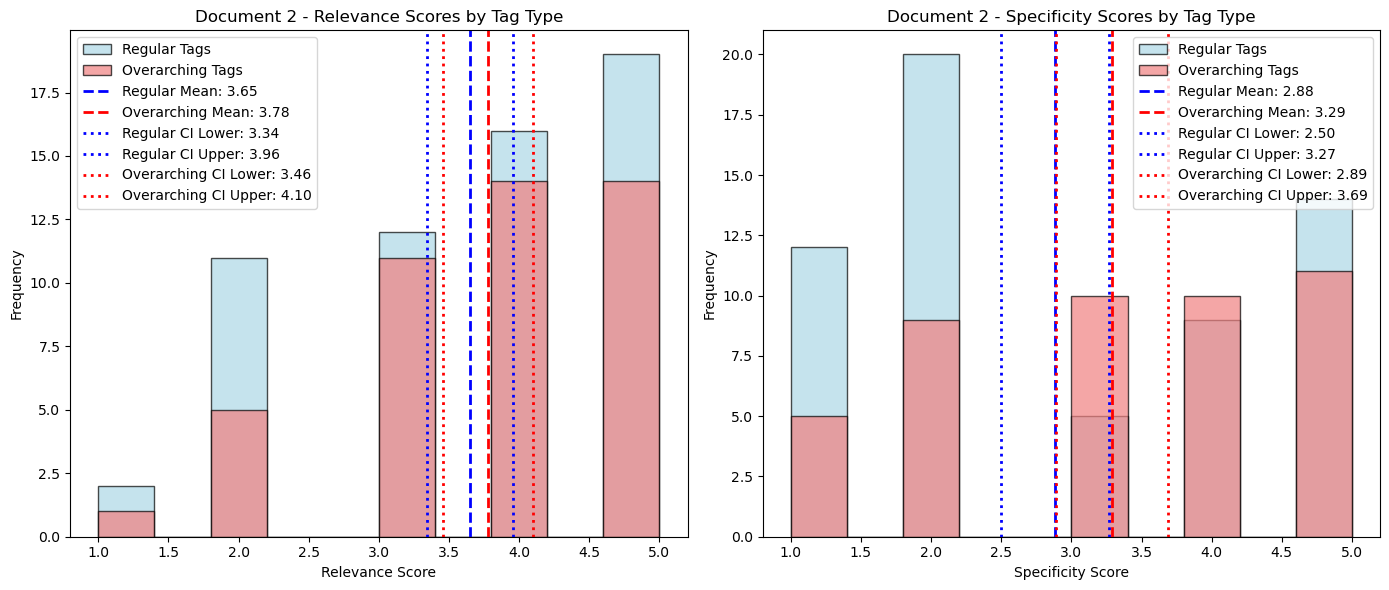

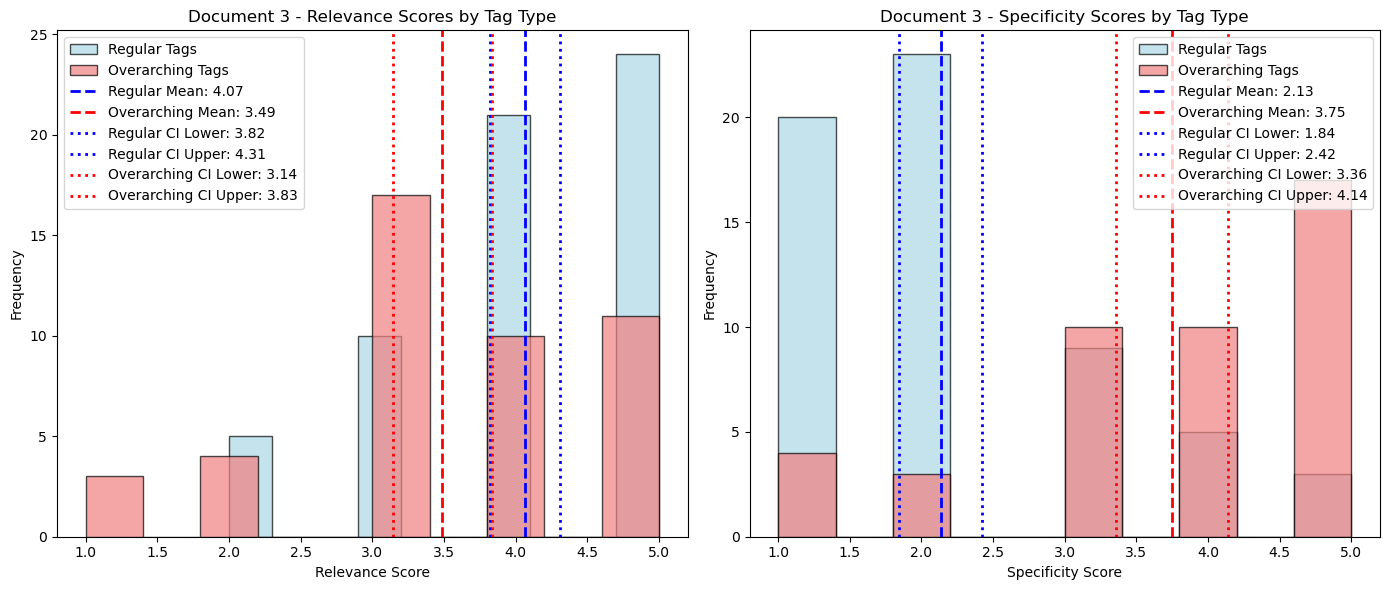

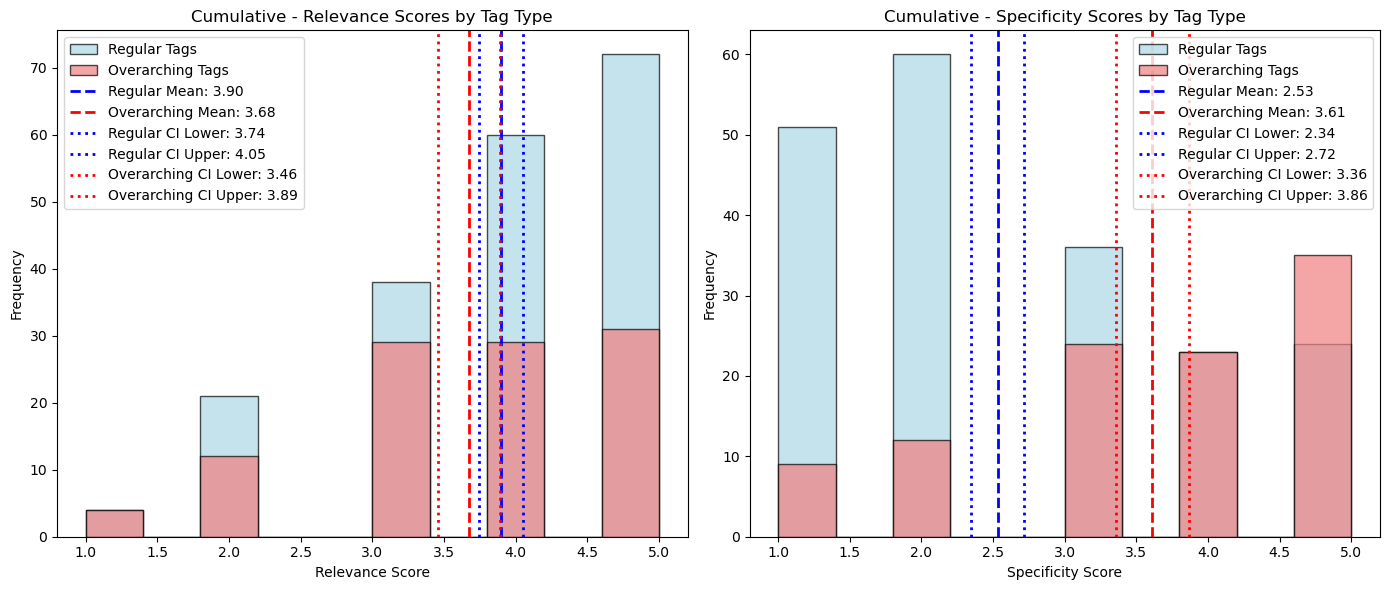

In [24]:
# Define document-specific relevance columns, specificity columns, tag types, and document names
doc_relevance_columns_list = [
    human_first_document_relevance_columns,
    human_second_document_relevance_columns,
    human_third_document_relevance_columns
]

doc_spec_columns_list = [
    human_first_document_spec_columns,
    human_second_document_spec_columns,
    human_third_document_spec_columns
]

doc_tag_types_list = [
    human_first_document_tag_types,
    human_second_document_tag_types,
    human_third_document_tag_types
]

document_names = ['Document 1', 'Document 2', 'Document 3']

# Call the function for all documents and cumulative results
plot_relevance_specificity_multiple_documents(df_human_generated, 
                                              doc_relevance_columns_list, 
                                              doc_spec_columns_list, 
                                              doc_tag_types_list, 
                                              document_names)

In [25]:
df_model_generated.columns

Index(['timestamp', 'age_range', 'gender', 'education', 'english_prof',
       'lol_game_desc', 'tag_ranked_matches', 'tag_games',
       'tag_league_of_legends', 'tag_game_data_analysis', 'tag_computer_games',
       'tag_gaming', 'tag_esports', 'spec_ranked_matches', 'spec_games',
       'spec_league_of_legends', 'spec_game_data_analysis',
       'spec_computer_games', 'spec_gaming', 'spec_esports',
       'tags_coverage_lol', 'suggested_tags_lol', 'forex_desc',
       'tag_historical_price_data', 'tag_minute_interval',
       'tag_historical_data', 'tag_forex', 'tag_candlestick', 'tag_minute',
       'tag_high', 'spec_historical_price_data', 'spec_minute_interval',
       'spec_historical_data', 'spec_forex', 'spec_candlestick', 'spec_minute',
       'spec_high', 'tags_coverage_forex', 'suggested_tags_forex',
       'lung_cancer_desc', 'tag_lung_cancer', 'tag_cancer', 'tag_science',
       'tag_cancer_research', 'tag_biology', 'tag_medicine', 'tag_health',
       'spec_lung_cancer',

In [26]:
model_first_document_relevance_columns = ['tag_ranked_matches', 'tag_games', 'tag_league_of_legends', 'tag_game_data_analysis', 'tag_computer_games', 'tag_gaming', 'tag_esports']
model_first_document_spec_columns = ['spec_ranked_matches', 'spec_games', 'spec_league_of_legends', 'spec_game_data_analysis', 'spec_computer_games', 'spec_gaming', 'spec_esports']
model_first_document_coverage_columns = ['tags_coverage_lol']
model_first_document_suggested_columns = ['suggested_tags_lol']
model_first_document_tag_types = {
    'overarching': ['tag_games', 'tag_computer_games', 'tag_gaming', 'tag_esports'],
    'regular': ['tag_ranked_matches', 'tag_league_of_legends', 'tag_game_data_analysis']
}

model_second_document_relevance_columns = ['tag_historical_price_data', 'tag_minute_interval', 'tag_historical_data', 'tag_forex', 'tag_candlestick', 'tag_minute', 'tag_high']
model_second_document_spec_columns = ['spec_historical_price_data', 'spec_minute_interval', 'spec_historical_data', 'spec_forex', 'spec_candlestick', 'spec_minute', 'spec_high']
model_second_document_coverage_columns = ['tags_coverage_forex']
model_second_document_suggested_columns = ['suggested_tags_forex']
model_second_document_tag_types = {
    'regular': ['tag_historical_price_data', 'tag_minute_interval', 'tag_historical_data', 'tag_forex', 'tag_candlestick', 'tag_minute', 'tag_high'],
    'overarching': []
}

model_third_document_relevance_columns = ['tag_lung_cancer', 'tag_cancer', 'tag_science', 'tag_cancer_research', 'tag_biology', 'tag_medicine', 'tag_health']
model_third_document_spec_columns = ['spec_lung_cancer', 'spec_cancer', 'spec_science', 'spec_cancer_research', 'spec_biology', 'spec_medicine', 'spec_health']
model_third_document_coverage_columns = ['tags_coverage_lung']
model_third_document_suggested_columns = ['suggested_tags_lung']
model_third_document_tag_types = {
    'overarching': ['tag_cancer', 'tag_science', 'tag_cancer_research', 'tag_biology', 'tag_medicine', 'tag_health'],
    'regular': ['tag_lung_cancer']
}

model_first_pair_common_tags_columns = ['common_tags1']
model_first_pair_common_tags_true_tags = ["Coronavirus", "Covid-19", "Health", "Public Health", "Epidemiology"]
model_first_pair_coverage = ['common_tags_coverage1']

model_second_pair_common_tags_columns = ['common_tags2']
model_second_pair_common_tags_true_tags = ["Movies", "Film", "Media", "Entertainment"]
model_second_pair_coverage_columns = ['common_tags_coverage2']


--- Analyzing Document 1 ---
Document 1 Relevance Distribution:
      tag_ranked_matches  tag_games  tag_league_of_legends  \
std             0.743223   0.632456               0.593617   
min             3.000000   2.000000               3.000000   
max             5.000000   4.000000               5.000000   
mean            4.133333   3.400000               4.733333   

      tag_game_data_analysis  tag_computer_games  tag_gaming  tag_esports  
std                 0.845154            0.816497    0.833809     1.302013  
min                 2.000000            2.000000    2.000000     1.000000  
max                 5.000000            5.000000    5.000000     5.000000  
mean                4.000000            3.666667    3.533333     3.133333  
Document 1 Specificity Distribution:
      spec_ranked_matches  spec_games  spec_league_of_legends  \
std              0.534522    0.798809                0.516398   
min              1.000000    3.000000                1.000000   
max         

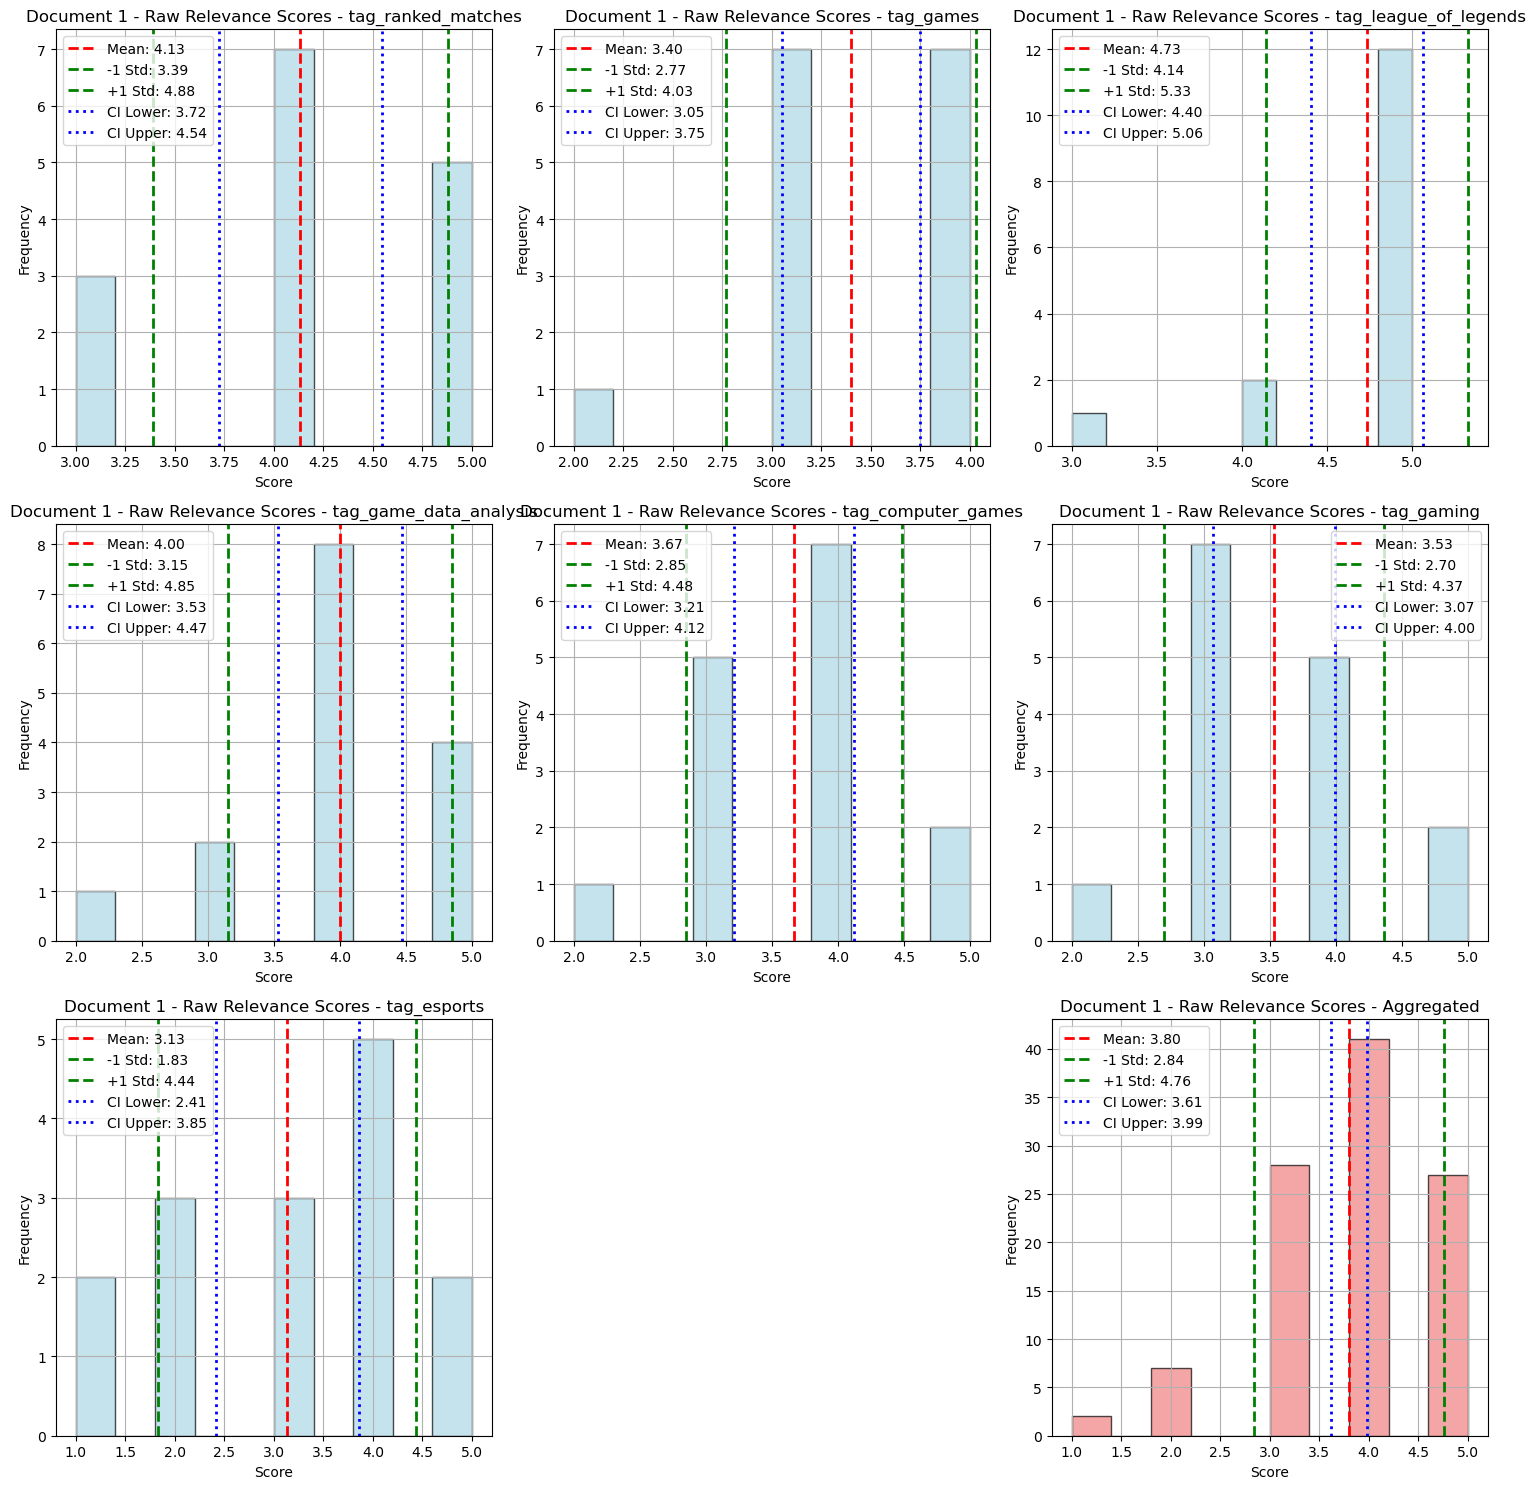

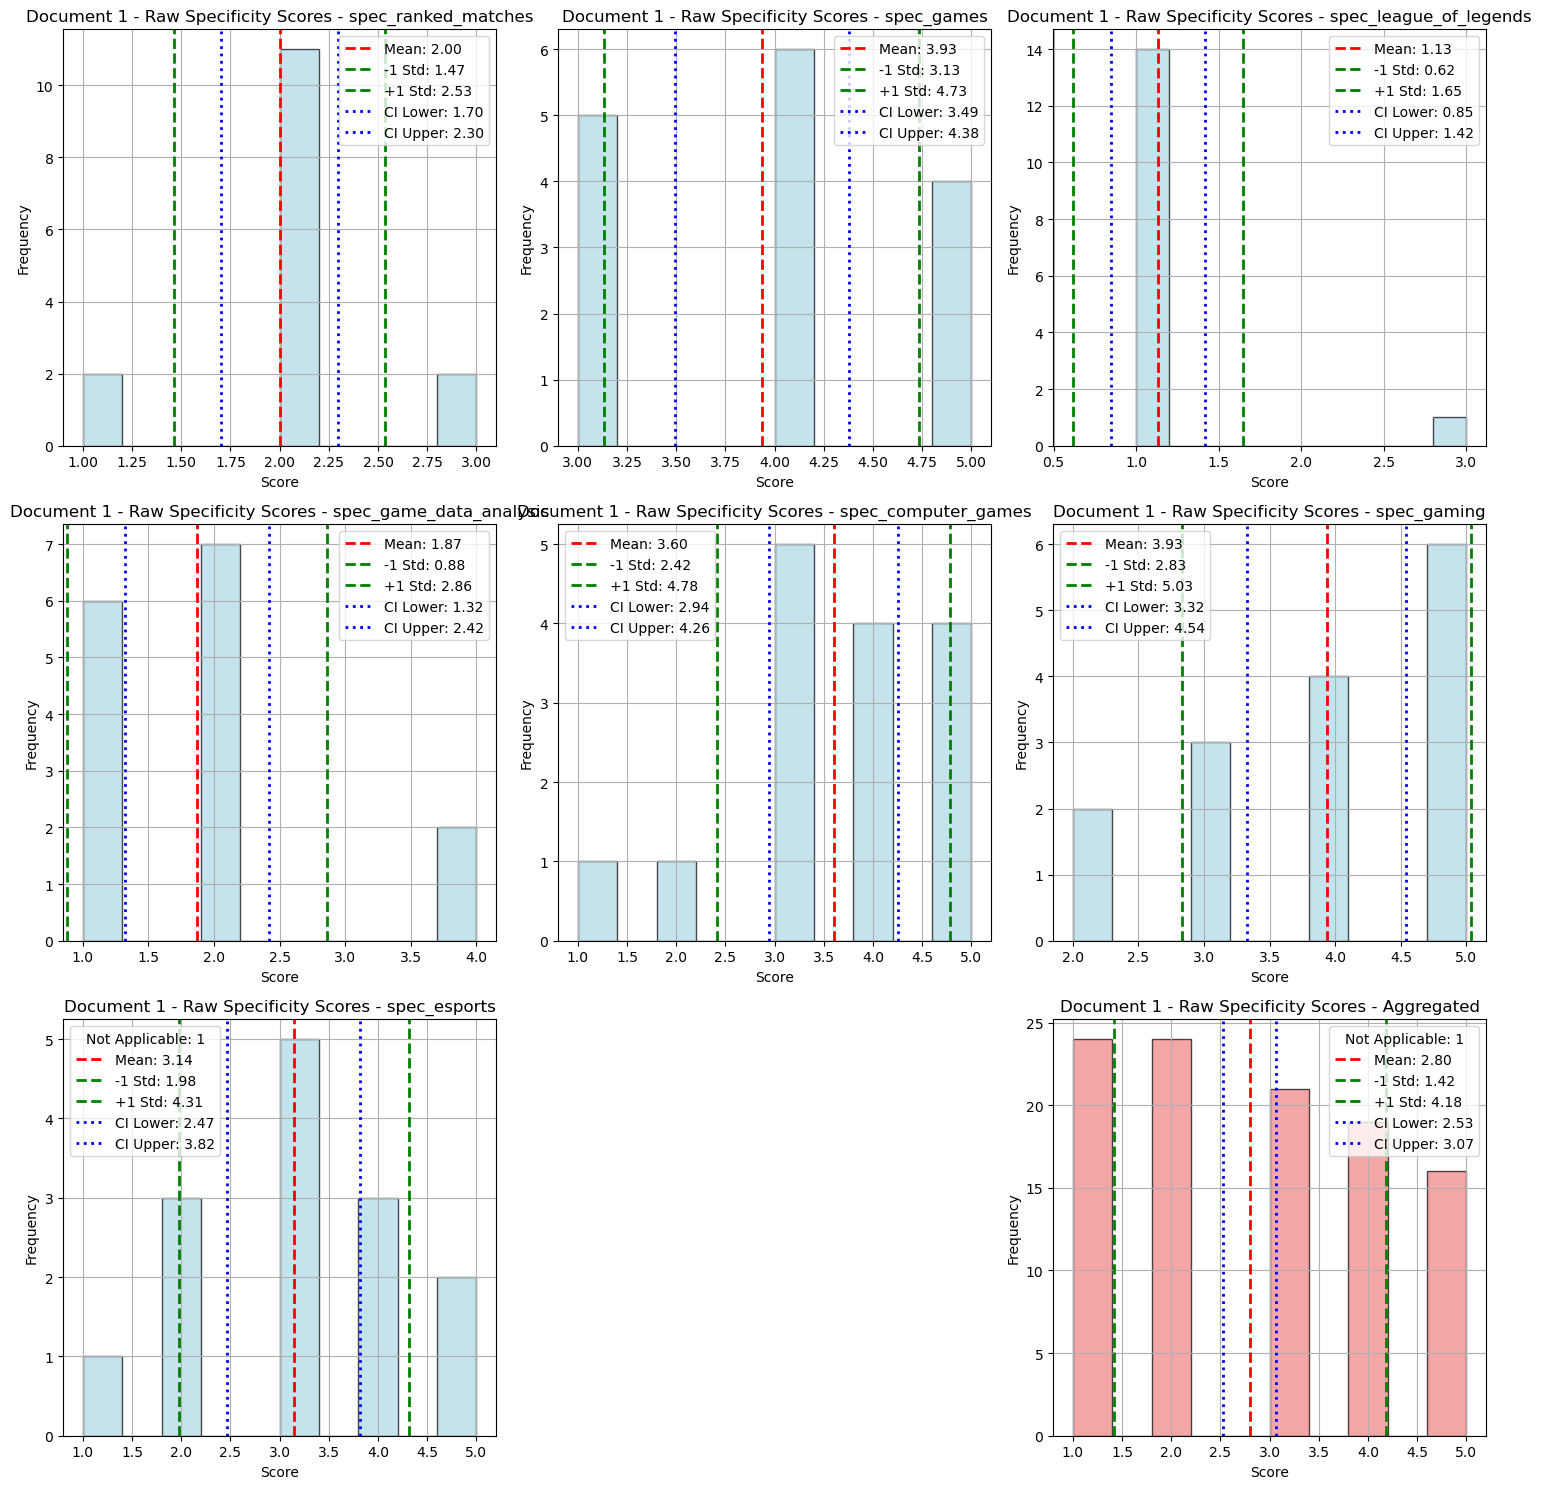

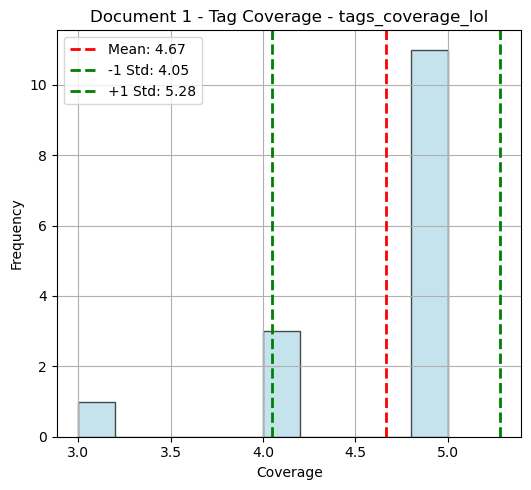

Correlation per Tag:
          Relevance vs Generality  Relevance vs Coverage  \
ranked                  -0.387298               0.323708   
games                    0.065829              -0.113408   
league                   0.132894               0.026414   
game                    -0.446948              -0.179623   
computer                -0.155639               0.282984   
gaming                  -0.372746               0.377312   
esports                 -0.687793               0.210903   

          Generality vs Coverage  
ranked                 -0.347183  
games                   0.304053  
league                 -0.559017  
game                   -0.436268  
computer               -0.119619  
gaming                  0.007247  
esports                 0.245460  

Overall Correlations:
         Relevance vs Generality  Relevance vs Coverage  \
Overall                -0.174705               0.277324   

         Generality vs Coverage  
Overall               -0.162687  


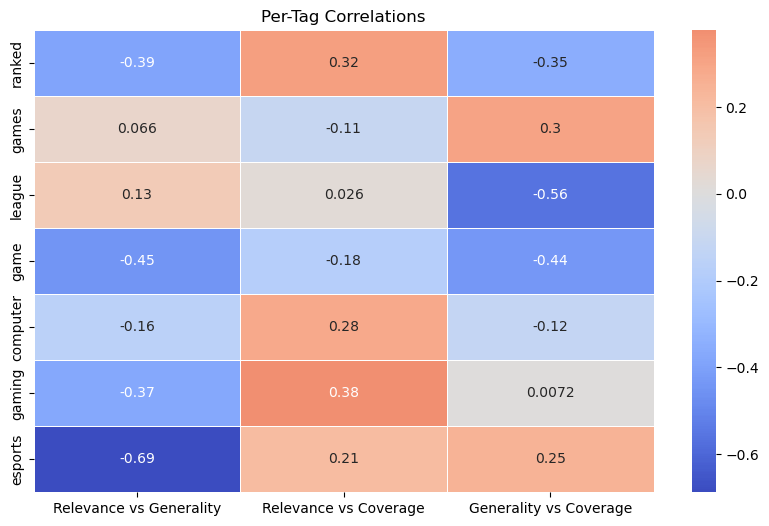

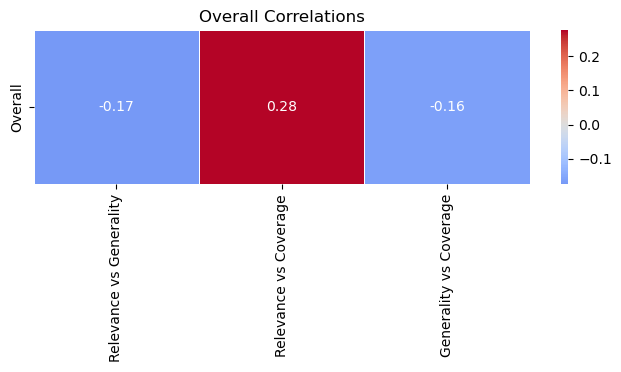


--- Analyzing Document 2 ---
Document 2 Relevance Distribution:
      tag_historical_price_data  tag_minute_interval  tag_historical_data  \
std                    0.593617             1.069045             0.910259   
min                    3.000000             2.000000             1.000000   
max                    5.000000             5.000000             5.000000   
mean                   4.266667             4.000000             3.400000   

      tag_forex  tag_candlestick  tag_minute  tag_high  
std    0.816497         1.187234    1.207122  1.245946  
min    3.000000         1.000000    1.000000  1.000000  
max    5.000000         5.000000    4.000000  4.000000  
mean   4.333333         3.533333    2.800000  2.466667  
Document 2 Specificity Distribution:
      spec_historical_price_data  spec_minute_interval  spec_historical_data  \
std                     0.676123              0.845154              1.050902   
min                     1.000000              1.000000             

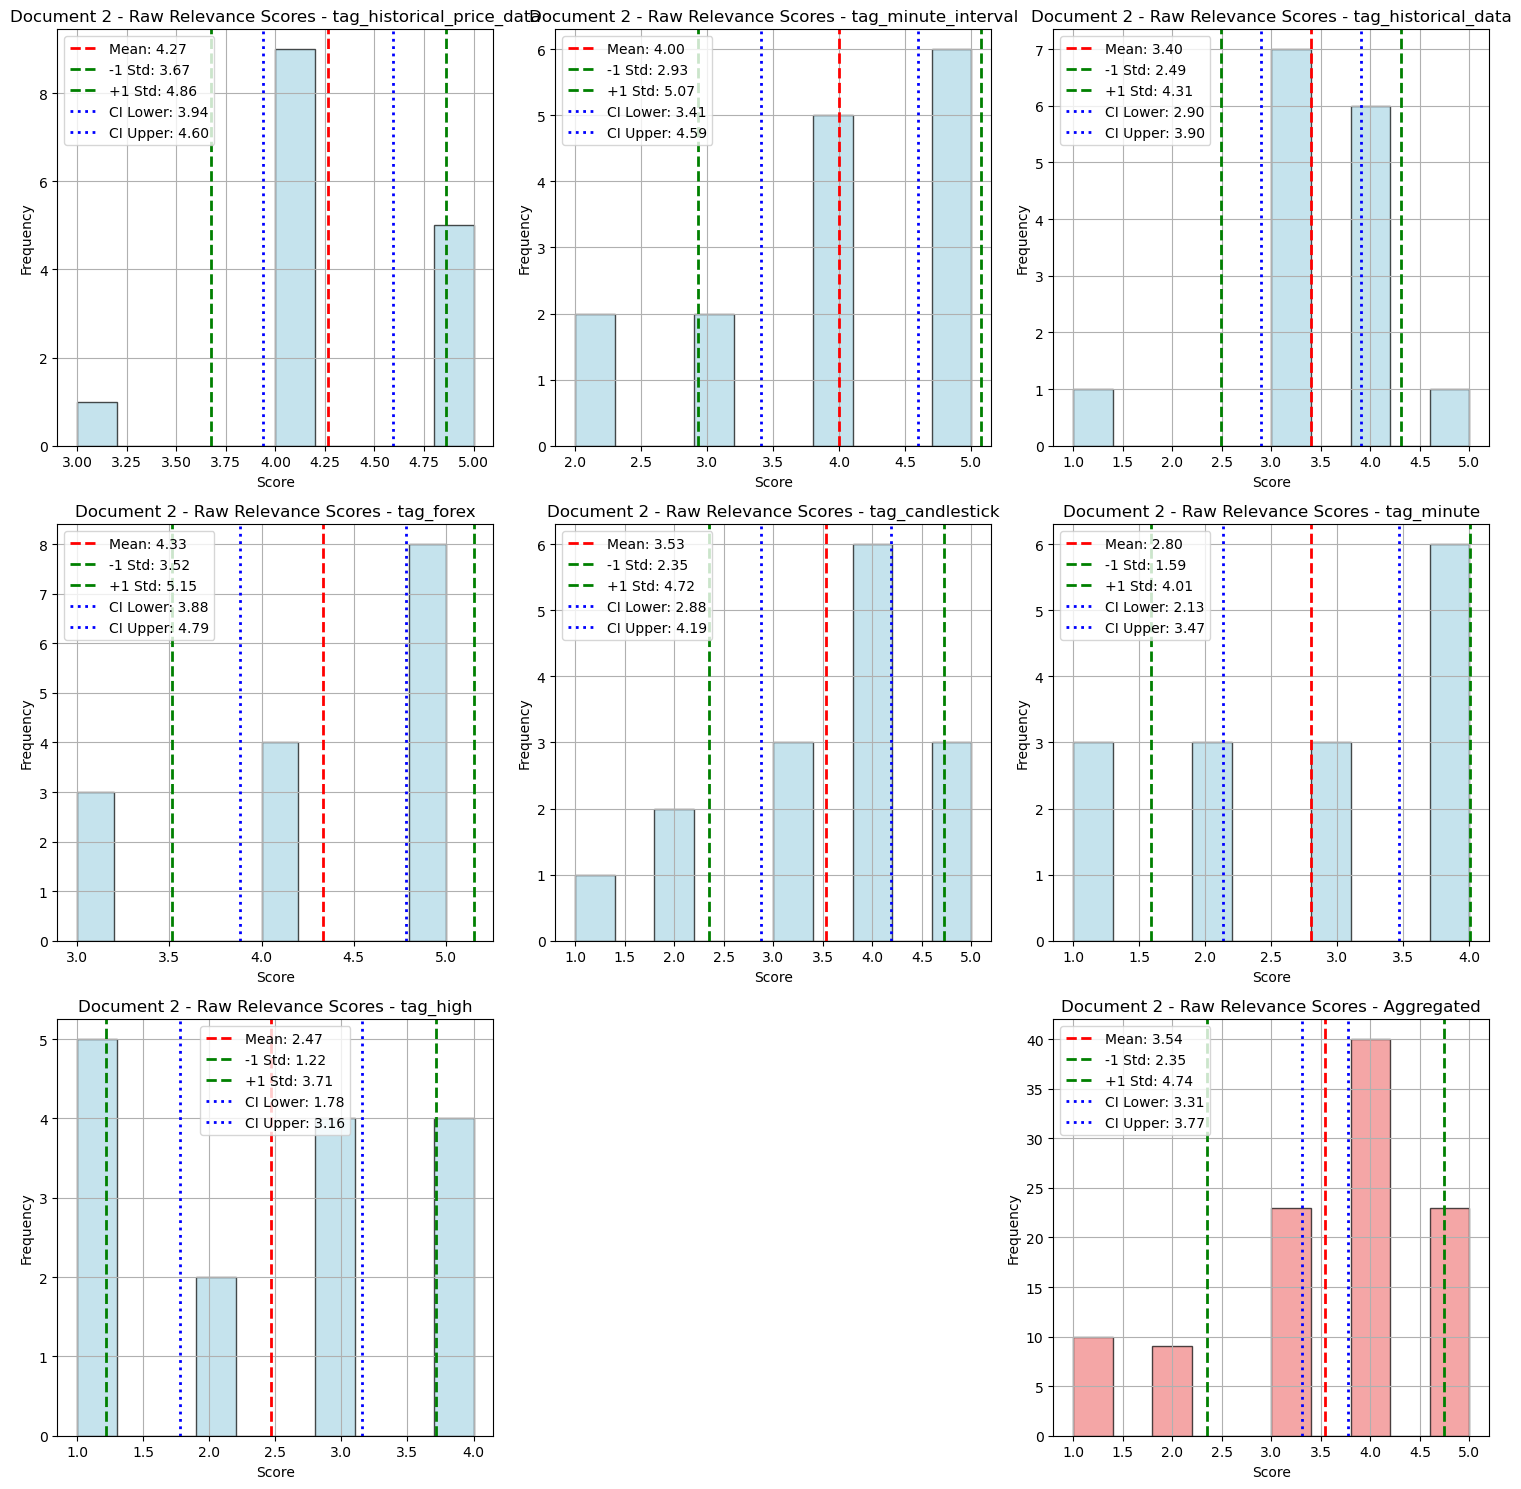

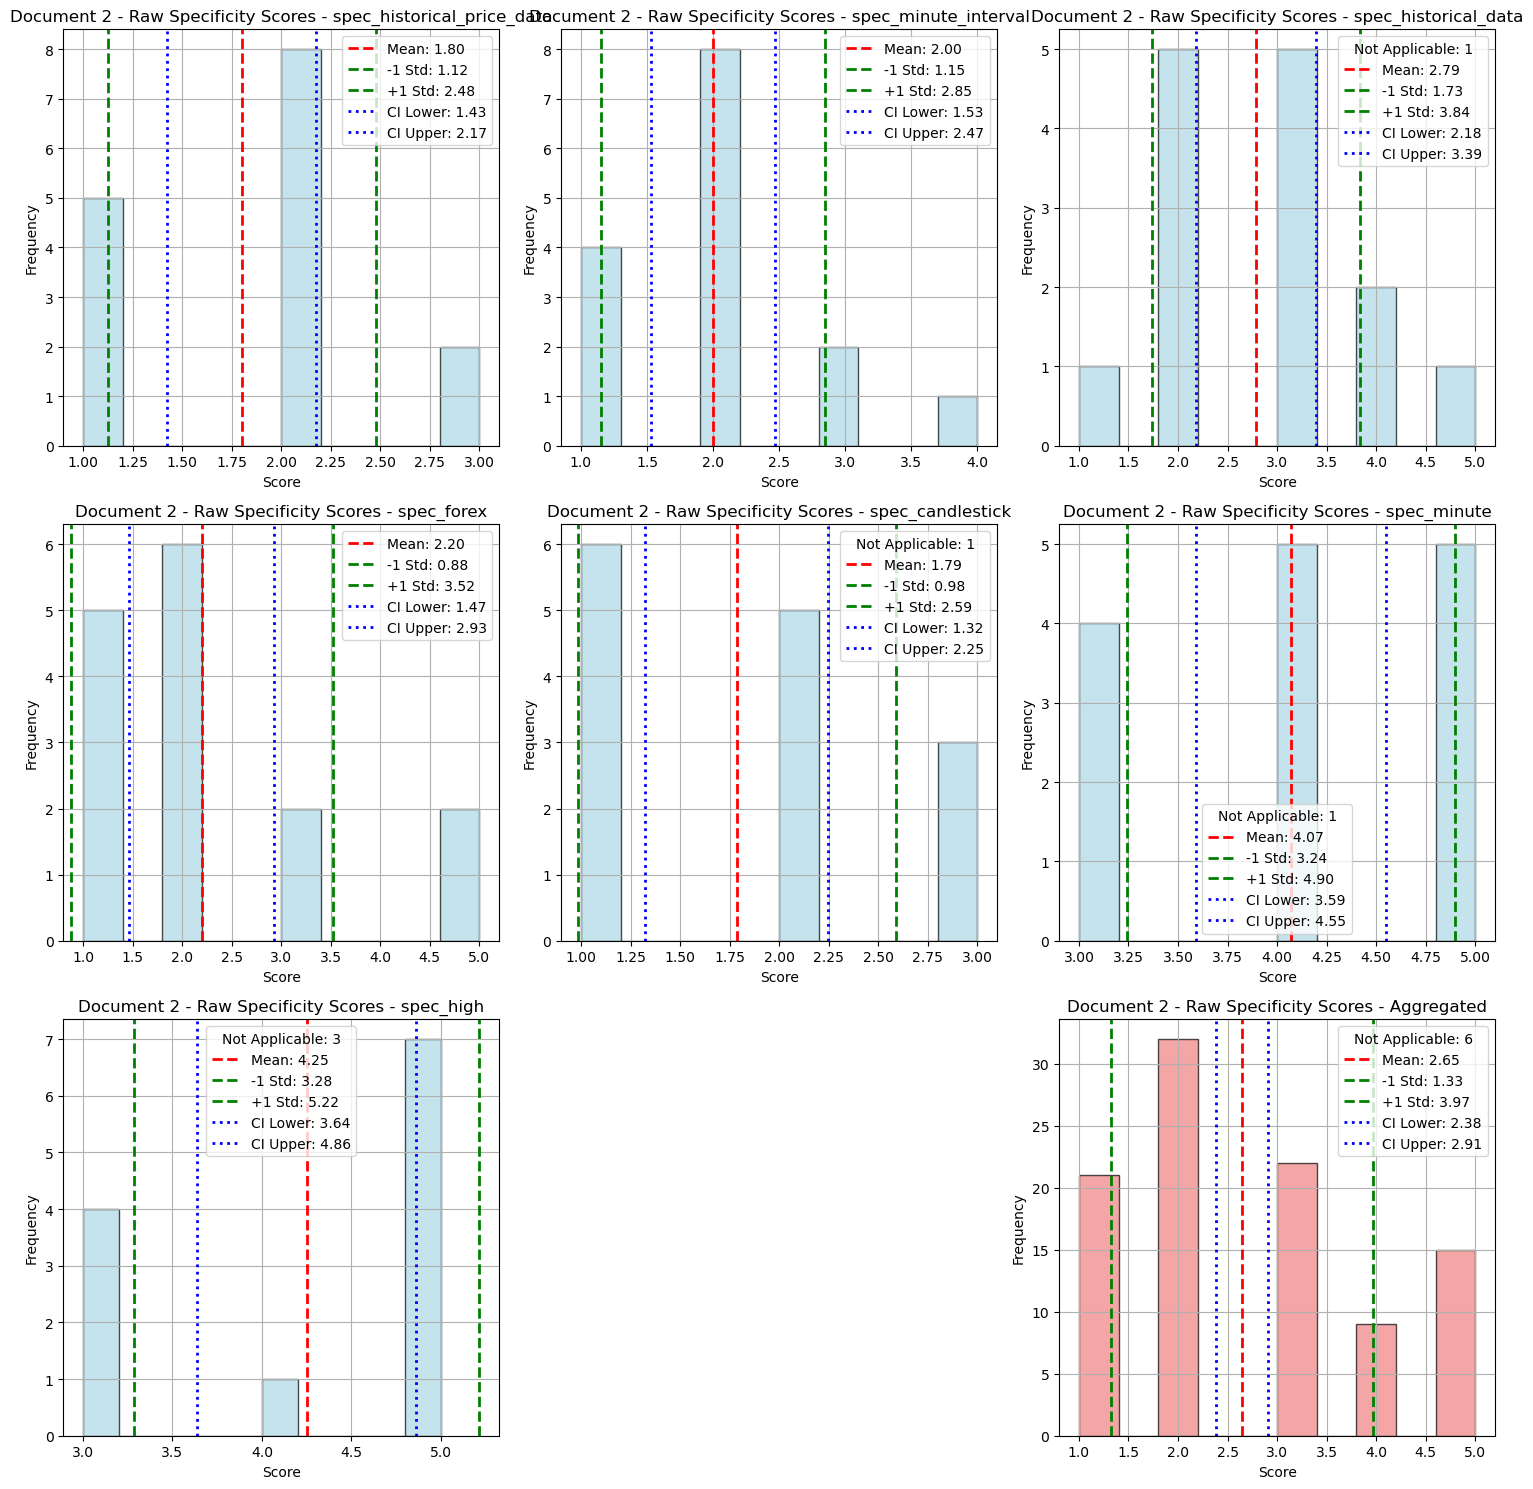

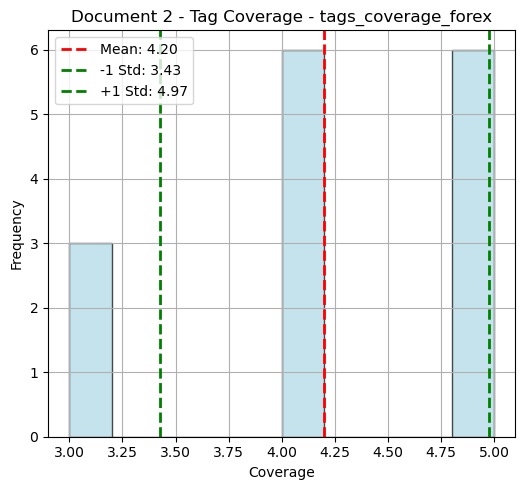

Correlation per Tag:
             Relevance vs Generality  Relevance vs Coverage  \
historical                 -0.418603               0.084830   
minute                     -0.549034               0.072098   
forex                       0.244781              -0.003166   
candlestick                -0.146246              -0.242624   
high                       -0.294608               0.229975   

             Generality vs Coverage  
historical                -0.431383  
minute                    -0.228218  
forex                     -0.254840  
candlestick               -0.207071  
high                      -0.452267  

Overall Correlations:
         Relevance vs Generality  Relevance vs Coverage  \
Overall                -0.059513              -0.014441   

         Generality vs Coverage  
Overall               -0.344005  


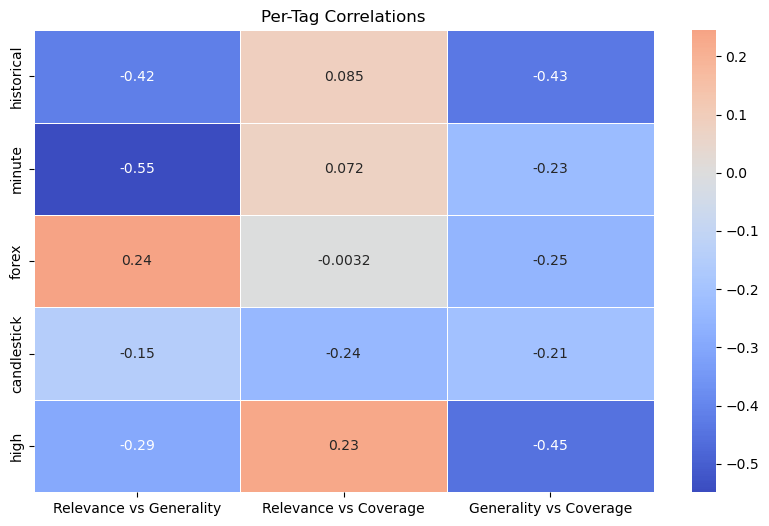

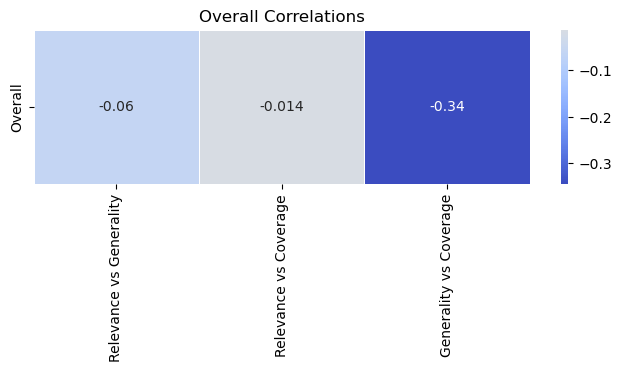


--- Analyzing Document 3 ---
Document 3 Relevance Distribution:
      tag_lung_cancer  tag_cancer  tag_science  tag_cancer_research  \
std          0.736788    1.069045     0.883715             0.632456   
min          3.000000    2.000000     1.000000             3.000000   
max          5.000000    5.000000     5.000000             5.000000   
mean         4.600000    4.000000     2.733333             4.400000   

      tag_biology  tag_medicine  tag_health  
std      1.162919      0.833809    0.816497  
min      1.000000      2.000000    2.000000  
max      5.000000      5.000000    5.000000  
mean     3.066667      3.533333    3.333333  
Document 3 Specificity Distribution:
      spec_lung_cancer  spec_cancer  spec_science  spec_cancer_research  \
std           0.828079     1.264911      1.279881              1.060099   
min           1.000000     1.000000      1.000000              1.000000   
max           4.000000     5.000000      5.000000              5.000000   
mean        

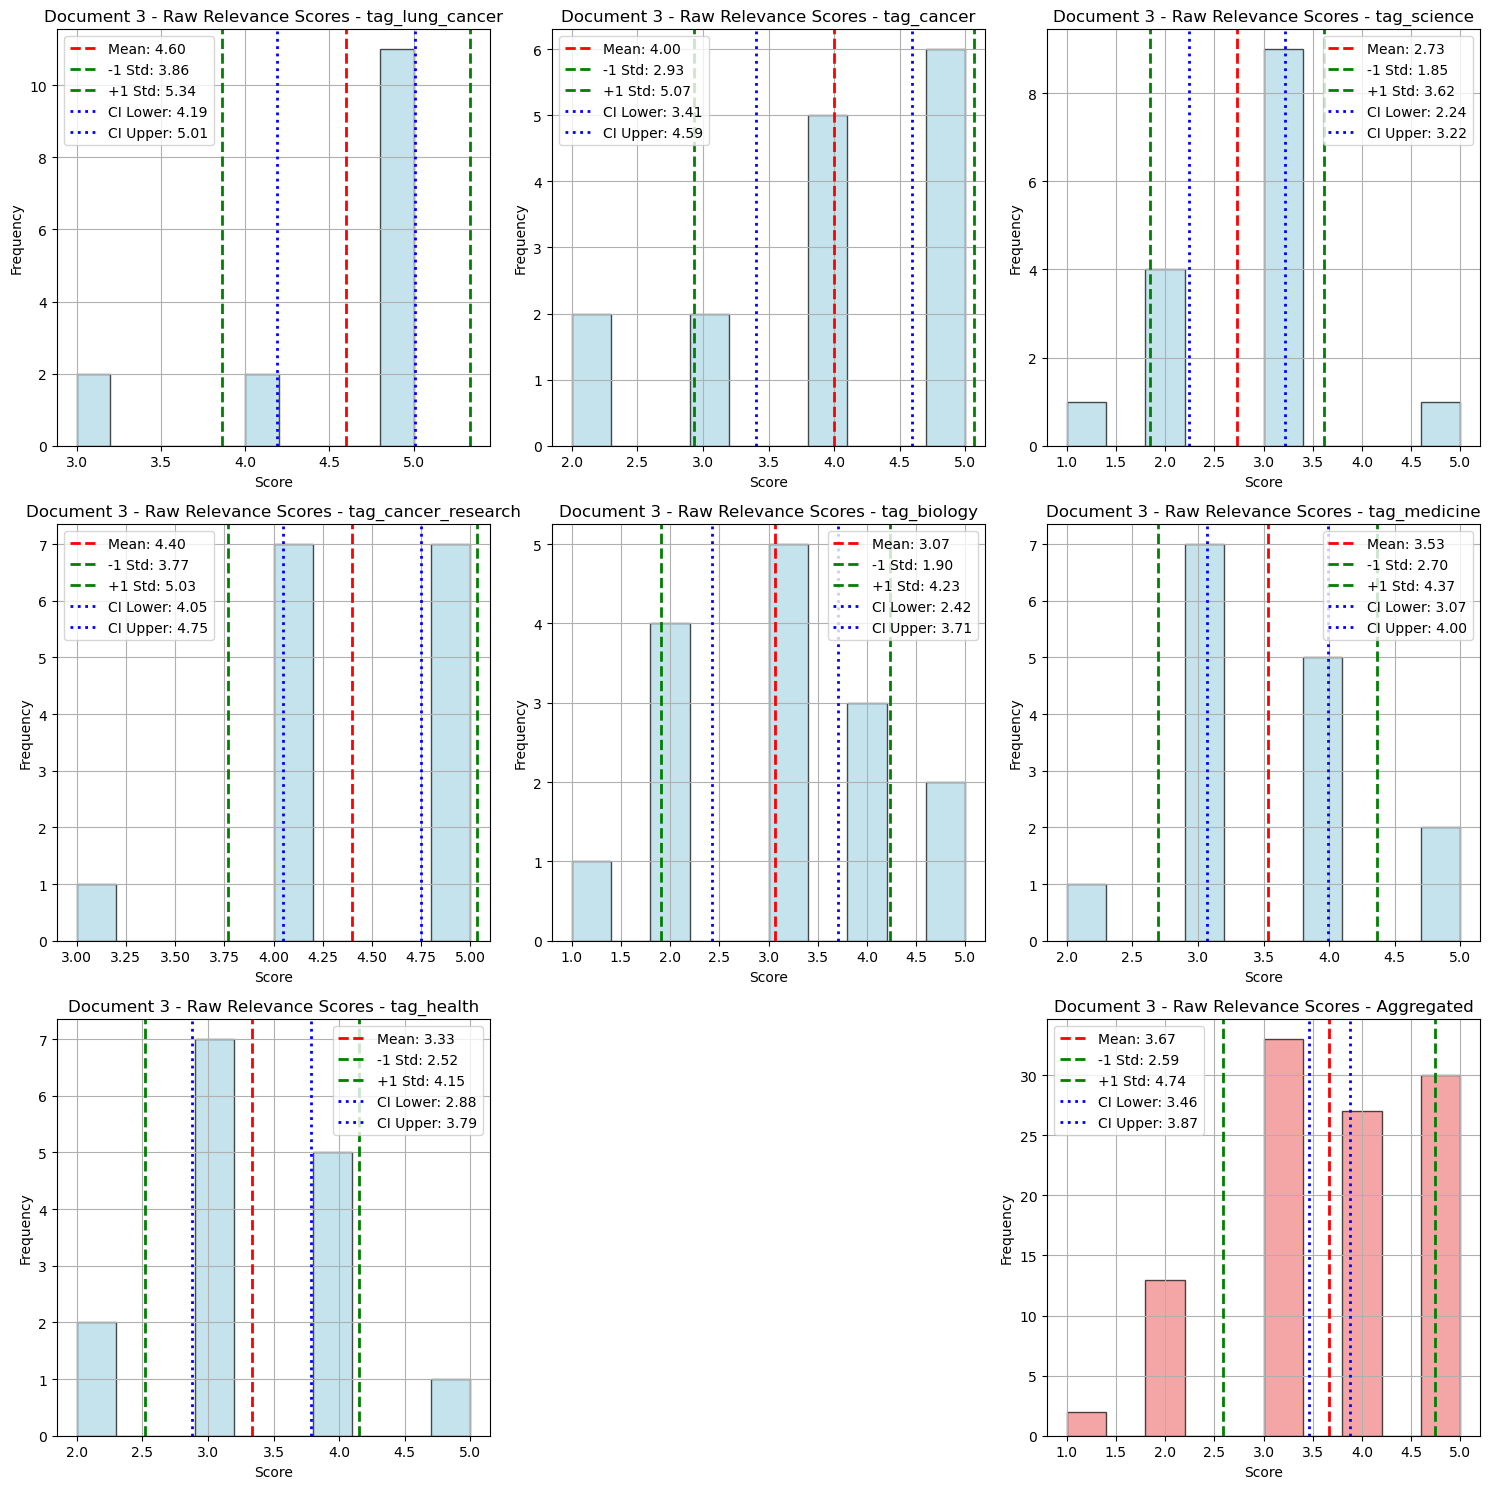

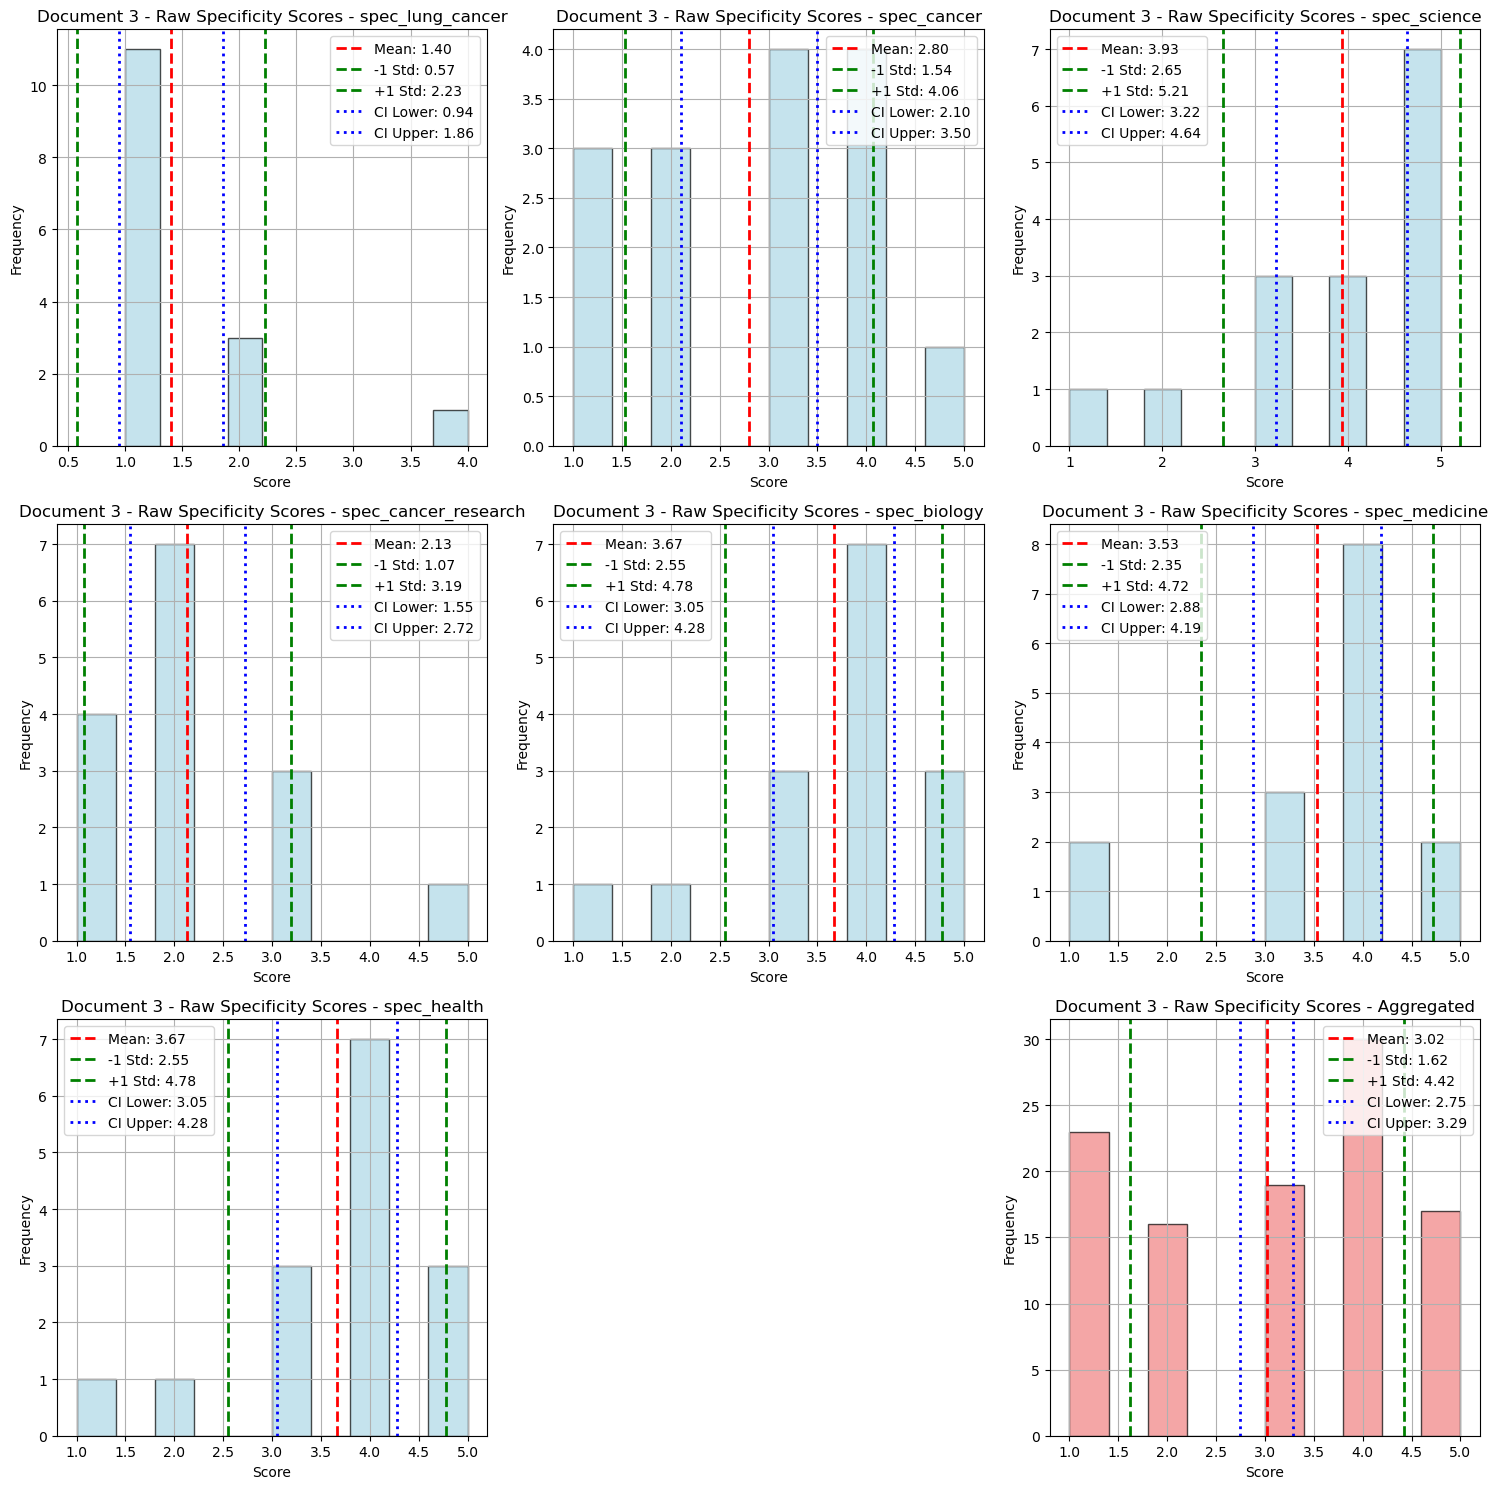

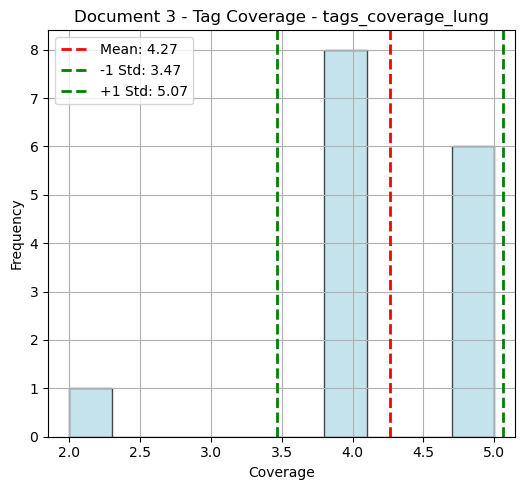

Correlation per Tag:
          Relevance vs Generality  Relevance vs Coverage  \
lung                     0.356085              -0.227932   
cancer                  -0.189956              -0.112489   
science                 -0.281493              -0.202083   
biology                 -0.558502              -0.003117   
medicine                -0.577179               0.166839   
health                  -0.435176               0.081253   

          Generality vs Coverage  
lung                   -0.600099  
cancer                 -0.331286  
science                -0.525987  
biology                -0.384869  
medicine               -0.359128  
health                 -0.534540  

Overall Correlations:
         Relevance vs Generality  Relevance vs Coverage  \
Overall                -0.344833              -0.101157   

         Generality vs Coverage  
Overall                -0.59805  


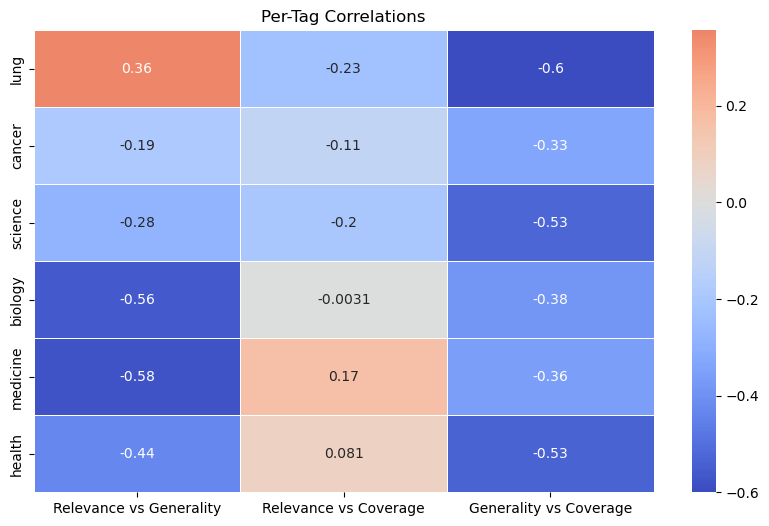

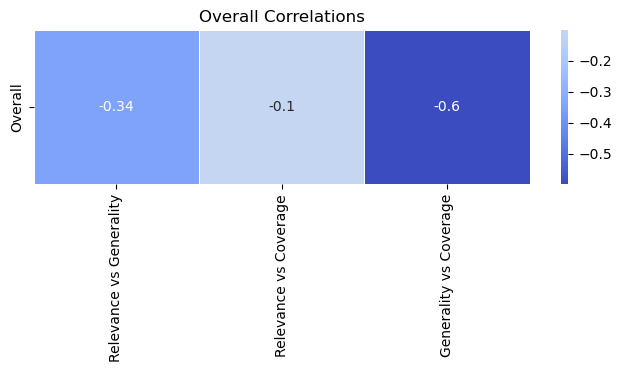

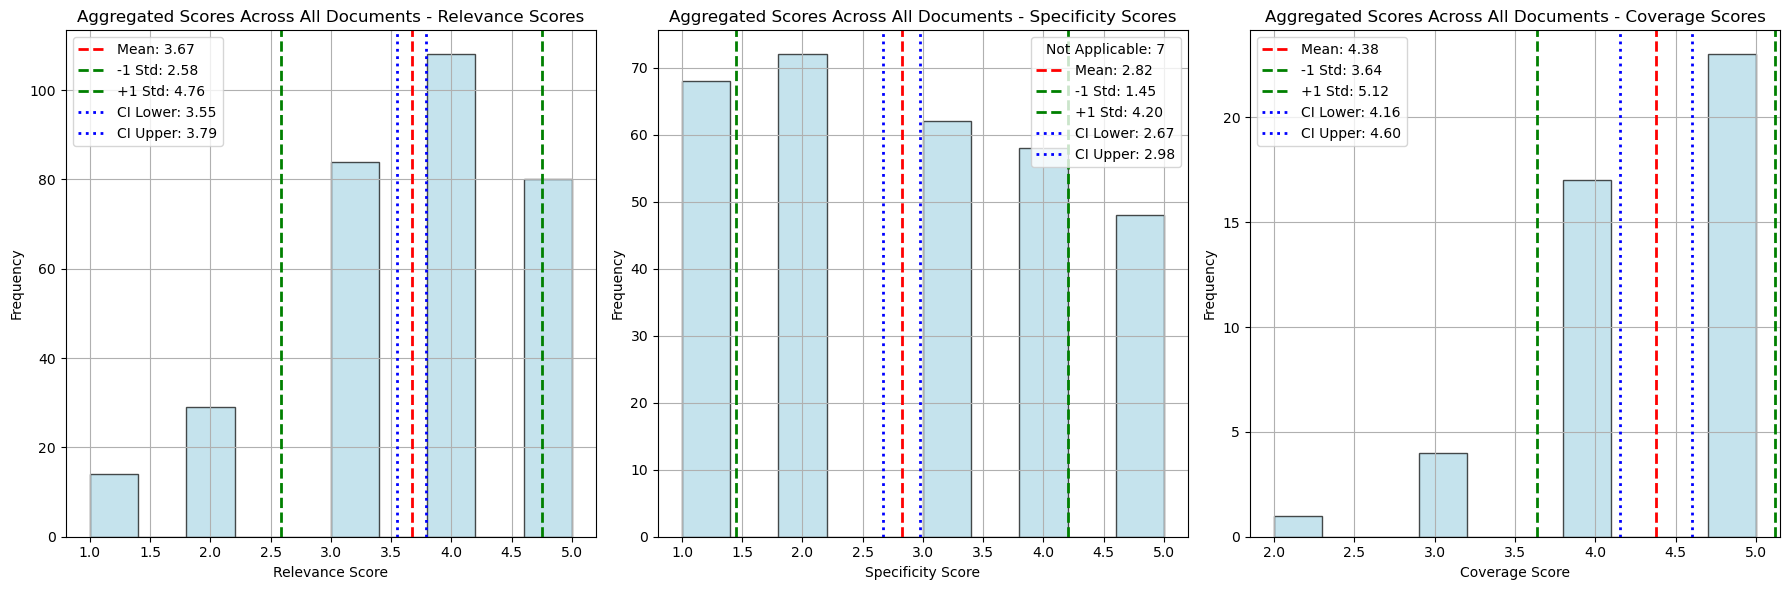

ICC for Relevance:


Type              Description       ICC          F  df1  df2  \
0   ICC1   Single raters absolute  0.282309   6.900369   20  294   
1   ICC2     Single random raters  0.296052  11.656278   20  280   
2   ICC3      Single fixed raters  0.415348  11.656278   20  280   
3  ICC1k  Average raters absolute  0.855080   6.900369   20  294   
4  ICC2k    Average random raters  0.863171  11.656278   20  280   
5  ICC3k     Average fixed raters  0.914209  11.656278   20  280   

           pval         CI95%  
0  1.273489e-15  [0.16, 0.48]  
1  1.031183e-26  [0.17, 0.49]  
2  1.031183e-26  [0.27, 0.61]  
3  1.273489e-15  [0.75, 0.93]  
4  1.031183e-26  [0.75, 0.94]  
5  1.031183e-26  [0.85, 0.96]


ICC for Generality:


Type              Description       ICC          F  df1  df2  \
0   ICC1   Single raters absolute  0.474872  14.564490   15  224   
1   ICC2     Single random raters  0.482585  25.363654   15  210   
2   ICC3      Single fixed raters  0.618938  25.363654   15  210   
3  ICC1k  Average raters absolute  0.931340  14.564490   15  224   
4  ICC2k    Average random raters  0.933290  25.363654   15  210   
5  ICC3k     Average fixed raters  0.960574  25.363654   15  210   

           pval         CI95%  
0  1.157144e-25   [0.31, 0.7]  
1  3.951831e-39   [0.3, 0.71]  
2  3.951831e-39   [0.45, 0.8]  
3  1.157144e-25  [0.87, 0.97]  
4  3.951831e-39  [0.87, 0.97]  
5  3.951831e-39  [0.93, 0.98]


ICC for Coverage:


Type              Description       ICC         F  df1  df2      pval  \
0   ICC1   Single raters absolute  0.048862  1.770588    2   42  0.182703   
1   ICC2     Single random raters  0.090909  6.543478    2   28  0.004660   
2   ICC3      Single fixed raters  0.269841  6.543478    2   28  0.004660   
3  ICC1k  Average raters absolute  0.435216  1.770588    2   42  0.182703   
4  ICC2k    Average random raters  0.600000  6.543478    2   28  0.004660   
5  ICC3k     Average fixed raters  0.847176  6.543478    2   28  0.004660   

           CI95%  
0  [-0.04, 0.82]  
1   [0.01, 0.82]  
2   [0.04, 0.94]  
3  [-1.28, 0.99]  
4   [0.13, 0.99]  
5    [0.36, 1.0]


ICC for Shared Coverage:


Type              Description       ICC         F  df1  df2      pval  \
0   ICC1   Single raters absolute  0.168297  4.035294    1   28  0.054289   
1   ICC2     Single random raters  0.182692  5.913793    1   14  0.029041   
2   ICC3      Single fixed raters  0.246753  5.913793    1   14  0.029041   
3  ICC1k  Average raters absolute  0.752187  4.035294    1   28  0.054289   
4  ICC2k    Average random raters  0.770270  5.913793    1   14  0.029041   
5  ICC3k     Average fixed raters  0.830904  5.913793    1   14  0.029041   

          CI95%  
0  [-0.02, 1.0]  
1    [0.0, 1.0]  
2   [-0.0, 1.0]  
3  [-0.39, 1.0]  
4   [0.04, 1.0]  
5  [-0.06, 1.0]


Fleiss' Kappa for Relevance: 0.0898
Fleiss' Kappa for Generality: 0.1749
Fleiss' Kappa for Coverage: 0.0222
Fleiss' Kappa for Shared Coverage: 0.0549


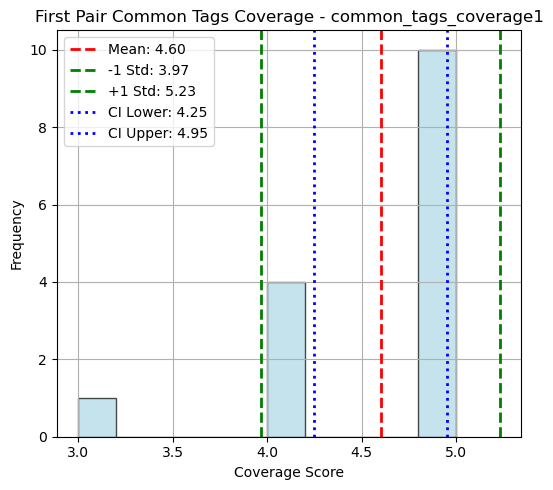

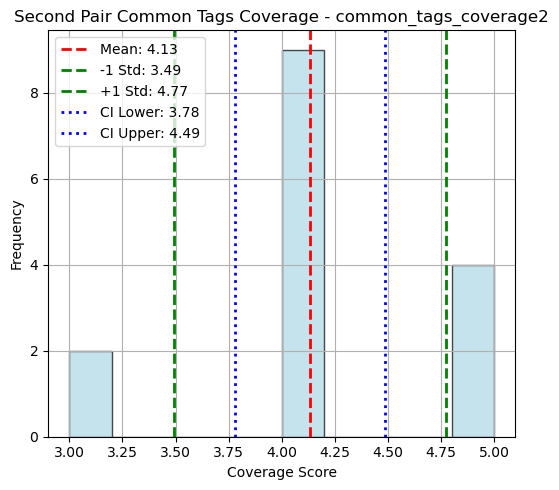


Metrics for First Pair Common Tags:
Accuracy: 0.85
Precision: 0.78
Recall: 0.84
F1-Score: 0.81

Metrics for Second Pair Common Tags:
Accuracy: 0.76
Precision: 0.57
Recall: 0.80
F1-Score: 0.67


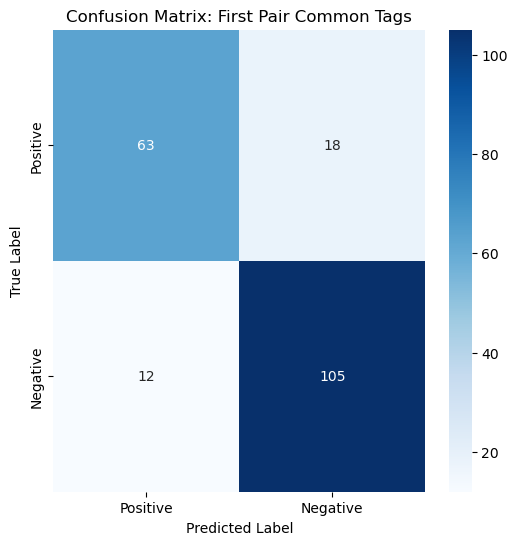

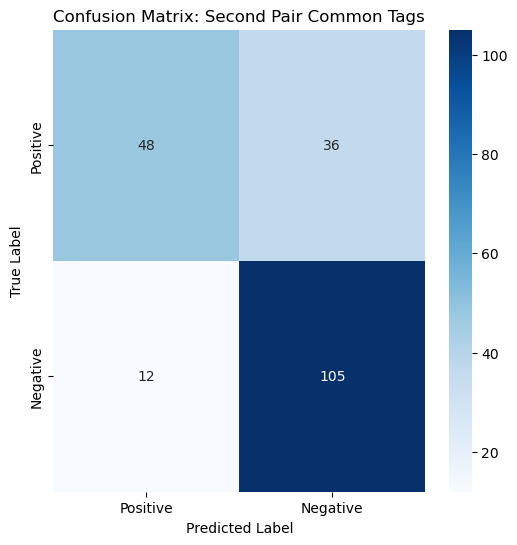

In [27]:
analyze_tags(
    df_model_generated,
    relevance_columns_list=[
        model_first_document_relevance_columns, 
        model_second_document_relevance_columns,
        model_third_document_relevance_columns
    ],
    spec_columns_list=[
        model_first_document_spec_columns, 
        model_second_document_spec_columns,
        model_third_document_spec_columns
    ],
    coverage_columns_list=[
        model_first_document_coverage_columns, 
        model_second_document_coverage_columns,
        model_third_document_coverage_columns
    ],
    suggested_columns_list=[
        model_first_document_suggested_columns,
        model_second_document_suggested_columns,
        model_third_document_suggested_columns
    ],
    common_tags_columns_1=model_first_pair_common_tags_columns,
    common_tags_true_tags_1=model_first_pair_common_tags_true_tags,
    common_tags_coverage_1=model_first_pair_coverage,
    common_tags_columns_2=model_second_pair_common_tags_columns,
    common_tags_true_tags_2=model_second_pair_common_tags_true_tags,
    common_tags_coverage_2=model_second_pair_coverage_columns
)

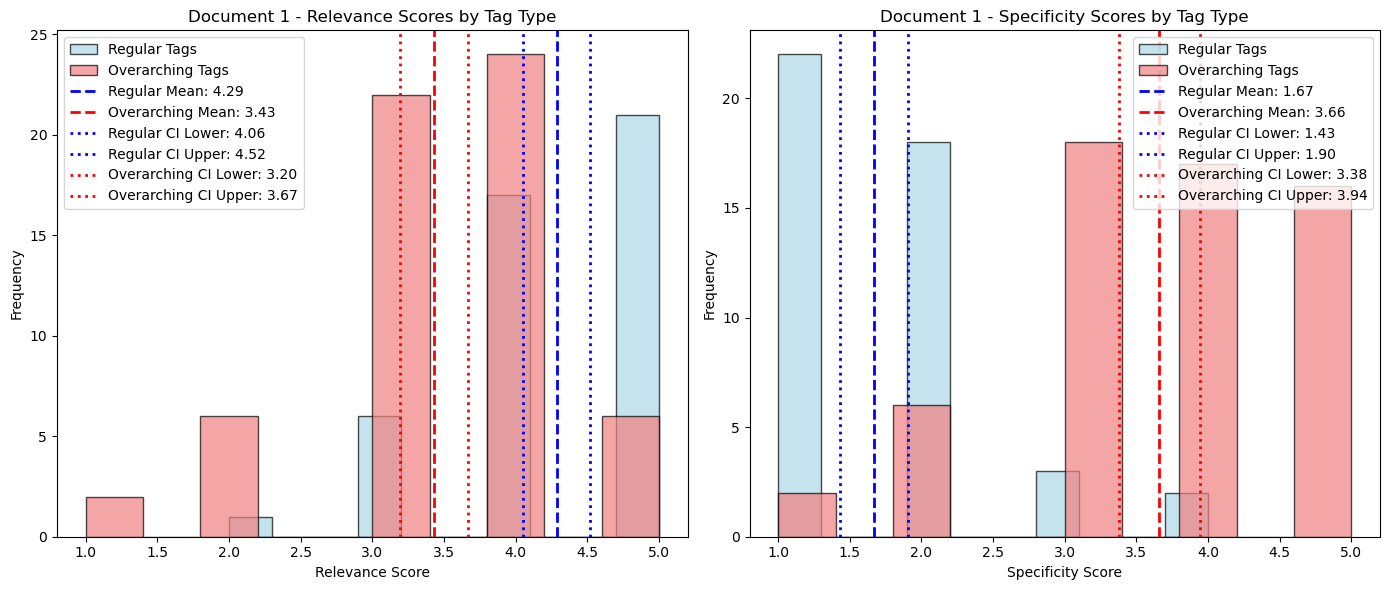

/var/folders/cl/69z7wmcn5xx7cb7wc_xvd8fw0000gn/T/ipykernel_55525/3148357474.py:5: RuntimeWarning: Mean of empty slice.
  mean = data.mean()
/Users/ivang/miniconda3/envs/openml-tags/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/ivang/miniconda3/envs/openml-tags/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/ivang/miniconda3/envs/openml-tags/lib/python3.10/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/Users/ivang/miniconda3/envs/openml-tags/lib/python3.10/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


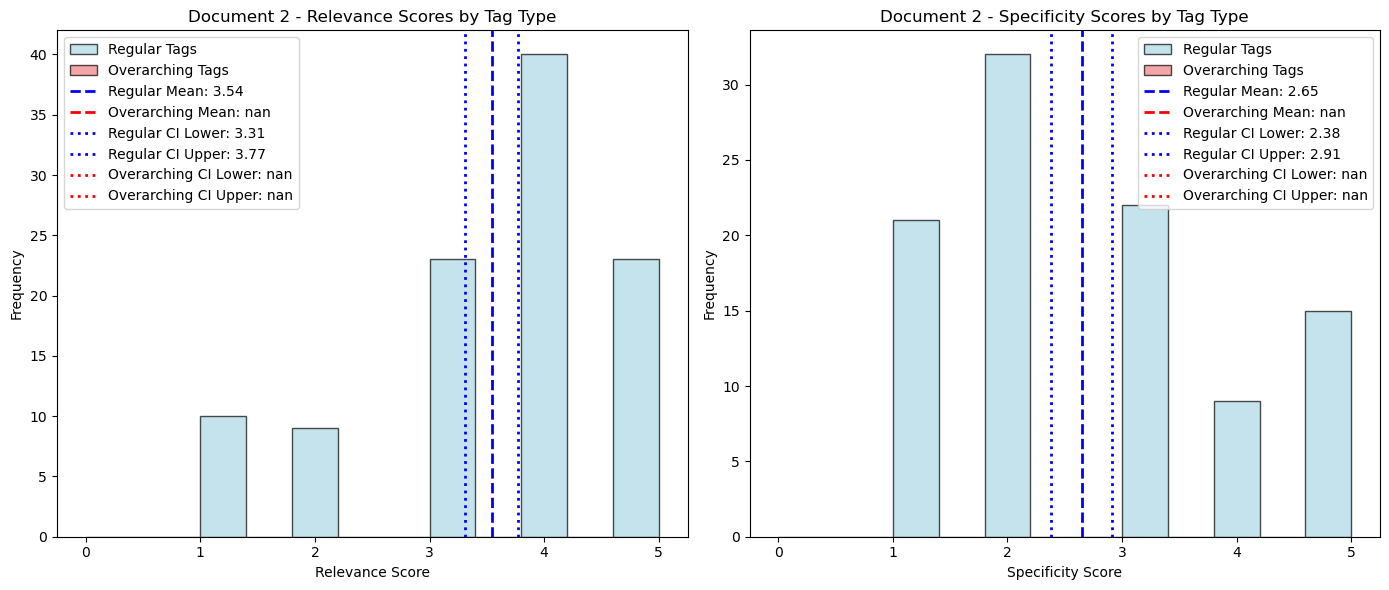

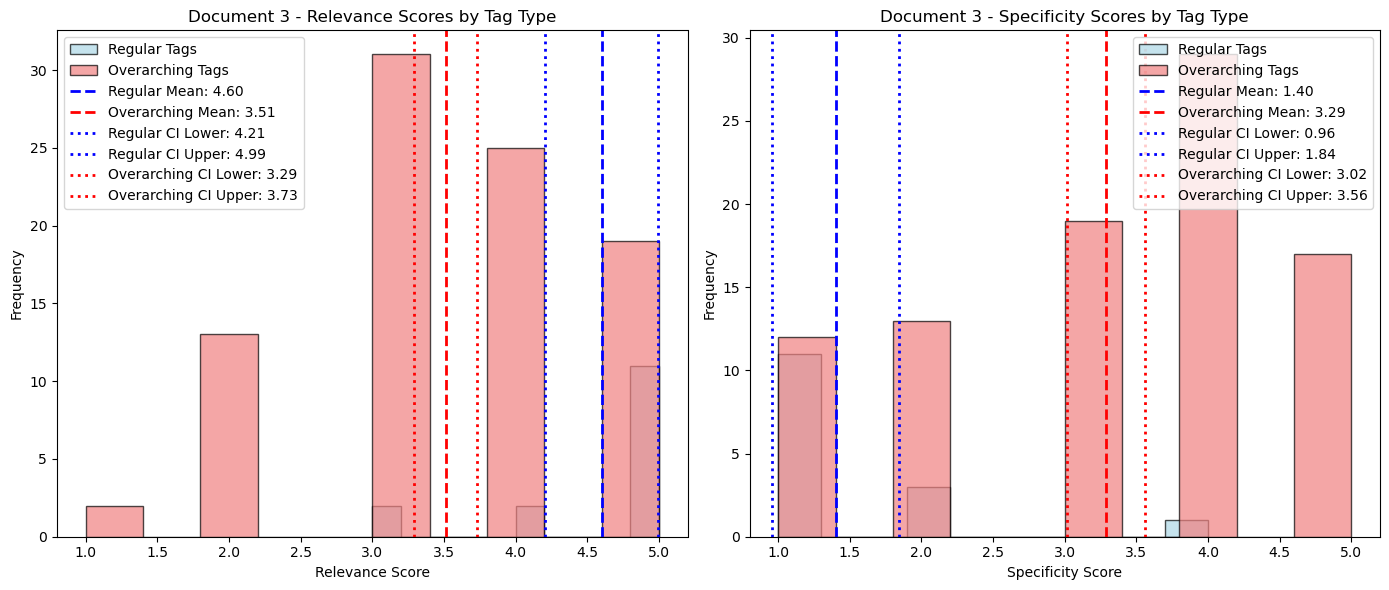

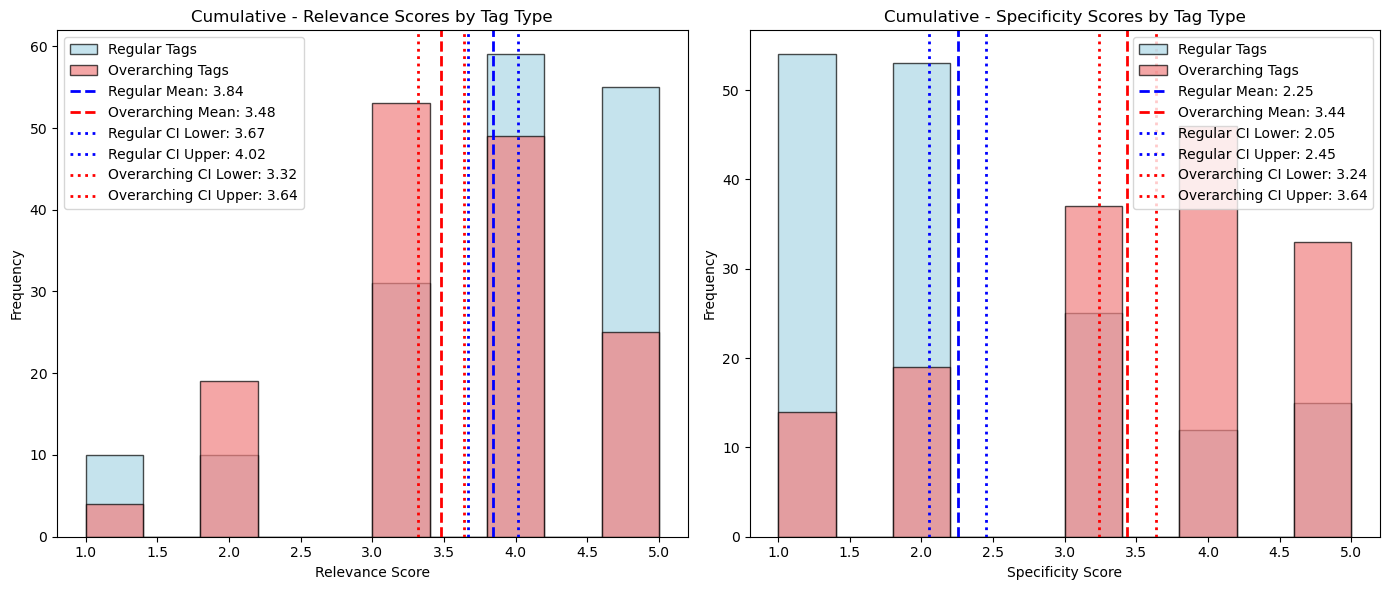

In [28]:
doc_relevance_columns_list = [
    model_first_document_relevance_columns,
    model_second_document_relevance_columns,
    model_third_document_relevance_columns
]

doc_spec_columns_list = [
    model_first_document_spec_columns,
    model_second_document_spec_columns,
    model_third_document_spec_columns
]

doc_tag_types_list = [
    model_first_document_tag_types,
    model_second_document_tag_types,
    model_third_document_tag_types
]

document_names = ['Document 1', 'Document 2', 'Document 3']

# Call the function for all documents and cumulative results
plot_relevance_specificity_multiple_documents(df_model_generated, 
                                              doc_relevance_columns_list, 
                                              doc_spec_columns_list, 
                                              doc_tag_types_list, 
                                              document_names)

In [29]:
def prepare_data_for_kruskal(df, relevance_columns_list, spec_columns_list, coverage_columns_list, shared_coverage_columns_list):
    all_relevance_data = []
    all_spec_data = []
    all_coverage_data = []
    all_shared_coverage_data = []
    
    for relevance_columns, spec_columns, coverage_columns, shared_coverage_columns in zip(relevance_columns_list, spec_columns_list, coverage_columns_list, shared_coverage_columns_list):
        # Preprocess numerical columns
        columns_to_preprocess = relevance_columns + spec_columns
        df = preprocess_numerical_columns(df, columns_to_preprocess)
        
        # Extract the data for each document
        relevance_data = df[relevance_columns].values.flatten()
        spec_data = df[spec_columns].dropna().values.flatten()
        coverage_data = df[coverage_columns].values.flatten()
        shared_coverage_data = df[shared_coverage_columns].values.flatten()
        
        all_relevance_data.extend(relevance_data)
        all_spec_data.extend(spec_data)
        all_coverage_data.extend(coverage_data)
        all_shared_coverage_data.extend(shared_coverage_data)
    
    return all_relevance_data, all_spec_data, all_coverage_data, all_shared_coverage_data

In [30]:
x_baseline_relevance, x_baseline_spec, x_baseline_coverage, x_baseline_shared_coverage = prepare_data_for_kruskal(df_baseline_generated, [baseline_first_document_relevance_columns, baseline_second_document_relevance_columns, baseline_third_document_relevance_columns], [baseline_first_document_spec_columns, baseline_second_document_spec_columns, baseline_third_document_spec_columns], [baseline_first_document_coverage_columns, baseline_second_document_coverage_columns, baseline_third_document_coverage_columns], [baseline_first_pair_coverage_columns, baseline_second_pair_coverage_columns])

x_human_relevance, x_human_spec, x_human_coverage, x_human_shared_coverage = prepare_data_for_kruskal(df_human_generated, [human_first_document_relevance_columns, human_second_document_relevance_columns, human_third_document_relevance_columns], [human_first_document_spec_columns, human_second_document_spec_columns, human_third_document_spec_columns], [human_first_document_coverage_columns, human_second_document_coverage_columns, human_third_document_coverage_columns], [human_first_pair_coverage_columns, human_second_pair_coverage_columns])

x_model_relevance, x_model_spec, x_model_coverage, x_model_shared_coverage = prepare_data_for_kruskal(df_model_generated, [model_first_document_relevance_columns, model_second_document_relevance_columns, model_third_document_relevance_columns], [model_first_document_spec_columns, model_second_document_spec_columns, model_third_document_spec_columns], [model_first_document_coverage_columns, model_second_document_coverage_columns, model_third_document_coverage_columns], [model_first_pair_coverage, model_second_pair_coverage_columns])

In [31]:
# Function to calculate Eta-Squared from Kruskal-Wallis test
def calc_eta_squared(H, n_total, k_groups):
    # Formula for eta-squared
    return (H - k_groups + 1) / (n_total - k_groups)

# Perform Kruskal-Wallis test and calculate Eta-Squared for each metric

# 1. Relevance
H_relevance, p_relevance = stats.kruskal(x_baseline_relevance, x_human_relevance, x_model_relevance)
n_total_relevance = len(x_baseline_relevance) + len(x_human_relevance) + len(x_model_relevance)
k_groups_relevance = 3  # Baseline, Human, Model
eta_squared_relevance = calc_eta_squared(H_relevance, n_total_relevance, k_groups_relevance)
print(f"Kruskal-Wallis H (Relevance): {H_relevance}, p-value: {p_relevance}, Eta-Squared: {eta_squared_relevance}")

# 2. Specificity
H_spec, p_spec = stats.kruskal(x_baseline_spec, x_human_spec, x_model_spec)
n_total_spec = len(x_baseline_spec) + len(x_human_spec) + len(x_model_spec)
k_groups_spec = 3  # Baseline, Human, Model
eta_squared_spec = calc_eta_squared(H_spec, n_total_spec, k_groups_spec)
print(f"Kruskal-Wallis H (Specificity): {H_spec}, p-value: {p_spec}, Eta-Squared: {eta_squared_spec}")

# 3. Coverage
H_coverage, p_coverage = stats.kruskal(x_baseline_coverage, x_human_coverage, x_model_coverage)
n_total_coverage = len(x_baseline_coverage) + len(x_human_coverage) + len(x_model_coverage)
k_groups_coverage = 3  # Baseline, Human, Model
eta_squared_coverage = calc_eta_squared(H_coverage, n_total_coverage, k_groups_coverage)
print(f"Kruskal-Wallis H (Coverage): {H_coverage}, p-value: {p_coverage}, Eta-Squared: {eta_squared_coverage}")

# 4. Shared Coverage
H_shared_coverage, p_shared_coverage = stats.kruskal(x_baseline_shared_coverage, x_human_shared_coverage, x_model_shared_coverage)
n_total_shared_coverage = len(x_baseline_shared_coverage) + len(x_human_shared_coverage) + len(x_model_shared_coverage)
k_groups_shared_coverage = 3  # Baseline, Human, Model
eta_squared_shared_coverage = calc_eta_squared(H_shared_coverage, n_total_shared_coverage, k_groups_shared_coverage)
print(f"Kruskal-Wallis H (Shared Coverage): {H_shared_coverage}, p-value: {p_shared_coverage}, Eta-Squared: {eta_squared_shared_coverage}")

Kruskal-Wallis H (Relevance): 196.34695751098084, p-value: 2.310999796542559e-43, Eta-Squared: 0.3104583985798416
Kruskal-Wallis H (Specificity): 4.441172143409879, p-value: 0.10854547474826427, Eta-Squared: 0.005573452382214337
Kruskal-Wallis H (Coverage): 48.62104254775138, p-value: 2.7674179820858237e-11, Eta-Squared: 0.5238319387387795
Kruskal-Wallis H (Shared Coverage): 35.405044196806124, p-value: 2.0506537516375214e-08, Eta-Squared: 0.3753375752450126


In [32]:
# Flatten the arrays for each group and metric
x_baseline_relevance = np.array(x_baseline_relevance).flatten()
x_human_relevance = np.array(x_human_relevance).flatten()
x_model_relevance = np.array(x_model_relevance).flatten()

x_baseline_spec = np.array(x_baseline_spec).flatten()
x_human_spec = np.array(x_human_spec).flatten()
x_model_spec = np.array(x_model_spec).flatten()

x_baseline_coverage = np.array(x_baseline_coverage).flatten()
x_human_coverage = np.array(x_human_coverage).flatten()
x_model_coverage = np.array(x_model_coverage).flatten()

x_baseline_shared_coverage = np.array(x_baseline_shared_coverage).flatten()
x_human_shared_coverage = np.array(x_human_shared_coverage).flatten()
x_model_shared_coverage = np.array(x_model_shared_coverage).flatten()

# Define group names for clarity in the DataFrame
groups = ['Baseline', 'Human', 'Model']

# Helper function to create a labeled DataFrame from Dunn's test results
def format_dunn_result(posthoc_result, groups):
    result_df = pd.DataFrame(posthoc_result)
    result_df.columns = groups
    result_df.index = groups
    return result_df

# Perform Dunn's test for post-hoc pairwise comparisons with Bonferroni correction

# Relevance
posthoc_relevance = sp.posthoc_dunn([x_baseline_relevance, x_human_relevance, x_model_relevance], p_adjust='bonferroni')
print("Dunn's Post-hoc Test (Relevance):")
df_relevance = format_dunn_result(posthoc_relevance, groups)
display(df_relevance)

# Specificity (Generality)
posthoc_spec = sp.posthoc_dunn([x_baseline_spec, x_human_spec, x_model_spec], p_adjust='bonferroni')
print("Dunn's Post-hoc Test (Specificity):")
df_spec = format_dunn_result(posthoc_spec, groups)
display(df_spec)

# Coverage
posthoc_coverage = sp.posthoc_dunn([x_baseline_coverage, x_human_coverage, x_model_coverage], p_adjust='bonferroni')
print("Dunn's Post-hoc Test (Coverage):")
df_coverage = format_dunn_result(posthoc_coverage, groups)
display(df_coverage)

# Shared Coverage
posthoc_shared_coverage = sp.posthoc_dunn([x_baseline_shared_coverage, x_human_shared_coverage, x_model_shared_coverage], p_adjust='bonferroni')
print("Dunn's Post-hoc Test (Shared Coverage):")
df_shared_coverage = format_dunn_result(posthoc_shared_coverage, groups)
display(df_shared_coverage)

Dunn's Post-hoc Test (Relevance):


Baseline         Human         Model
Baseline  1.000000e+00  2.595113e-35  3.125229e-30
Human     2.595113e-35  1.000000e+00  7.236185e-01
Model     3.125229e-30  7.236185e-01  1.000000e+00

Dunn's Post-hoc Test (Specificity):


Baseline     Human     Model
Baseline  1.000000  1.000000  0.189199
Human     1.000000  1.000000  0.316086
Model     0.189199  0.316086  1.000000

Dunn's Post-hoc Test (Coverage):


Baseline         Human         Model
Baseline  1.000000e+00  1.678293e-08  2.050487e-09
Human     1.678293e-08  1.000000e+00  1.000000e+00
Model     2.050487e-09  1.000000e+00  1.000000e+00

Dunn's Post-hoc Test (Shared Coverage):


Baseline         Human     Model
Baseline  1.000000e+00  6.193838e-08  0.000025
Human     6.193838e-08  1.000000e+00  0.773683
Model     2.493290e-05  7.736829e-01  1.000000

In [33]:
from cliffs_delta import cliffs_delta

# Example: Calculate Cliff's Delta between Baseline and Human for Relevance
delta, res = cliffs_delta(x_baseline_relevance, x_human_relevance)
print(f"Cliff's Delta for Relevance (Baseline vs Human): {delta}, {res}")

# Example: Calculate Cliff's Delta between Baseline and Model for Relevance
delta, res = cliffs_delta(x_baseline_relevance, x_model_relevance)
print(f"Cliff's Delta for Relevance (Baseline vs Model): {delta}, {res}")

# Example: Calculate Cliff's Delta between Human and Model for Relevance
delta, res = cliffs_delta(x_human_relevance, x_model_relevance)
print(f"Cliff's Delta for Relevance (Human vs Model): {delta}, {res}")

# Example: Calculate Cliff's Delta between Baseline and Human for Specificity
delta, res = cliffs_delta(x_baseline_spec, x_human_spec)
print(f"Cliff's Delta for Specificity (Baseline vs Human): {delta}, {res}")

# Example: Calculate Cliff's Delta between Baseline and Model for Specificity
delta, res = cliffs_delta(x_baseline_spec, x_model_spec)
print(f"Cliff's Delta for Specificity (Baseline vs Model): {delta}, {res}")

# Example: Calculate Cliff's Delta between Human and Model for Specificity
delta, res = cliffs_delta(x_human_spec, x_model_spec)
print(f"Cliff's Delta for Specificity (Human vs Model): {delta}, {res}")

# Example: Calculate Cliff's Delta between Baseline and Human for Coverage
delta, res = cliffs_delta(x_baseline_coverage, x_human_coverage)
print(f"Cliff's Delta for Coverage (Baseline vs Human): {delta}, {res}")

# Example: Calculate Cliff's Delta between Baseline and Model for Coverage
delta, res = cliffs_delta(x_baseline_coverage, x_model_coverage)
print(f"Cliff's Delta for Coverage (Baseline vs Model): {delta}, {res}")

# Example: Calculate Cliff's Delta between Human and Model for Coverage
delta, res = cliffs_delta(x_human_coverage, x_model_coverage)
print(f"Cliff's Delta for Coverage (Human vs Model): {delta}, {res}")

# Example: Calculate Cliff's Delta between Baseline and Human for Shared Coverage
delta, res = cliffs_delta(x_baseline_shared_coverage, x_human_shared_coverage)
print(f"Cliff's Delta for Shared Coverage (Baseline vs Human): {delta}, {res}")

# Example: Calculate Cliff's Delta between Baseline and Model for Shared Coverage
delta, res = cliffs_delta(x_baseline_shared_coverage, x_model_shared_coverage)
print(f"Cliff's Delta for Shared Coverage (Baseline vs Model): {delta}, {res}")

# Example: Calculate Cliff's Delta between Human and Model for Shared Coverage
delta, res = cliffs_delta(x_human_shared_coverage, x_model_shared_coverage)
print(f"Cliff's Delta for Shared Coverage (Human vs Model): {delta}, {res}")

Cliff's Delta for Relevance (Baseline vs Human): -0.6758470695970696, large
Cliff's Delta for Relevance (Baseline vs Model): -0.6397534013605443, large
Cliff's Delta for Relevance (Human vs Model): 0.08234432234432235, negligible
Cliff's Delta for Specificity (Baseline vs Human): 0.05419501133786848, negligible
Cliff's Delta for Specificity (Baseline vs Model): 0.14623233908948194, negligible
Cliff's Delta for Specificity (Human vs Model): 0.09564509564509564, negligible
Cliff's Delta for Coverage (Baseline vs Human): -0.8510416666666667, large
Cliff's Delta for Coverage (Baseline vs Model): -0.8552083333333333, large
Cliff's Delta for Coverage (Human vs Model): -0.07222222222222222, negligible
Cliff's Delta for Shared Coverage (Baseline vs Human): -0.7479166666666667, large
Cliff's Delta for Shared Coverage (Baseline vs Model): -0.6572916666666667, large
Cliff's Delta for Shared Coverage (Human vs Model): 0.19777777777777777, small


In [34]:
# Cohen is not great for non-normal distributions, but we can still calculate it
# Example: Calculate Cohen's d between Baseline and Human for Relevance
d_relevance_baseline_human = pg.compute_effsize(x_baseline_relevance, x_human_relevance, eftype='cohen')
print(f"Cohen's d for Relevance (Baseline vs Human): {d_relevance_baseline_human}")

# Example: Calculate Cohen's d between Baseline and Model for Relevance
d_relevance_baseline_model = pg.compute_effsize(x_baseline_relevance, x_model_relevance, eftype='cohen')
print(f"Cohen's d for Relevance (Baseline vs Model): {d_relevance_baseline_model}")

# Example: Calculate Cohen's d between Human and Model for Relevance
d_relevance_human_model = pg.compute_effsize(x_human_relevance, x_model_relevance, eftype='cohen')
print(f"Cohen's d for Relevance (Human vs Model): {d_relevance_human_model}")

Cohen's d for Relevance (Baseline vs Human): -1.4823038649705806
Cohen's d for Relevance (Baseline vs Model): -1.3669648036667406
Cohen's d for Relevance (Human vs Model): 0.13478461929025456
